# 01.01 Exploratory Data Analysis: All Requests and by Neighborhood Council
## Issue 1279
---

# Table of Contents
---
### [Package & Data Imports  ](#Package-&-Data-Imports)
### [Exploratory Data Analysis - Contains analysis per capita, by type, by NC, etc.](#Explore)
> #### [All Requests in Dataset](#All-Requests)

> #### [Addresses w/ >= 2 Requests in Dataset](#>=2-Requests)

> #### [Addresses w/ >= 5 Requests in Dataset](#>=5-Requests)
### [Timeseries Exploratory Data Analysis](#Timeseries-EDA)

# Package & Data Imports
-----

In [1]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter("ignore")
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# request clean dataset
df_311_raw = pd.read_csv('./data/clean_01Oct21_01Oct22_api.csv')
df_311 = df_311_raw.copy()

# Anupriya's Population Data
raw_pop = pd.read_csv('./data/pop_tracts_nc_final.csv')
pop = raw_pop.copy()

In [52]:
print(f'df_311 shape: {df_311.shape}')
df_311.head()

df_311 shape: (1042202, 19)


requestId         createdDate           closedDate  typeId  \
createdDay                                                               
2021-10-01    8610592 2021-10-01 00:01:14  2021-10-08 09:24:53       4   
2021-10-01    8610569 2021-10-01 00:02:19  2021-10-08 13:36:33       5   
2021-10-01    8610575 2021-10-01 00:03:11  2021-10-13 12:31:58       4   
2021-10-01    8612855 2021-10-01 00:04:14  2021-10-05 14:25:02       6   
2021-10-01    8610587 2021-10-01 00:05:25  2021-10-08 14:16:32       7   

                    typeName                            address   latitude  \
createdDay                                                                   
2021-10-01       Bulky Items         11614 N HERRICK AVE, 91340  34.281312   
2021-10-01  Electronic Waste         11614 N HERRICK AVE, 91340  34.281312   
2021-10-01       Bulky Items  4539 N VISTA DEL MONTE AVE, 91403  34.154158   
2021-10-01   Illegal Dumping            918 W COLLEGE ST, 90012  34.066466   
2021-10-01  Metal/Appliances         11614 N HERRICK AVE, 91340  34.281312   

             longitude  agencyId         agencyName  sourceId      srnumber  \
createdDay                                                                    
2021-10-01 -118.425453         3  Sanitation Bureau         8  1-2079512481   
2021-10-01 -118.425453         3  Sanitation Bureau         8  1-2079516251   
2021-10-01 -118.450025         3  Sanitation Bureau         8  1-2079512561   
2021-10-01 -118.245113         3  Sanitation Bureau         3  1-2079516331   
2021-10-01 -118.425453         3  Sanitation Bureau         8  1-2079516401   

            sourceName  councilId              councilName  councilID  \
createdDay                                                              
2021-10-01  Phone Call         64                  Pacoima         64   
2021-10-01  Phone Call         64                  Pacoima         64   
2021-10-01  Phone Call         72             Sherman Oaks         72   
2021-10-01       Email         38  Historic Cultural North         38   
2021-10-01  Phone Call         64                  Pacoima         64   

            total_population       area   pop_density  
createdDay                                             
2021-10-01           24732.0  17.038756   1451.514436  
2021-10-01           24732.0  17.038756   1451.514436  
2021-10-01               NaN        NaN           NaN  
2021-10-01           30626.0   2.840725  10781.050656  
2021-10-01           24732.0  17.038756   1451.514436

In [4]:
pop.head()

Unnamed: 0                           NAME  NC_ID  total_population  \
0           0                      ARLETA NC      6             35585   
1           1                 ARROYO SECO NC     42             19479   
2           2  ARTS DISTRICT LITTLE TOKYO NC     46              4153   
3           3             ATWATER VILLAGE NC     37             14665   
4           4       BEL AIR-BEVERLY CREST NC     64             24732   

        area   pop_density  
0   3.284868  10833.007723  
1   3.063327   6358.773341  
2   0.879216   4723.528997  
3   8.748450   1676.296980  
4  17.038756   1451.514436

In [5]:
# merge pop and 311
df_311 = pd.merge(df_311, pop, how = 'left', left_on = 'councilId', right_on = 'NC_ID')
df_311.drop(columns = ['Unnamed: 0', 'NAME', 'NC_ID'], inplace = True)
df_311.head()

requestId          createdDate           closedDate  typeId  \
0    8610592  2021-10-01 00:01:14  2021-10-08 09:24:53       4   
1    8610569  2021-10-01 00:02:19  2021-10-08 13:36:33       5   
2    8610575  2021-10-01 00:03:11  2021-10-13 12:31:58       4   
3    8612855  2021-10-01 00:04:14  2021-10-05 14:25:02       6   
4    8610587  2021-10-01 00:05:25  2021-10-08 14:16:32       7   

           typeName                            address   latitude   longitude  \
0       Bulky Items         11614 N HERRICK AVE, 91340  34.281312 -118.425453   
1  Electronic Waste         11614 N HERRICK AVE, 91340  34.281312 -118.425453   
2       Bulky Items  4539 N VISTA DEL MONTE AVE, 91403  34.154158 -118.450025   
3   Illegal Dumping            918 W COLLEGE ST, 90012  34.066466 -118.245113   
4  Metal/Appliances         11614 N HERRICK AVE, 91340  34.281312 -118.425453   

   agencyId         agencyName  sourceId      srnumber  sourceName  councilId  \
0         3  Sanitation Bureau         8  1-2079512481  Phone Call         64   
1         3  Sanitation Bureau         8  1-2079516251  Phone Call         64   
2         3  Sanitation Bureau         8  1-2079512561  Phone Call         72   
3         3  Sanitation Bureau         3  1-2079516331       Email         38   
4         3  Sanitation Bureau         8  1-2079516401  Phone Call         64   

               councilName  councilID  total_population       area  \
0                  Pacoima         64           24732.0  17.038756   
1                  Pacoima         64           24732.0  17.038756   
2             Sherman Oaks         72               NaN        NaN   
3  Historic Cultural North         38           30626.0   2.840725   
4                  Pacoima         64           24732.0  17.038756   

    pop_density  
0   1451.514436  
1   1451.514436  
2           NaN  
3  10781.050656  
4   1451.514436

In [49]:
# df_311.to_csv('./data/clean_01Oct21_01Oct22_api.csv', index = False)

# All Requests
---

Dates are only for 10/01/2021-10/01/2022

In [6]:
df_311.describe(include = 'all').T

count   unique                   top    freq  \
requestId         1042202.0      NaN                   NaN     NaN   
createdDate         1042202   921751   2022-08-08 11:02:03      10   
closedDate          1042202  1010282   2021-11-15 00:00:00      72   
typeId            1042202.0      NaN                   NaN     NaN   
typeName            1042202       12           Bulky Items  490106   
address             1042202   364214  1901 E 6TH ST, 90033     575   
latitude          1042202.0      NaN                   NaN     NaN   
longitude         1042202.0      NaN                   NaN     NaN   
agencyId          1042202.0      NaN                   NaN     NaN   
agencyName          1042202        8     Sanitation Bureau  756066   
sourceId          1042202.0      NaN                   NaN     NaN   
srnumber            1042202  1042202          1-2079512481       1   
sourceName          1042202       13            Phone Call  425425   
councilId         1042202.0      NaN                   NaN     NaN   
councilName         1042202      100         Boyle Heights   30823   
councilID         1042202.0      NaN                   NaN     NaN   
total_population   837403.0      NaN                   NaN     NaN   
area               837403.0      NaN                   NaN     NaN   
pop_density        837403.0      NaN                   NaN     NaN   

                            mean            std          min          25%  \
requestId         9662942.848746  601992.274658    8610569.0   9144645.25   
createdDate                  NaN            NaN          NaN          NaN   
closedDate                   NaN            NaN          NaN          NaN   
typeId                  3.802691       2.139082          1.0          2.0   
typeName                     NaN            NaN          NaN          NaN   
address                      NaN            NaN          NaN          NaN   
latitude                34.09044       0.122377    33.705737    34.020332   
longitude            -118.363991       0.110621  -118.667817  -118.443194   
agencyId                 3.24552       0.575133          1.0          3.0   
agencyName                   NaN            NaN          NaN          NaN   
sourceId               10.526652       4.576503          1.0          7.0   
srnumber                     NaN            NaN          NaN          NaN   
sourceName                   NaN            NaN          NaN          NaN   
councilId              51.204554       30.17684          0.0         21.0   
councilName                  NaN            NaN          NaN          NaN   
councilID              51.204554       30.17684          0.0         21.0   
total_population    43993.879791   19793.693227       4153.0      29244.0   
area                    5.384883       4.308187     0.505648     2.601553   
pop_density          11920.57846    8025.090961  1214.933135  6617.654402   

                           50%           75%           max  
requestId            9659138.5   10180138.75    10747580.0  
createdDate                NaN           NaN           NaN  
closedDate                 NaN           NaN           NaN  
typeId                     4.0           4.0          12.0  
typeName                   NaN           NaN           NaN  
address                    NaN           NaN           NaN  
latitude             34.079041     34.192951     34.334335  
longitude          -118.335812   -118.277894   -118.155779  
agencyId                   3.0           4.0          12.0  
agencyName                 NaN           NaN           NaN  
sourceId                   8.0          17.0          18.0  
srnumber                   NaN           NaN           NaN  
sourceName                 NaN           NaN           NaN  
councilId                 52.0          78.0          99.0  
councilName                NaN           NaN           NaN  
councilID                 52.0          78.0          99.0  
total_population       41645.0       51301.

In [7]:
# count of requests by type and neighborhood council per capita
type_nc_ct = df_311.groupby(['typeName', 'councilName', 'total_population'])['requestId'].agg('count').reset_index(name = 'request_count')
type_nc_ct.sort_values(by = 'request_count', ascending = False).reset_index(drop = True, inplace = True)
type_nc_ct['per_capita'] = type_nc_ct['request_count']/type_nc_ct['total_population']

In [8]:
# plot top 20 NC 311 requests by type per capita
type_nc_ct.sort_values(by = 'per_capita', ascending = False, inplace = True)
type_nc_ct.head(20)

typeName                     councilName  total_population  \
117       Bulky Items                       Los Feliz            4153.0   
115       Bulky Items                           LA-32            6926.0   
102       Bulky Items             Granada Hills South           12027.0   
330          Graffiti                       Los Feliz            4153.0   
130       Bulky Items                         Pacoima           24732.0   
111       Bulky Items          Historic Highland Park           22120.0   
96        Bulky Items  Empowerment Congress Southwest           17395.0   
105       Bulky Items                Greater Wilshire           18204.0   
155       Bulky Items     Wilshire Center - Koreatown           28209.0   
350          Graffiti                   South Central           52607.0   
156       Bulky Items                        Winnetka           25405.0   
142       Bulky Items                          Sylmar           41645.0   
301          Graffiti            Downtown Los Angeles           49826.0   
95        Bulky Items  Empowerment Congress Southeast           44066.0   
138       Bulky Items                 South Robertson           26678.0   
131       Bulky Items                   Panorama City           34373.0   
154       Bulky Items                      Wilmington           29244.0   
328          Graffiti                           LA-32            6926.0   
567  Metal/Appliances                       Los Feliz            4153.0   
364          Graffiti                  Westlake South           25688.0   

     request_count  per_capita  
117           4706    1.133157  
115           6367    0.919290  
102           5336    0.443668  
330           1535    0.369612  
130           8392    0.339317  
111           7386    0.333906  
96            5719    0.328773  
105           5906    0.324434  
155           8578    0.304087  
350          14874    0.282738  
156           6973    0.274474  
142          10312    0.247617  
301          12191    0.244671  
95           10519    0.238710  
138           6152    0.230602  
131           7894    0.229657  
154           6653    0.227500  
328           1574    0.227260  
567            927    0.223212  
364           5394    0.209981

In [9]:
# count of requests by neighborhood council per capita
nc_ct = df_311.groupby(['councilName', 'total_population'])['requestId'].agg('count').reset_index(name = 'request_count')
nc_ct['per_capita'] = nc_ct['request_count']/nc_ct['total_population']
nc_ct.sort_values(by = 'per_capita', ascending = False, inplace = True)
nc_ct.reset_index(drop = True, inplace = True)

In [10]:
nc_ct.head()

councilName  total_population  request_count  per_capita
0                    Los Feliz            4153.0           8596    2.069829
1                        LA-32            6926.0          10709    1.546203
2          Granada Hills South           12027.0           9639    0.801447
3  Wilshire Center - Koreatown           28209.0          19458    0.689780
4                      Pacoima           24732.0          16475    0.666141

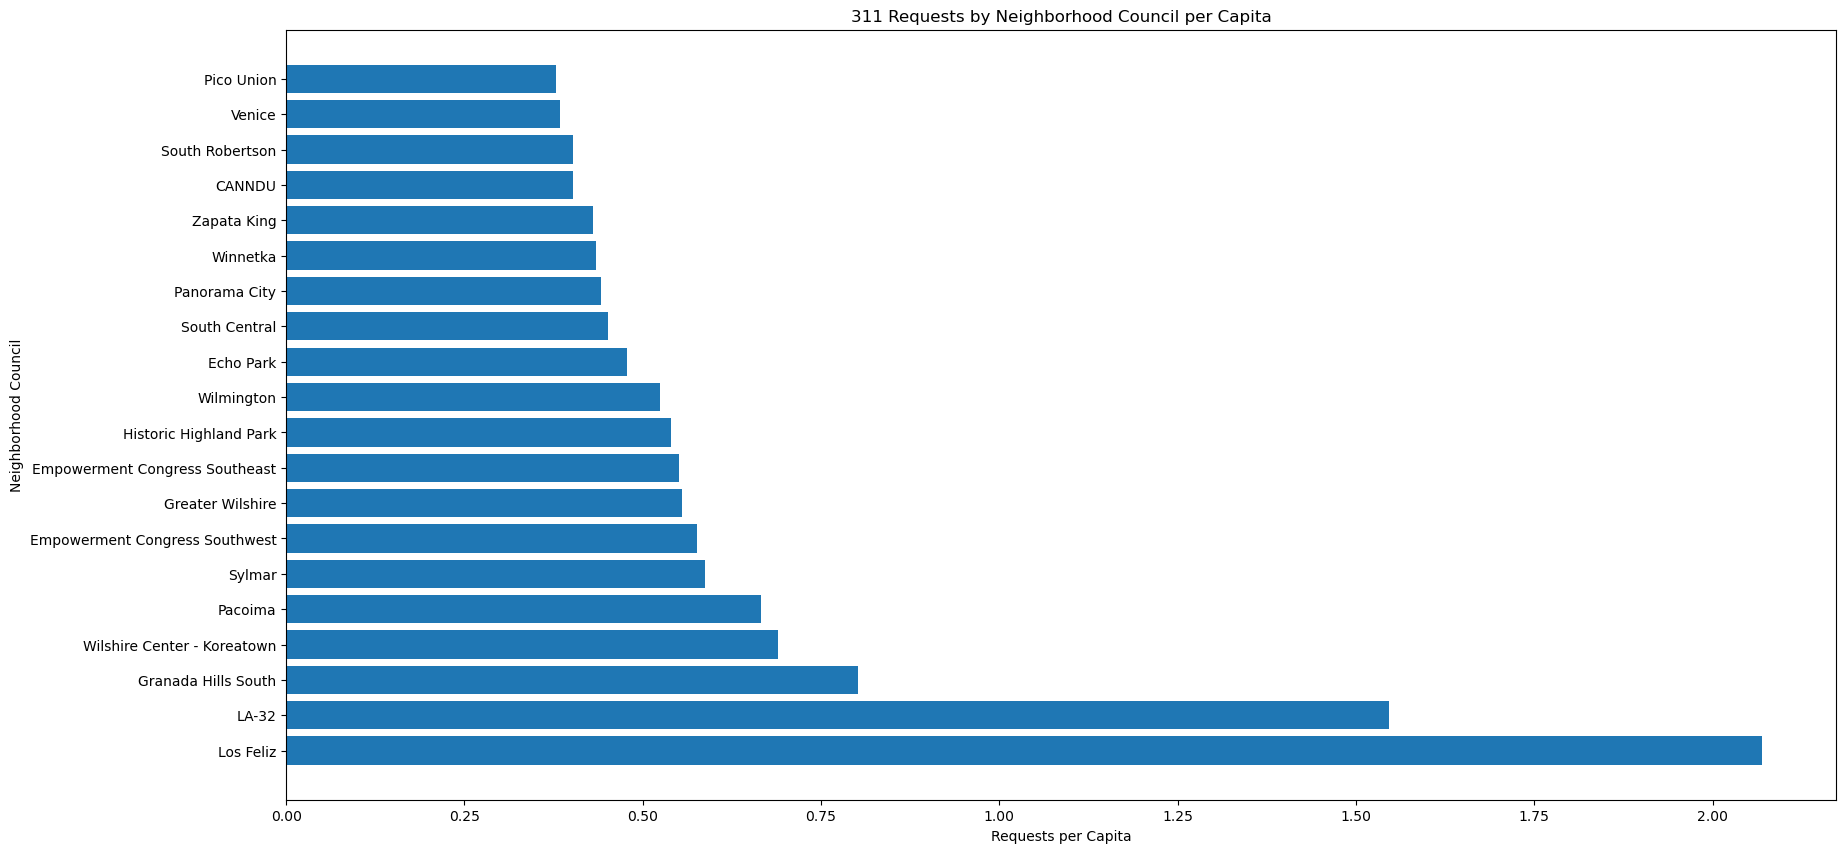

In [11]:
NC = list(nc_ct['councilName'].head(20))
per_cap = list(nc_ct['per_capita'].head(20))

plt.figure(figsize = (20, 10))
plt.barh(NC, per_cap)

plt.ylabel("Neighborhood Council")
plt.xlabel("Requests per Capita")
plt.title("311 Requests by Neighborhood Council per Capita")
plt.show()

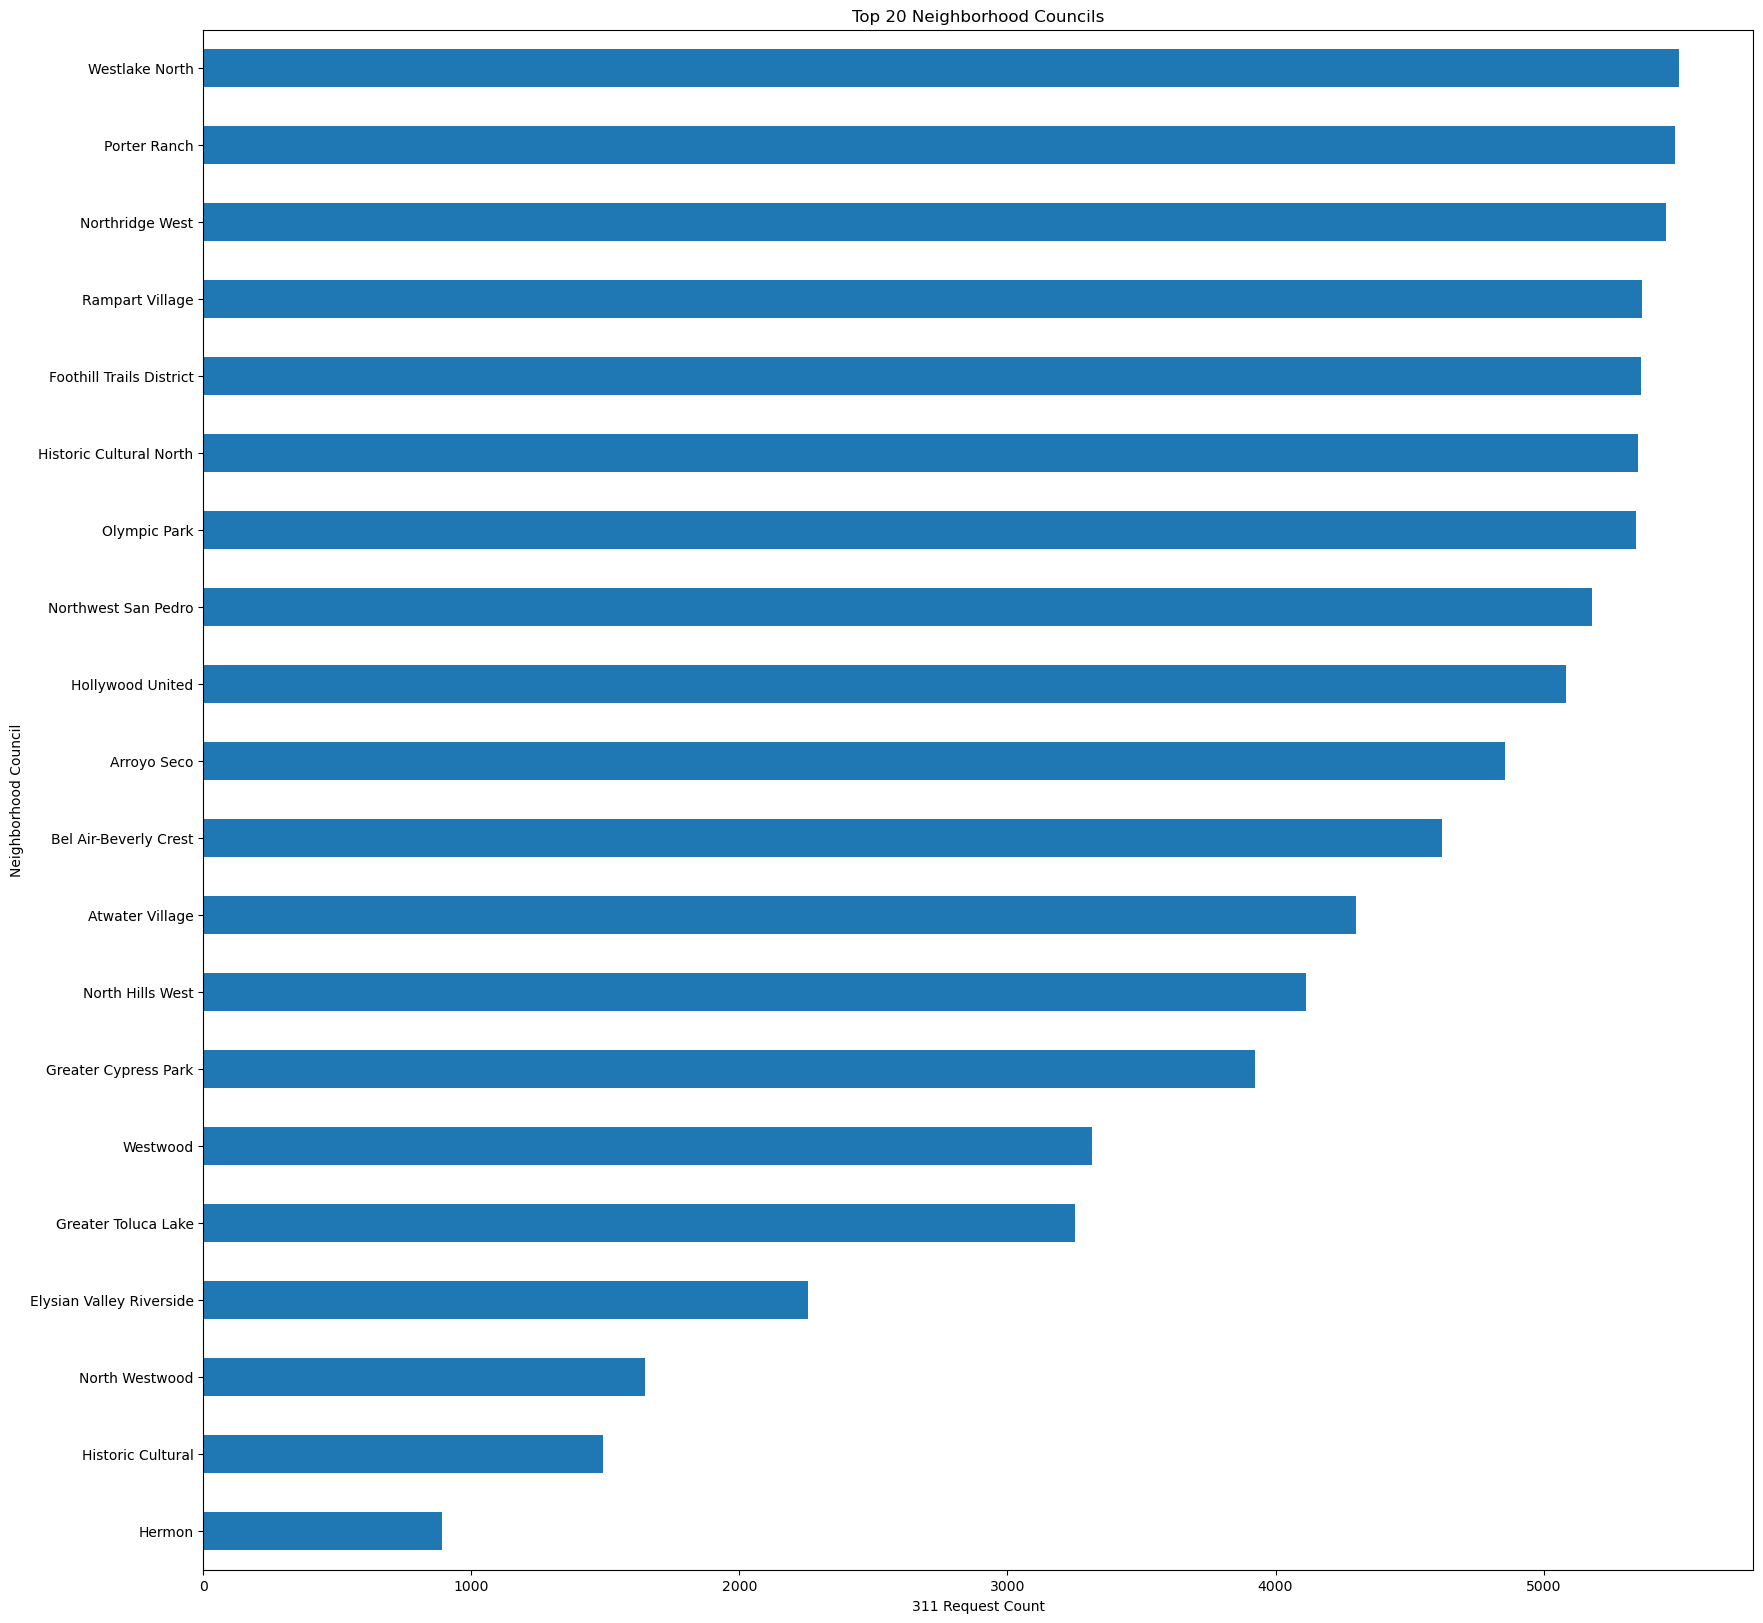

In [12]:
# Bar chart for type of request counts for all requests
plt.figure(figsize = (20,20))
df_311['councilName'].value_counts().sort_values(ascending = True).head(20).plot(kind = 'barh')
plt.title('Top 20 Neighborhood Councils')
plt.ylabel('Neighborhood Council')
plt.xlabel('311 Request Count')

plt.savefig('images/all_req_nc.jpg')

plt.show();

In [13]:
for nc in sorted(df_311['councilName'].unique()):
    print(f'{nc}: {(len(df_311[df_311["councilName"] == nc]) / len(df_311))*100}% of whole dataset')
    print()

Arleta: 1.012855473315154% of whole dataset

Arroyo Seco: 0.4660324965793579% of whole dataset

Atwater Village: 0.4125879627941608% of whole dataset

Bel Air-Beverly Crest: 0.4434840846592119% of whole dataset

Boyle Heights: 2.957488087721958% of whole dataset

CANNDU: 1.3750693243728183% of whole dataset

Canoga Park: 1.0445192006923802% of whole dataset

Central Alameda: 0.7989813874853434% of whole dataset

Central Hollywood: 0.5302235075350076% of whole dataset

Central San Pedro: 1.0116081143578692% of whole dataset

Chatsworth: 1.075799125313519% of whole dataset

Coastal San Pedro: 0.7686609697544238% of whole dataset

Del Rey: 0.6927639747381026% of whole dataset

Downtown Los Angeles: 1.7470701457107163% of whole dataset

Eagle Rock: 0.7463044592123216% of whole dataset

East Hollywood: 1.8132761211358257% of whole dataset

Echo Park: 1.6145622441714753% of whole dataset

Elysian Valley Riverside: 0.21646475443340157% of whole dataset

Empowerment Congress Central: 1.4118184

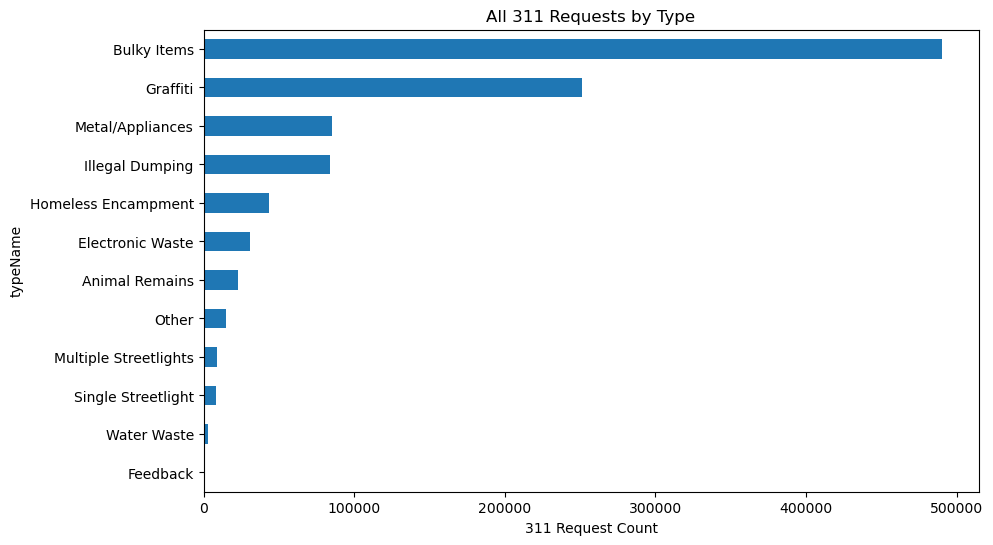

In [14]:
# Bar chart for type of request counts for all requests
plt.figure(figsize = (10,6))
df_311['typeName'].value_counts().sort_values(ascending = True).plot(kind = 'barh')
plt.title('All 311 Requests by Type')
plt.ylabel('typeName')
plt.xlabel('311 Request Count')

plt.savefig('images/all_req_type.jpg')

plt.show();

In [15]:
for value in sorted(df_311['typeName'].unique()):
    print(f'{value}: {(len(df_311[df_311["typeName"] == value]) / len(df_311))*100}% of whole dataset')
    print()

Animal Remains: 2.1659908539803223% of whole dataset

Bulky Items: 47.026008393766276% of whole dataset

Electronic Waste: 2.9459740050393304% of whole dataset

Feedback: 0.0269621436151533% of whole dataset

Graffiti: 24.091298999618115% of whole dataset

Homeless Encampment: 4.16541131181863% of whole dataset

Illegal Dumping: 8.02944150941948% of whole dataset

Metal/Appliances: 8.164827931629377% of whole dataset

Multiple Streetlights: 0.8527137733376063% of whole dataset

Other: 1.4536529386817527% of whole dataset

Single Streetlight: 0.7903458254733727% of whole dataset

Water Waste: 0.28737231362058413% of whole dataset



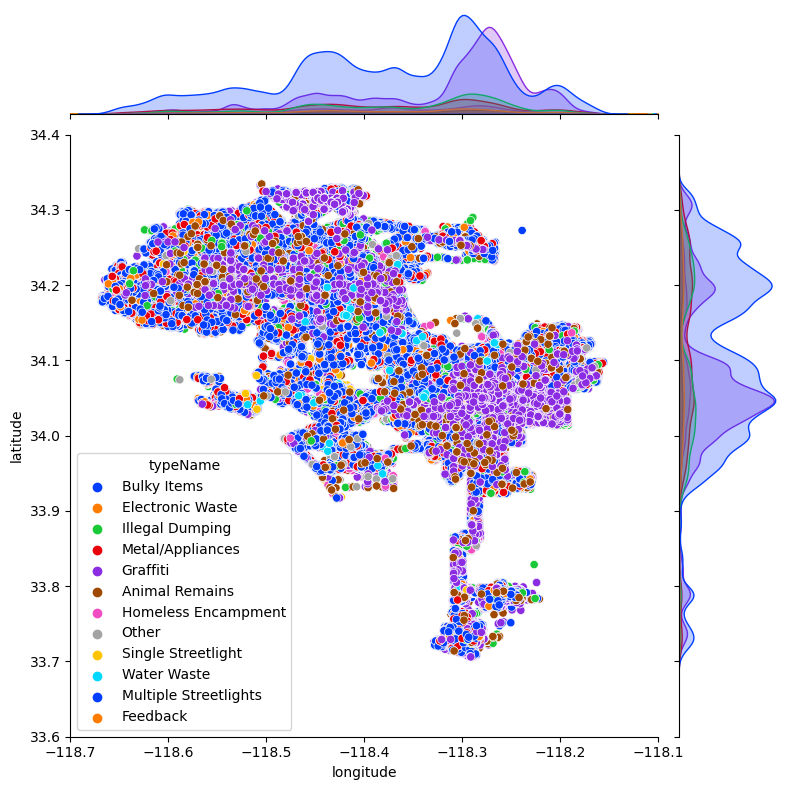

In [16]:
# type by location
sns.jointplot(x = df_311['longitude'], y = df_311['latitude'], hue = df_311['typeName'], 
              kind='scatter', color = 'green', height = 8, palette = 'bright', 
              xlim = (-118.7, -118.1), ylim = (33.6, 34.4)
             )
plt.title('All 311 Request Count by Lat/Long', pad = 70, loc = 'right')

plt.savefig('images/all_req_jointplt.jpg')

plt.show();

# >=2 Requests
---

In [17]:
by_address = df_311.groupby(['typeName', 'latitude', 'longitude', 'councilId', 
                             'councilName'])['address'].value_counts().sort_values(ascending = False).reset_index(name='count')
grt_eq_2_ct = by_address[by_address['count'] >= 2]
print(grt_eq_2_ct.size)
grt_eq_2_ct.head()

1286215


typeName   latitude   longitude  councilId      councilName  \
0             Graffiti  34.040224 -118.219759          5    Boyle Heights   
1             Graffiti  34.297026 -118.419005         79           Sylmar   
2  Homeless Encampment  34.225457 -118.366056         77  Sun Valley Area   
3             Graffiti  34.040055 -118.219868          5    Boyle Heights   
4             Graffiti  34.296286 -118.455561         79           Sylmar   

                                             address  count  
0                               1901 E 6TH ST, 90033    575  
1                 BRAND BLVD AT FOOTHILL BLVD, 91340    421  
2                         8601 N SUNLAND BLVD, 91352    261  
3                               1900 E 6TH ST, 90033    234  
4  ASTORIA ST AT SAN FERNANDO ROAD SOUTHWEST RDWY...    205

In [18]:
grt_eq_2_ct.describe(include = 'all').T

count  unique                         top    freq        mean  \
typeName       183745      12                 Bulky Items  102576         NaN   
latitude     183745.0     NaN                         NaN     NaN    34.08987   
longitude    183745.0     NaN                         NaN     NaN -118.365509   
councilId    183745.0     NaN                         NaN     NaN    51.03137   
councilName    183745     100               Boyle Heights    5080         NaN   
address        183745  149695  4705 N WHITSETT AVE, 91604      10         NaN   
count        183745.0     NaN                         NaN     NaN    3.708438   

                   std         min         25%         50%         75%  \
typeName           NaN         NaN         NaN         NaN         NaN   
latitude      0.123331   33.706052    34.01878   34.079963   34.193178   
longitude     0.110721 -118.667806 -118.443639 -118.340945 -118.280065   
councilId    30.075334         0.0        22.0        52.0        78.0   
councilName        NaN         NaN         NaN         NaN         NaN   
address            NaN         NaN         NaN         NaN         NaN   
count         4.557356         2.0         2.0         2.0         4.0   

                    max  
typeName            NaN  
latitude      34.334335  
longitude   -118.155779  
councilId          99.0  
councilName         NaN  
address             NaN  
count             575.0

In [19]:
# https://stackoverflow.com/questions/32918506/pandas-how-to-filter-dataframe-for-duplicate-items-that-occur-at-least-n-times
grt_eq_2_df = df_311[df_311['address'].isin(df_311['address'].value_counts()[df_311['address'].value_counts()>=2].index)]
print(grt_eq_2_df.shape)
grt_eq_2_df.head()

(871890, 19)


requestId          createdDate           closedDate  typeId  \
0    8610592  2021-10-01 00:01:14  2021-10-08 09:24:53       4   
1    8610569  2021-10-01 00:02:19  2021-10-08 13:36:33       5   
3    8612855  2021-10-01 00:04:14  2021-10-05 14:25:02       6   
4    8610587  2021-10-01 00:05:25  2021-10-08 14:16:32       7   
5    8610607  2021-10-01 00:10:13  2021-10-20 03:57:42       6   

           typeName                           address   latitude   longitude  \
0       Bulky Items        11614 N HERRICK AVE, 91340  34.281312 -118.425453   
1  Electronic Waste        11614 N HERRICK AVE, 91340  34.281312 -118.425453   
3   Illegal Dumping           918 W COLLEGE ST, 90012  34.066466 -118.245113   
4  Metal/Appliances        11614 N HERRICK AVE, 91340  34.281312 -118.425453   
5   Illegal Dumping  PICO BLVD AT MILITARY AVE, 90064  34.038036 -118.432884   

   agencyId         agencyName  sourceId      srnumber  sourceName  councilId  \
0         3  Sanitation Bureau         8  1-2079512481  Phone Call         64   
1         3  Sanitation Bureau         8  1-2079516251  Phone Call         64   
3         3  Sanitation Bureau         3  1-2079516331       Email         38   
4         3  Sanitation Bureau         8  1-2079516401  Phone Call         64   
5         3  Sanitation Bureau         8  1-2079516601  Phone Call         93   

               councilName  councilID  total_population       area  \
0                  Pacoima         64           24732.0  17.038756   
1                  Pacoima         64           24732.0  17.038756   
3  Historic Cultural North         38           30626.0   2.840725   
4                  Pacoima         64           24732.0  17.038756   
5                 Westside         93           54503.0  16.559332   

    pop_density  
0   1451.514436  
1   1451.514436  
3  10781.050656  
4   1451.514436  
5   3291.376658

In [20]:
# count of requests (for address with more than 2 requests) by neighborhood council per capita
grt_2_nc_ct = grt_eq_2_df.groupby(['councilName', 'total_population'])['requestId'].agg('count').reset_index(name = 'request_count')
grt_2_nc_ct['per_capita'] = grt_2_nc_ct['request_count']/grt_2_nc_ct['total_population']
grt_2_nc_ct.sort_values(by = 'per_capita', ascending = False, inplace = True)
grt_2_nc_ct.reset_index(drop = True, inplace = True)

In [21]:
grt_2_nc_ct.head()

councilName  total_population  request_count  per_capita
0                    Los Feliz            4153.0           6954    1.674452
1                        LA-32            6926.0           8466    1.222351
2          Granada Hills South           12027.0           7921    0.658601
3  Wilshire Center - Koreatown           28209.0          17656    0.625900
4                      Pacoima           24732.0          13980    0.565260

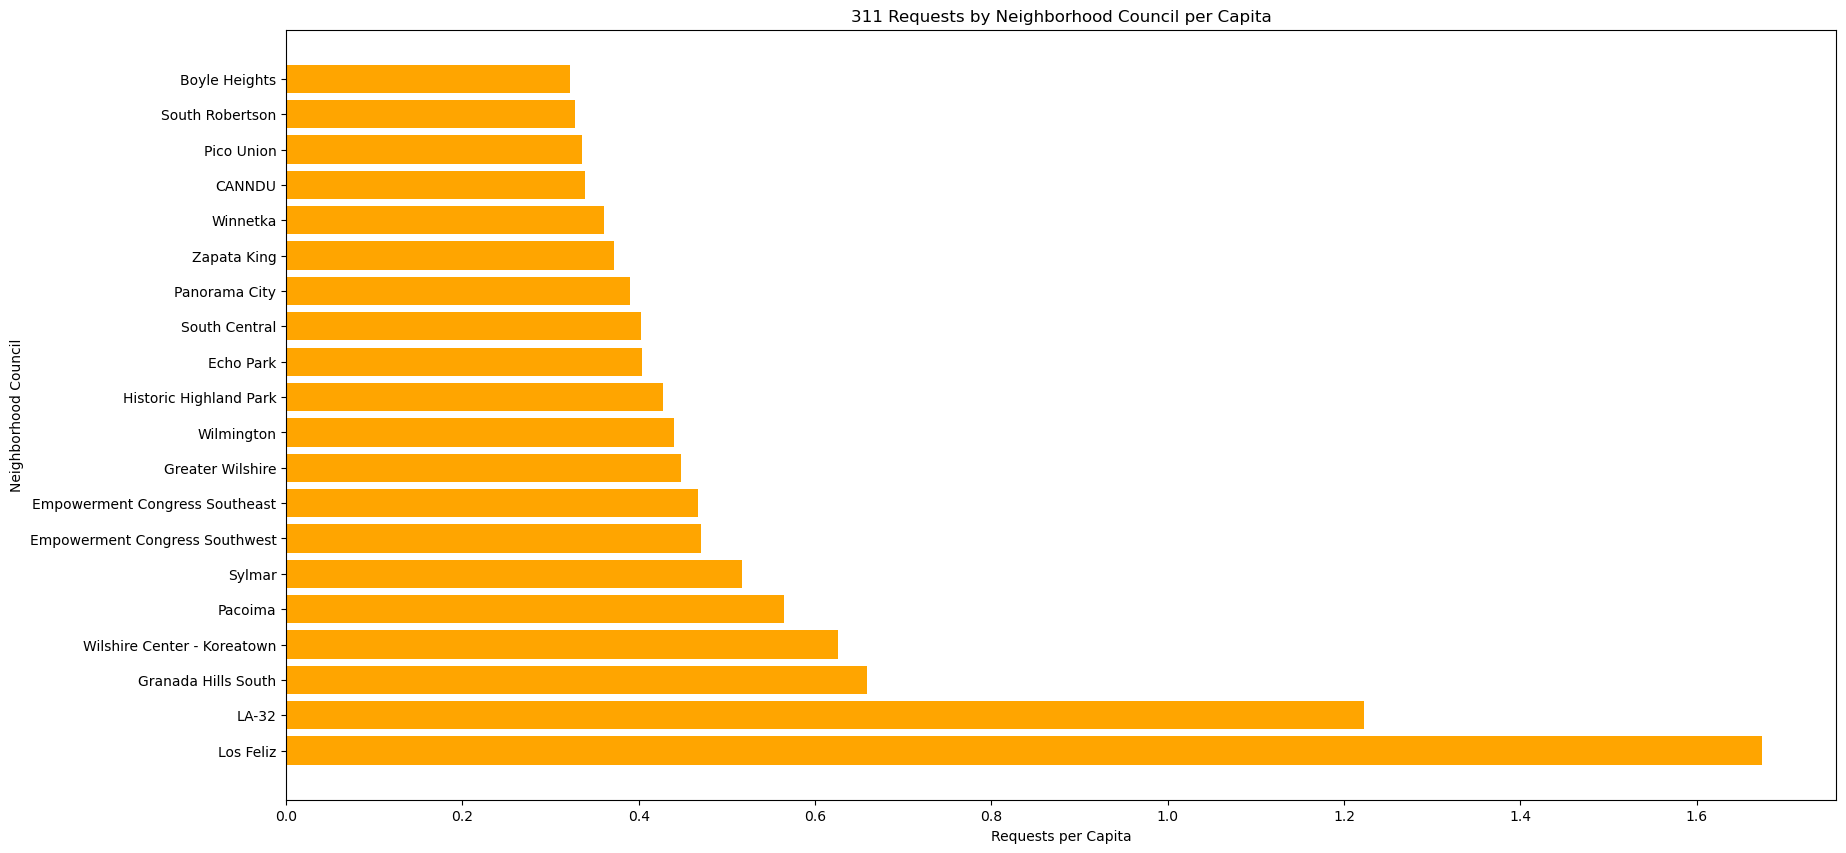

In [22]:
NC = list(grt_2_nc_ct['councilName'].head(20))
per_cap = list(grt_2_nc_ct['per_capita'].head(20))

plt.figure(figsize = (20, 10))
plt.barh(NC, per_cap, color = 'orange')

plt.ylabel("Neighborhood Council")
plt.xlabel("Requests per Capita")
plt.title("311 Requests by Neighborhood Council per Capita")
plt.show()

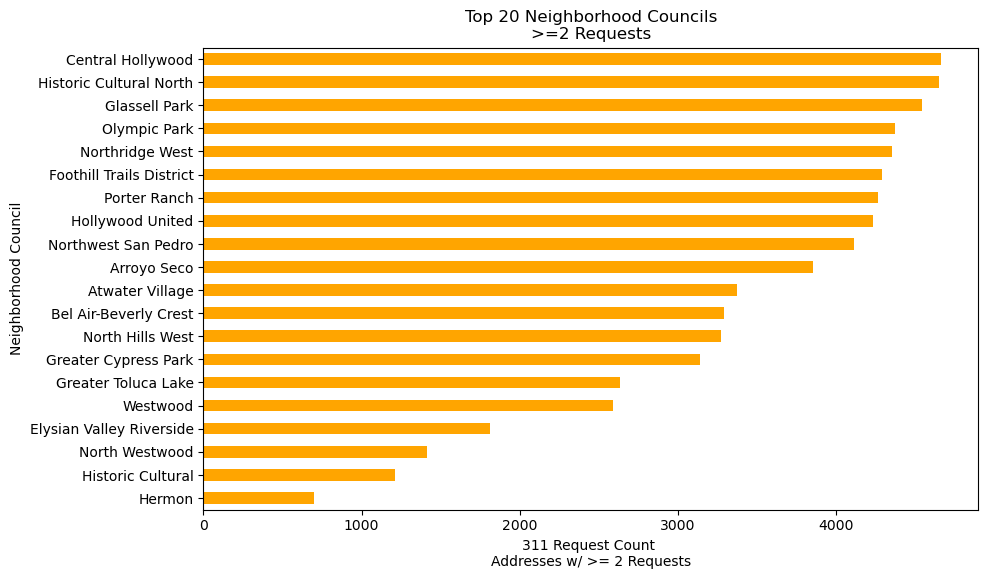

In [23]:
# Bar chart councilName for Neighborhood Councils with >=2 requests; top 20
plt.figure(figsize = (10,6))
grt_eq_2_df['councilName'].value_counts().sort_values(ascending = True).head(20).plot(kind = 'barh', color = 'orange')
plt.title('Top 20 Neighborhood Councils\n>=2 Requests')
plt.ylabel('Neighborhood Council')
plt.xlabel('311 Request Count \nAddresses w/ >= 2 Requests')

plt.savefig('images/grt_eq_2_nc.jpg')

plt.show();

In [24]:
# count of requests by type and neighborhood council for addresses with >= 2 requests
grt_eq_2_type_nc_ct = grt_eq_2_df.groupby(['typeName', 'councilName'])['requestId'].agg('count').reset_index(name = 'request_count')
grt_eq_2_type_nc_ct.sort_values(by = 'request_count', ascending = False).head(20)

typeName                     councilName  request_count
369     Graffiti                   Boyle Heights          14563
439     Graffiti                   South Central          13836
183  Bulky Items                        Van Nuys          10535
378     Graffiti            Downtown Los Angeles          10300
120  Bulky Items  Empowerment Congress Southeast           8832
179  Bulky Items                          Sylmar           8605
380     Graffiti                  East Hollywood           8134
171  Bulky Items                          Reseda           8041
444     Graffiti                          Sylmar           7944
196  Bulky Items     Wilshire Center - Koreatown           7887
198  Bulky Items    Woodland Hills-Warner Center           7806
172  Bulky Items                    Sherman Oaks           7758
152  Bulky Items                            Noho           7529
164  Bulky Items                         Pacoima           7160
166  Bulky Items                   Panorama City           7090
104  Bulky Items                   Boyle Heights           7052
464     Graffiti                     Zapata King           7029
433     Graffiti                      Pico Union           6712
181  Bulky Items                            UNNC           6435
118  Bulky Items    Empowerment Congress Central           6397

In [25]:
grt_eq_2_type_nc_ct.sort_values(by = 'request_count', ascending = False).tail(20)

typeName                     councilName  request_count
342      Feedback                           Palms              1
338      Feedback                  North Westwood              1
1082  Water Waste    Empowerment Congress Central              1
335      Feedback                      No council              1
354      Feedback                         Tarzana              1
356      Feedback                  Valley Village              1
1099  Water Waste                          Hermon              1
329      Feedback                     Lake Balboa              1
328      Feedback                           LA-32              1
325      Feedback         Historic Cultural North              1
352      Feedback                 Sunland-Tujunga              1
360      Feedback                      West Hills              1
361      Feedback               Westchester/Playa              1
322      Feedback                Greater Wilshire              1
319      Feedback                   Glassell Park              1
318      Feedback                          Encino              1
1124  Water Waste             Northwest San Pedro              1
362      Feedback                  Westlake North              1
316      Feedback  Empowerment Congress Southwest              1
341      Feedback                         Pacoima              1

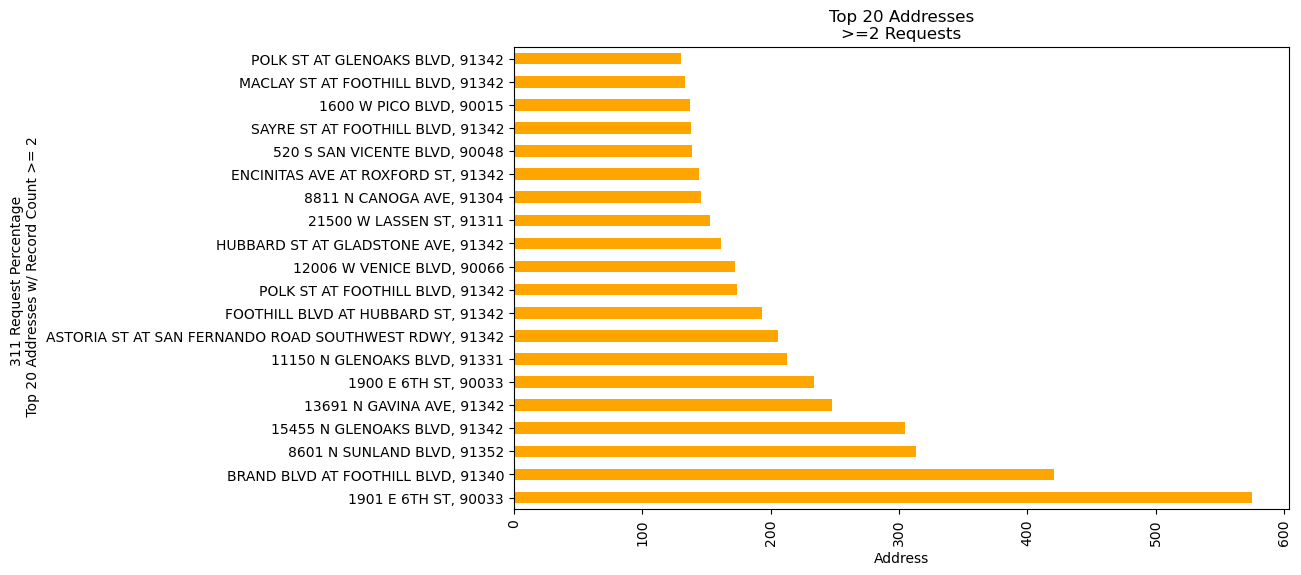

In [26]:
# Addresses with >=2 requests
plt.figure(figsize = (10, 6))
grt_eq_2_df['address'].value_counts().sort_values(ascending = False).head(20).plot(kind = 'barh', color = 'orange')
plt.title('Top 20 Addresses\n>=2 Requests')
plt.xlabel('Address')
plt.ylabel('311 Request Percentage \n Top 20 Addresses w/ Record Count >= 2')
plt.xticks(rotation=90)

plt.savefig('images/grt_eq_2_addresses.jpg')

plt.show();

In [27]:
# count of requests by type and address for addresses with >= 2 requests
grt_eq_2_type_add_ct = grt_eq_2_df.groupby(['typeName', 'address'])['requestId'].agg('count').reset_index(name = 'request_count')
grt_eq_2_type_add_ct.sort_values(by = 'request_count', ascending = False).head(20)

typeName  \
198121             Graffiti   
230490             Graffiti   
245909  Homeless Encampment   
198033             Graffiti   
230225             Graffiti   
231241             Graffiti   
51485           Bulky Items   
232803             Graffiti   
231676             Graffiti   
20644           Bulky Items   
236147  Homeless Encampment   
40525           Bulky Items   
231090             Graffiti   
233229             Graffiti   
194205             Graffiti   
232805             Graffiti   
232117             Graffiti   
353443                Other   
203155             Graffiti   
215653             Graffiti   

                                                  address  request_count  
198121                               1901 E 6TH ST, 90033            575  
230490                 BRAND BLVD AT FOOTHILL BLVD, 91340            421  
245909                         8601 N SUNLAND BLVD, 91352            263  
198033                               1900 E 6TH ST, 90033            234  
230225  ASTORIA ST AT SAN FERNANDO ROAD SOUTHWEST RDWY...            205  
231241                 FOOTHILL BLVD AT HUBBARD ST, 91342            188  
51485                        15455 N GLENOAKS BLVD, 91342            184  
232803                    POLK ST AT FOOTHILL BLVD, 91342            171  
231676                 HUBBARD ST AT GLADSTONE AVE, 91342            161  
20644                        11150 N GLENOAKS BLVD, 91331            160  
236147                         12006 W VENICE BLVD, 90066            159  
40525                           13691 N GAVINA AVE, 91342            152  
231090                 ENCINITAS AVE AT ROXFORD ST, 91342            144  
233229                   SAYRE ST AT FOOTHILL BLVD, 91342            138  
194205                            1600 W PICO BLVD, 90015            137  
232805                    POLK ST AT GLENOAKS BLVD, 91342            130  
232117                  MACLAY ST AT FOOTHILL BLVD, 91342            128  
353443                      520 S SAN VICENTE BLVD, 90048            115  
203155                           2500 S HOOPER AVE, 90011            114  
215653                          5300 W SUNSET BLVD, 90027            110

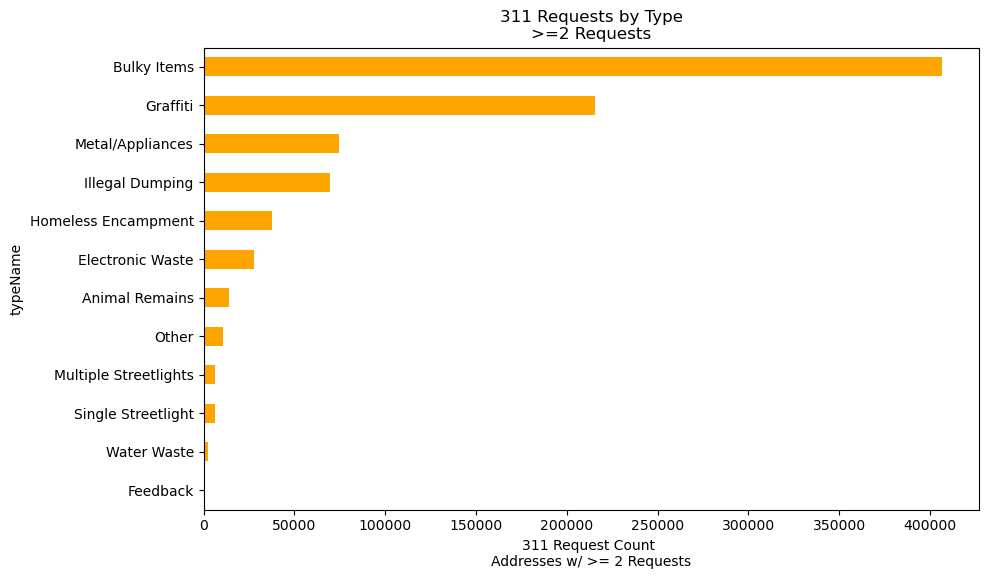

In [28]:
# Bar chart types of requests for address with >=2 requests
plt.figure(figsize = (10,6))
grt_eq_2_df['typeName'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'orange')
plt.title('311 Requests by Type\n>=2 Requests')
plt.ylabel('typeName')
plt.xlabel('311 Request Count \nAddresses w/ >= 2 Requests')

plt.savefig('images/grt_eq_2_type.jpg')

plt.show();

In [29]:
for value in sorted(grt_eq_2_df['typeName'].unique()):
    print(f'{value}: {(len(grt_eq_2_df[grt_eq_2_df["typeName"] == value]) / len(grt_eq_2_df))*100}% of >=2 dataset')
    print()

Animal Remains: 1.6183234123570633% of >=2 dataset

Bulky Items: 46.617004438633316% of >=2 dataset

Electronic Waste: 3.1625549094495864% of >=2 dataset

Feedback: 0.02649416784227368% of >=2 dataset

Graffiti: 24.74245604376699% of >=2 dataset

Homeless Encampment: 4.314879170537568% of >=2 dataset

Illegal Dumping: 8.013854958767734% of >=2 dataset

Metal/Appliances: 8.581931206918304% of >=2 dataset

Multiple Streetlights: 0.7246326944912775% of >=2 dataset

Other: 1.2432761013430593% of >=2 dataset

Single Streetlight: 0.6942389521613965% of >=2 dataset

Water Waste: 0.26035394373143406% of >=2 dataset



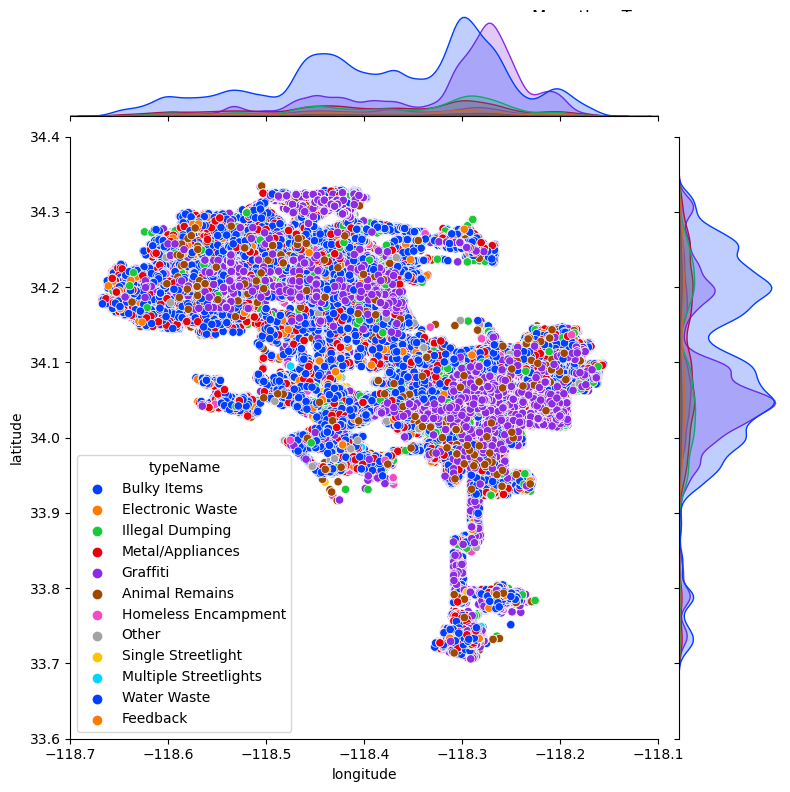

In [30]:
# Address with >=2 requests
sns.jointplot(x = grt_eq_2_df['longitude'], y = grt_eq_2_df['latitude'], hue = grt_eq_2_df['typeName'],
              kind='scatter', height = 8, palette = 'bright', 
              xlim = (-118.7, -118.1), ylim = (33.6, 34.4)
             )
plt.title('More than Two \n 311 Request Count by Lat/Long', pad = 70, loc = 'right')

plt.savefig('images/grt_eq_2_jointplt.jpg')

plt.show();

# >=5 Requests
---

In [31]:
by_address = df_311.groupby(['typeName', 'latitude', 'longitude', 'councilId', 'councilName'])['address'].value_counts().sort_values(ascending = False).reset_index(name='count')
grt_eq_5_ct = by_address[by_address['count'] >= 5]

In [32]:
grt_eq_5_ct.describe(include = 'all').T

count unique                           top   freq        mean  \
typeName       34058     12                   Bulky Items  17896         NaN   
latitude     34058.0    NaN                           NaN    NaN   34.089615   
longitude    34058.0    NaN                           NaN    NaN -118.359563   
councilId    34058.0    NaN                           NaN    NaN   51.453139   
councilName    34058    100                 Boyle Heights   1099         NaN   
address        34058  31088  12001 W FOOTHILL BLVD, 91342      7         NaN   
count        34058.0    NaN                           NaN    NaN    9.057108   

                   std         min         25%         50%         75%  \
typeName           NaN         NaN         NaN         NaN         NaN   
latitude      0.119518   33.706052   34.025398   34.076688   34.190088   
longitude     0.108301 -118.667806 -118.439985 -118.323623 -118.276522   
councilId    30.071169         0.0        22.0        52.0        78.0   
councilName        NaN         NaN         NaN         NaN         NaN   
address            NaN         NaN         NaN         NaN         NaN   
count         8.646663         5.0         5.0         7.0        10.0   

                    max  
typeName            NaN  
latitude      34.334335  
longitude   -118.155969  
councilId          99.0  
councilName         NaN  
address             NaN  
count             575.0

In [33]:
# https://stackoverflow.com/questions/32918506/pandas-how-to-filter-dataframe-for-duplicate-items-that-occur-at-least-n-times
grt_eq_5_df = df_311[df_311['address'].isin(df_311['address'].value_counts()[df_311['address'].value_counts()>=5].index)]
print(grt_eq_5_df.shape)
grt_eq_5_df.head()

(503459, 19)


requestId          createdDate           closedDate  typeId  \
0    8610592  2021-10-01 00:01:14  2021-10-08 09:24:53       4   
1    8610569  2021-10-01 00:02:19  2021-10-08 13:36:33       5   
3    8612855  2021-10-01 00:04:14  2021-10-05 14:25:02       6   
4    8610587  2021-10-01 00:05:25  2021-10-08 14:16:32       7   
5    8610607  2021-10-01 00:10:13  2021-10-20 03:57:42       6   

           typeName                           address   latitude   longitude  \
0       Bulky Items        11614 N HERRICK AVE, 91340  34.281312 -118.425453   
1  Electronic Waste        11614 N HERRICK AVE, 91340  34.281312 -118.425453   
3   Illegal Dumping           918 W COLLEGE ST, 90012  34.066466 -118.245113   
4  Metal/Appliances        11614 N HERRICK AVE, 91340  34.281312 -118.425453   
5   Illegal Dumping  PICO BLVD AT MILITARY AVE, 90064  34.038036 -118.432884   

   agencyId         agencyName  sourceId      srnumber  sourceName  councilId  \
0         3  Sanitation Bureau         8  1-2079512481  Phone Call         64   
1         3  Sanitation Bureau         8  1-2079516251  Phone Call         64   
3         3  Sanitation Bureau         3  1-2079516331       Email         38   
4         3  Sanitation Bureau         8  1-2079516401  Phone Call         64   
5         3  Sanitation Bureau         8  1-2079516601  Phone Call         93   

               councilName  councilID  total_population       area  \
0                  Pacoima         64           24732.0  17.038756   
1                  Pacoima         64           24732.0  17.038756   
3  Historic Cultural North         38           30626.0   2.840725   
4                  Pacoima         64           24732.0  17.038756   
5                 Westside         93           54503.0  16.559332   

    pop_density  
0   1451.514436  
1   1451.514436  
3  10781.050656  
4   1451.514436  
5   3291.376658

In [34]:
# grt_eq_5_df.groupby(['councilName', 'typeName'])['requestId'].agg('count').reset_index(name = 'request_count').sort_values(by = 'request_count', ascending = False).head(20)

In [35]:
# count of requests (for address with more than 5 requests) by neighborhood council per capita
grt_5_nc_ct = grt_eq_5_df.groupby(['councilName', 'total_population'])['requestId'].agg('count').reset_index(name = 'request_count')
grt_5_nc_ct['per_capita'] = grt_5_nc_ct['request_count']/grt_5_nc_ct['total_population']
grt_5_nc_ct.sort_values(by = 'per_capita', ascending = False, inplace = True)
grt_5_nc_ct.reset_index(drop = True, inplace = True)

In [36]:
grt_5_nc_ct.head()

councilName  total_population  request_count  per_capita
0                    Los Feliz            4153.0           3683    0.886829
1                        LA-32            6926.0           3923    0.566416
2  Wilshire Center - Koreatown           28209.0          13066    0.463186
3                       Sylmar           41645.0          14542    0.349190
4          Granada Hills South           12027.0           4101    0.340983

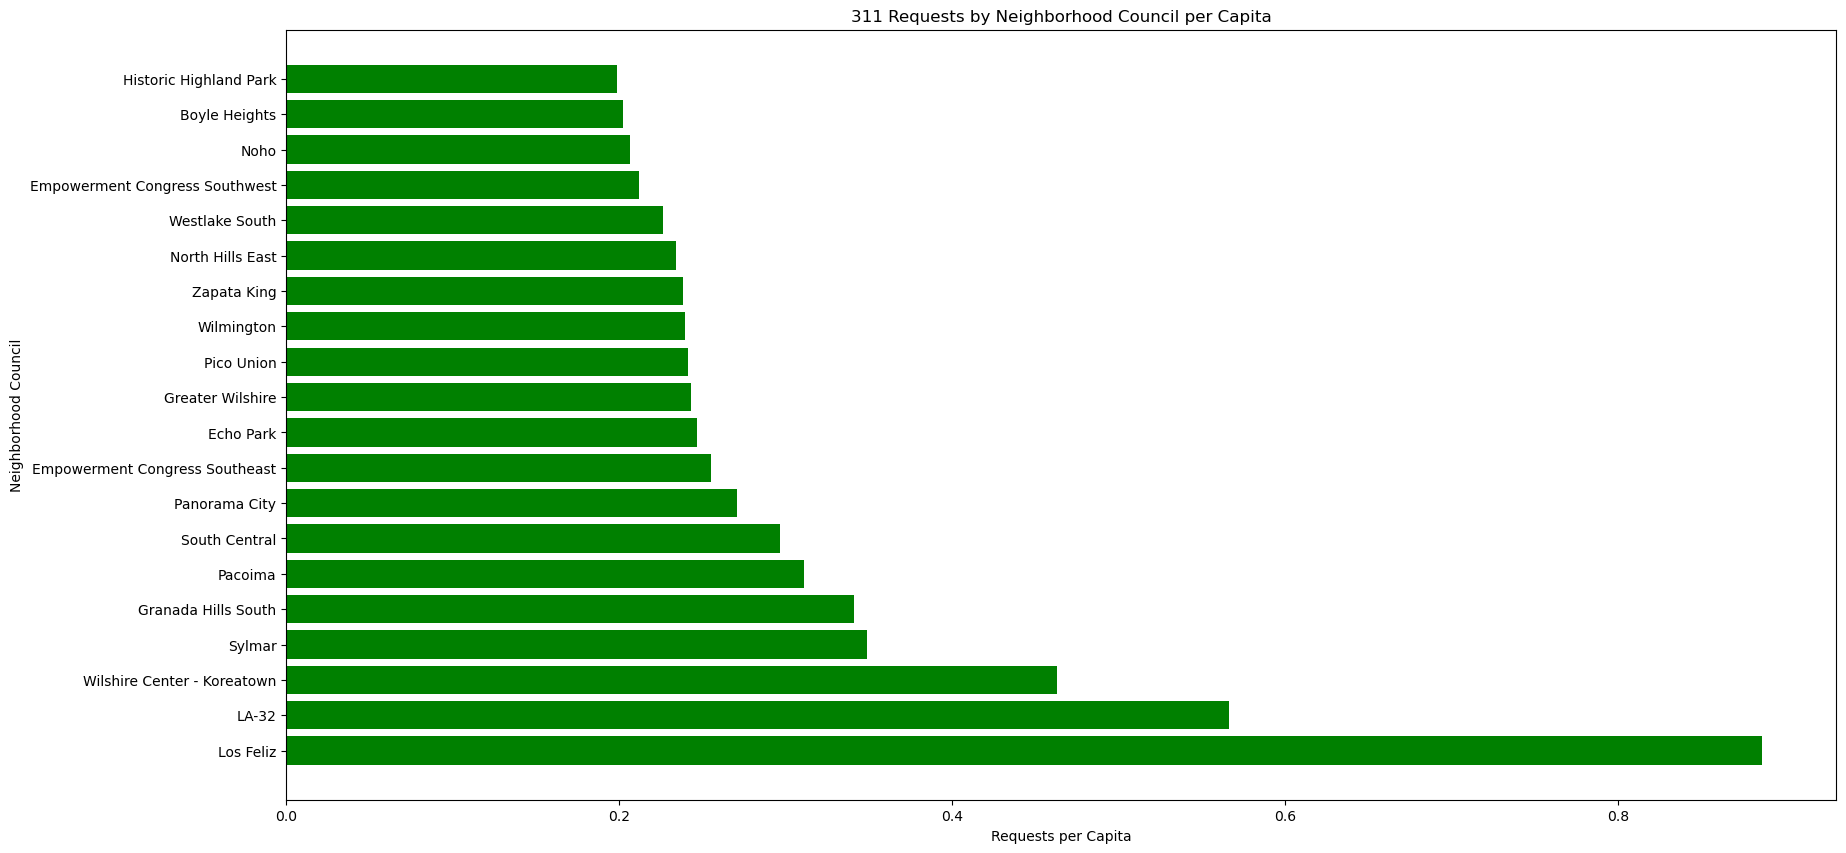

In [37]:
NC = list(grt_5_nc_ct['councilName'].head(20))
per_cap = list(grt_5_nc_ct['per_capita'].head(20))

plt.figure(figsize = (20, 10))
plt.barh(NC, per_cap, color = 'green')

plt.ylabel("Neighborhood Council")
plt.xlabel("Requests per Capita")
plt.title("311 Requests by Neighborhood Council per Capita")
plt.show()

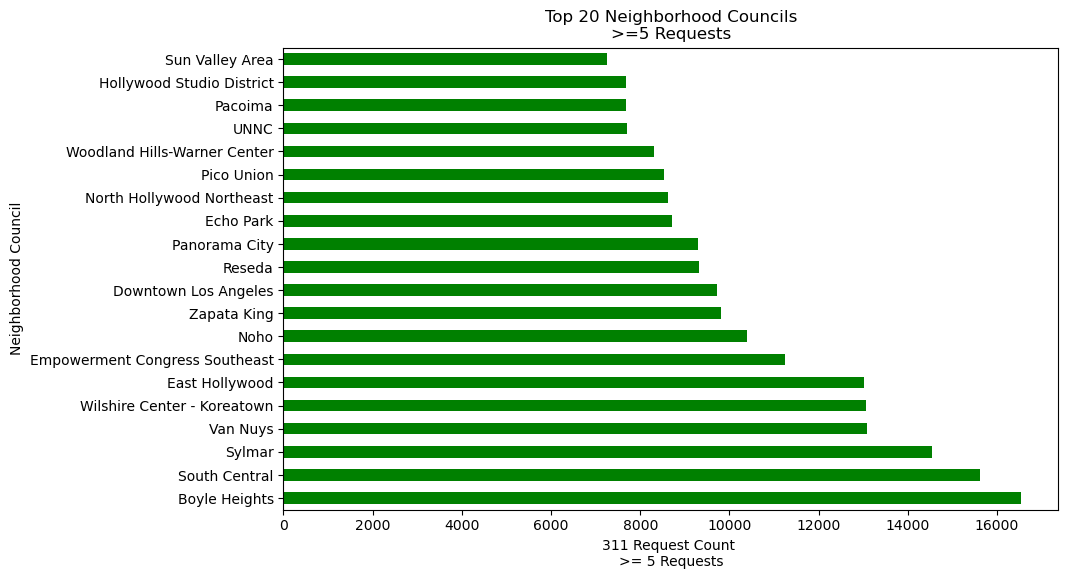

In [38]:
# Bar chart councilName for Neighborhood Councils with >=5 requests
plt.figure(figsize = (10,6))
grt_eq_5_df['councilName'].value_counts().sort_values(ascending = False).head(20).plot(kind = 'barh', color = 'green')
plt.title('Top 20 Neighborhood Councils\n>=5 Requests')
plt.ylabel('Neighborhood Council')
plt.xlabel('311 Request Count \n>= 5 Requests')

plt.savefig('images/grt_eq_5_nc.jpg')

plt.show();

In [39]:
# count of requests by type and neighborhood council for addresses with >= 5 requests
grt_eq_5_type_nc_ct = grt_eq_5_df.groupby(['typeName', 'councilName'])['requestId'].agg('count').reset_index(name = 'request_count')
grt_eq_5_type_nc_ct.sort_values(by = 'request_count', ascending = False).head(20)

typeName                     councilName  request_count
418     Graffiti                   South Central          11798
348     Graffiti                   Boyle Heights          10807
423     Graffiti                          Sylmar           7048
183  Bulky Items                        Van Nuys           7028
357     Graffiti            Downtown Los Angeles           6750
359     Graffiti                  East Hollywood           6707
443     Graffiti                     Zapata King           5930
196  Bulky Items     Wilshire Center - Koreatown           5865
412     Graffiti                      Pico Union           5499
166  Bulky Items                   Panorama City           4961
152  Bulky Items                            Noho           4665
171  Bulky Items                          Reseda           4548
360     Graffiti                       Echo Park           4531
436     Graffiti                  Westlake South           4523
179  Bulky Items                          Sylmar           4513
120  Bulky Items  Empowerment Congress Southeast           4262
172  Bulky Items                    Sherman Oaks           4151
106  Bulky Items                     Canoga Park           3919
115  Bulky Items                  East Hollywood           3848
384     Graffiti       Hollywood Studio District           3837

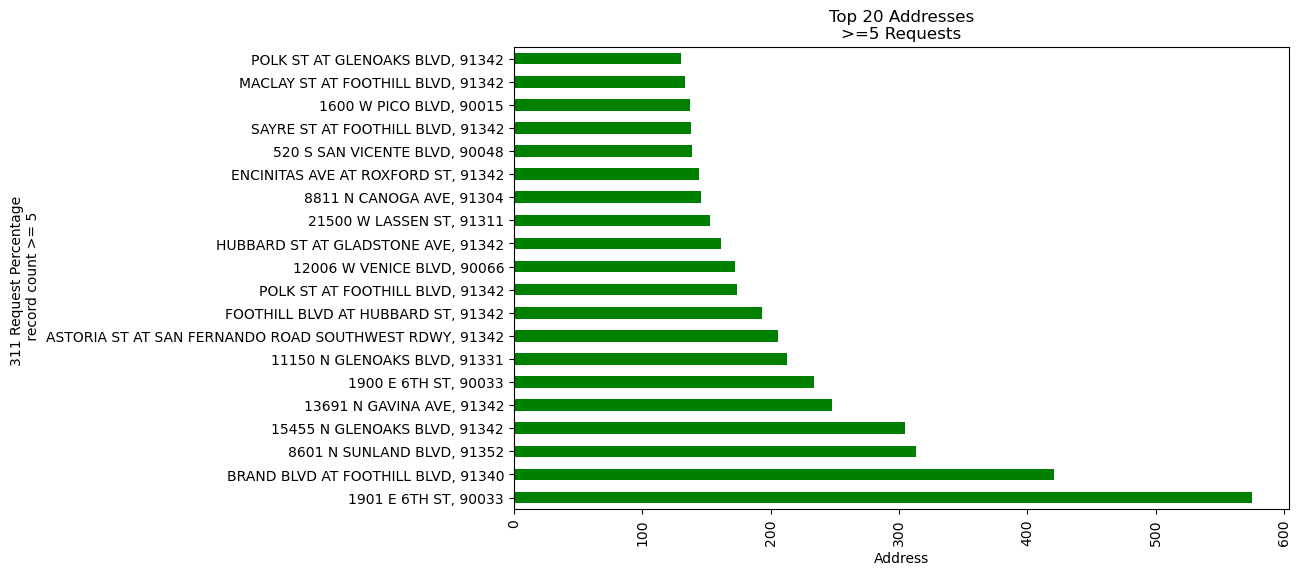

In [40]:
# Addresses with >=5 requests; top 20
plt.figure(figsize = (10,6))
grt_eq_5_df['address'].value_counts().sort_values(ascending = False).head(20).plot(kind = 'barh', color = 'green')
plt.title('Top 20 Addresses\n>=5 Requests')
plt.xlabel('Address')
plt.ylabel('311 Request Percentage \n record count >= 5')
plt.xticks(rotation=90)

plt.savefig('images/grt_eq_5_addresses.jpg')

plt.show();

In [41]:
# count of requests by type and address for addresses with >= 5 requests
grt_eq_5_type_add_ct = grt_eq_5_df.groupby(['typeName', 'address'])['requestId'].agg('count').reset_index(name = 'request_count')
grt_eq_5_type_add_ct.sort_values(by = 'request_count', ascending = False).head(20)

typeName  \
62758              Graffiti   
76177              Graffiti   
83390   Homeless Encampment   
62720              Graffiti   
76071              Graffiti   
76460              Graffiti   
15072           Bulky Items   
77033              Graffiti   
76621              Graffiti   
6222            Bulky Items   
78571   Homeless Encampment   
11760           Bulky Items   
76398              Graffiti   
77213              Graffiti   
61185              Graffiti   
77035              Graffiti   
76784              Graffiti   
128569                Other   
64831              Graffiti   
69997              Graffiti   

                                                  address  request_count  
62758                                1901 E 6TH ST, 90033            575  
76177                  BRAND BLVD AT FOOTHILL BLVD, 91340            421  
83390                          8601 N SUNLAND BLVD, 91352            263  
62720                                1900 E 6TH ST, 90033            234  
76071   ASTORIA ST AT SAN FERNANDO ROAD SOUTHWEST RDWY...            205  
76460                  FOOTHILL BLVD AT HUBBARD ST, 91342            188  
15072                        15455 N GLENOAKS BLVD, 91342            184  
77033                     POLK ST AT FOOTHILL BLVD, 91342            171  
76621                  HUBBARD ST AT GLADSTONE AVE, 91342            161  
6222                         11150 N GLENOAKS BLVD, 91331            160  
78571                          12006 W VENICE BLVD, 90066            159  
11760                           13691 N GAVINA AVE, 91342            152  
76398                  ENCINITAS AVE AT ROXFORD ST, 91342            144  
77213                    SAYRE ST AT FOOTHILL BLVD, 91342            138  
61185                             1600 W PICO BLVD, 90015            137  
77035                     POLK ST AT GLENOAKS BLVD, 91342            130  
76784                   MACLAY ST AT FOOTHILL BLVD, 91342            128  
128569                      520 S SAN VICENTE BLVD, 90048            115  
64831                            2500 S HOOPER AVE, 90011            114  
69997                           5300 W SUNSET BLVD, 90027            110

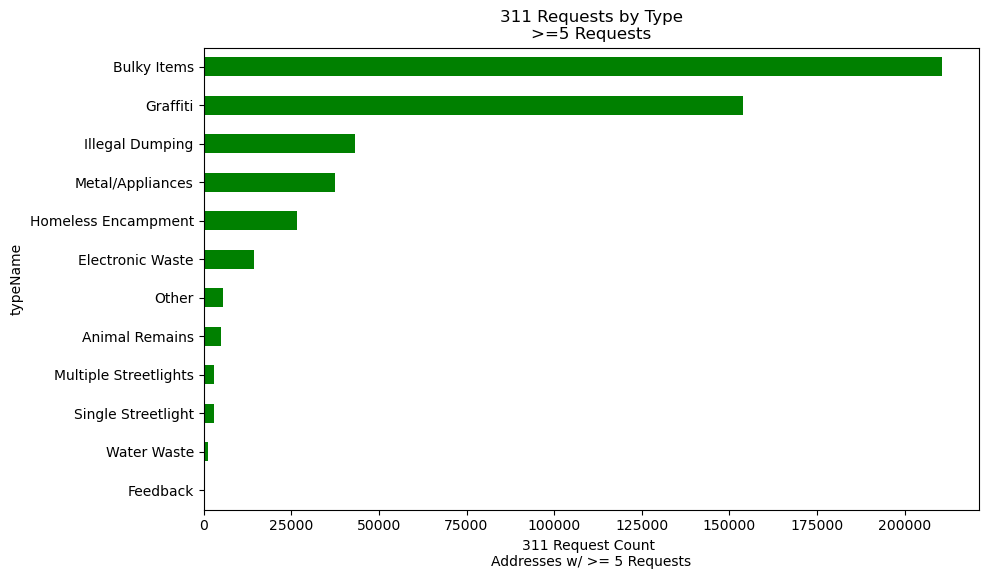

In [42]:
# Bar chart types of requests for address with >=5 requests
plt.figure(figsize = (10,6))
grt_eq_5_df['typeName'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'green')
plt.title('311 Requests by Type\n>=5 Requests')
plt.ylabel('typeName')
plt.xlabel('311 Request Count \nAddresses w/ >= 5 Requests')

plt.savefig('images/grt_eq_5_type.jpg')

plt.show();

In [43]:
for value in sorted(grt_eq_5_df['typeName'].unique()):
    print(f'{value}: {(len(grt_eq_5_df[grt_eq_5_df["typeName"] == value]) / len(grt_eq_5_df))*100}% of >=5 dataset')
    print()

Animal Remains: 0.9631370181087239% of >=5 dataset

Bulky Items: 41.80976007976817% of >=5 dataset

Electronic Waste: 2.8711374709757895% of >=5 dataset

Feedback: 0.03317052629906308% of >=5 dataset

Graffiti: 30.550451973249064% of >=5 dataset

Homeless Encampment: 5.294770775773201% of >=5 dataset

Illegal Dumping: 8.578454253474463% of >=5 dataset

Metal/Appliances: 7.434964912733707% of >=5 dataset

Multiple Streetlights: 0.5698577242635448% of >=5 dataset

Other: 1.0757579068007526% of >=5 dataset

Single Streetlight: 0.5658852061438965% of >=5 dataset

Water Waste: 0.2526521524096302% of >=5 dataset



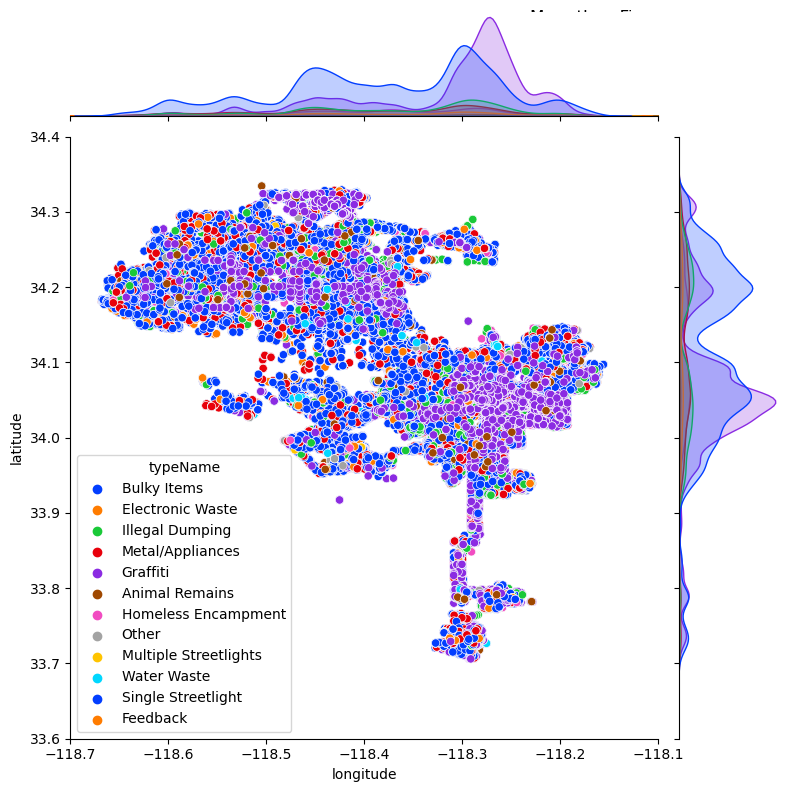

In [44]:
# Address with more than 5 requests
sns.jointplot(x = grt_eq_5_df['longitude'], y = grt_eq_5_df['latitude'], hue = grt_eq_5_df['typeName'],
              kind='scatter', height = 8, palette = 'bright', 
              xlim = (-118.7, -118.1), ylim = (33.6, 34.4)
             )
plt.title('More than Five \n 311 Request Count by Lat/Long', pad = 70, loc = 'right')

plt.savefig('images/grt_eq_5_jointplt.jpg')

plt.show();

# Timeseries EDA
---

In [45]:
# Set Date to be in the index
df_311['createdDate'] = pd.to_datetime(df_311['createdDate'])
df_311['createdDay'] = df_311['createdDate'].dt.date
df_311.set_index('createdDay', inplace = True)

# Sort the index# Sort the index
df_311.sort_index(inplace = True)

df_311.head()

requestId         createdDate           closedDate  typeId  \
createdDay                                                               
2021-10-01    8610592 2021-10-01 00:01:14  2021-10-08 09:24:53       4   
2021-10-01    8610569 2021-10-01 00:02:19  2021-10-08 13:36:33       5   
2021-10-01    8610575 2021-10-01 00:03:11  2021-10-13 12:31:58       4   
2021-10-01    8612855 2021-10-01 00:04:14  2021-10-05 14:25:02       6   
2021-10-01    8610587 2021-10-01 00:05:25  2021-10-08 14:16:32       7   

                    typeName                            address   latitude  \
createdDay                                                                   
2021-10-01       Bulky Items         11614 N HERRICK AVE, 91340  34.281312   
2021-10-01  Electronic Waste         11614 N HERRICK AVE, 91340  34.281312   
2021-10-01       Bulky Items  4539 N VISTA DEL MONTE AVE, 91403  34.154158   
2021-10-01   Illegal Dumping            918 W COLLEGE ST, 90012  34.066466   
2021-10-01  Metal/Appliances         11614 N HERRICK AVE, 91340  34.281312   

             longitude  agencyId         agencyName  sourceId      srnumber  \
createdDay                                                                    
2021-10-01 -118.425453         3  Sanitation Bureau         8  1-2079512481   
2021-10-01 -118.425453         3  Sanitation Bureau         8  1-2079516251   
2021-10-01 -118.450025         3  Sanitation Bureau         8  1-2079512561   
2021-10-01 -118.245113         3  Sanitation Bureau         3  1-2079516331   
2021-10-01 -118.425453         3  Sanitation Bureau         8  1-2079516401   

            sourceName  councilId              councilName  councilID  \
createdDay                                                              
2021-10-01  Phone Call         64                  Pacoima         64   
2021-10-01  Phone Call         64                  Pacoima         64   
2021-10-01  Phone Call         72             Sherman Oaks         72   
2021-10-01       Email         38  Historic Cultural North         38   
2021-10-01  Phone Call         64                  Pacoima         64   

            total_population       area   pop_density  
createdDay                                             
2021-10-01           24732.0  17.038756   1451.514436  
2021-10-01           24732.0  17.038756   1451.514436  
2021-10-01               NaN        NaN           NaN  
2021-10-01           30626.0   2.840725  10781.050656  
2021-10-01           24732.0  17.038756   1451.514436

In [46]:
df_nc_ct = df_311.groupby(['createdDay', 'councilName', 'councilId', 'total_population'])['requestId'].agg('count').reset_index(name = 'request_ct')
df_nc_ct['nc_running_ct'] = df_nc_ct.groupby('councilName')['request_ct'].cumsum()
df_nc_ct['per_capita'] = df_nc_ct['nc_running_ct']/df_nc_ct['total_population']
df_nc_ct.set_index('createdDay', inplace = True)
df_nc_ct.head()

councilName  councilId  total_population  request_ct  \
createdDay                                                                   
2021-10-01  Bel Air-Beverly Crest          4           26351.0          17   
2021-10-01          Boyle Heights          5           81681.0         240   
2021-10-01                 CANNDU          6           35585.0          46   
2021-10-01            Canoga Park          7           71182.0          24   
2021-10-01        Central Alameda          8           46956.0          17   

            nc_running_ct  per_capita  
createdDay                             
2021-10-01             17    0.000645  
2021-10-01            240    0.002938  
2021-10-01             46    0.001293  
2021-10-01             24    0.000337  
2021-10-01             17    0.000362

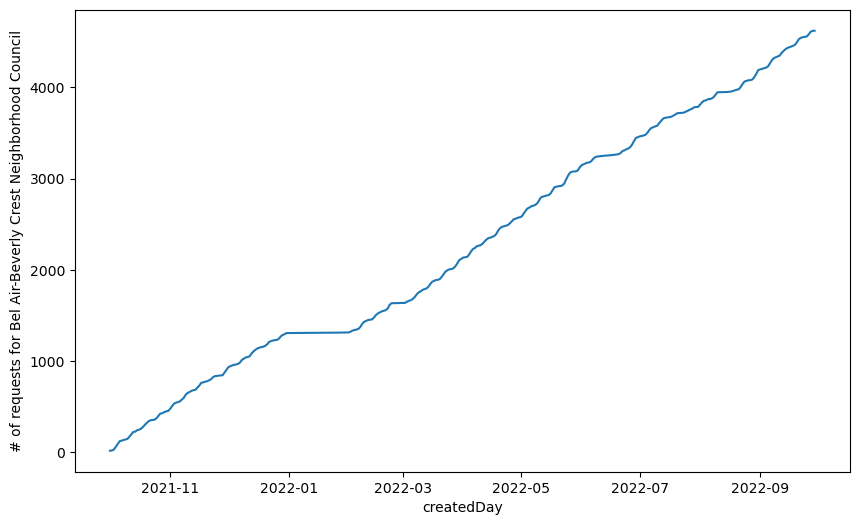

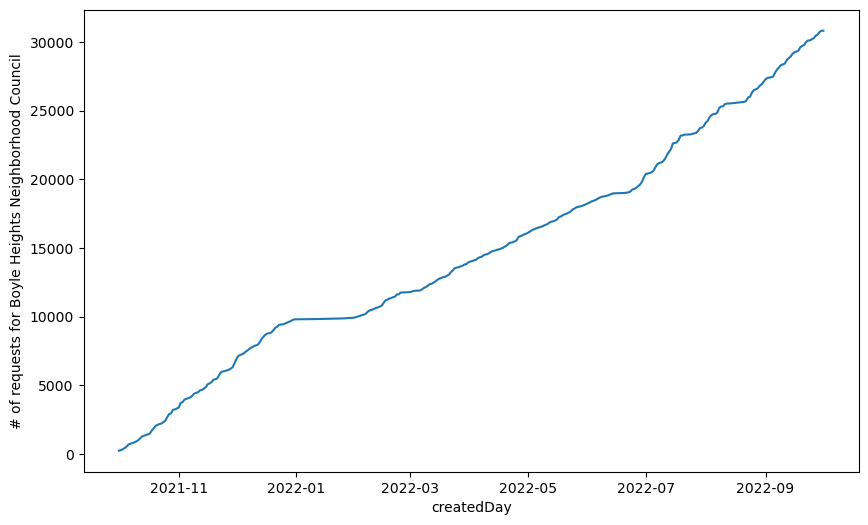

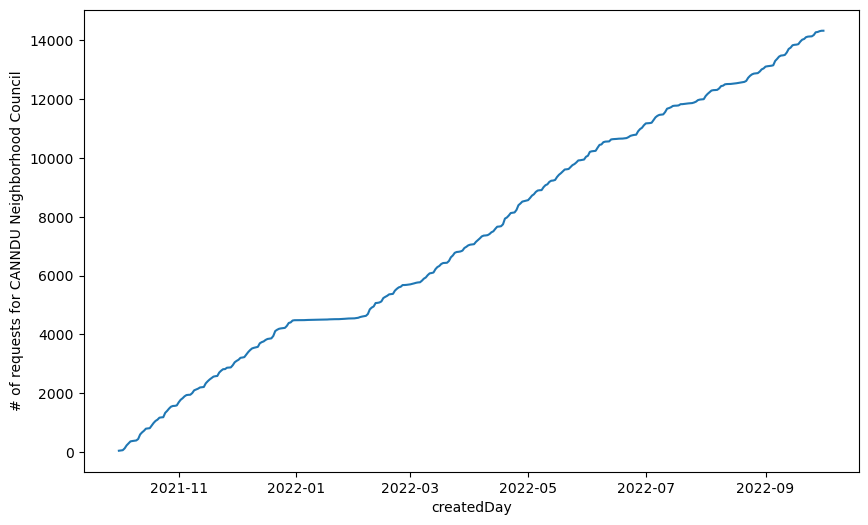

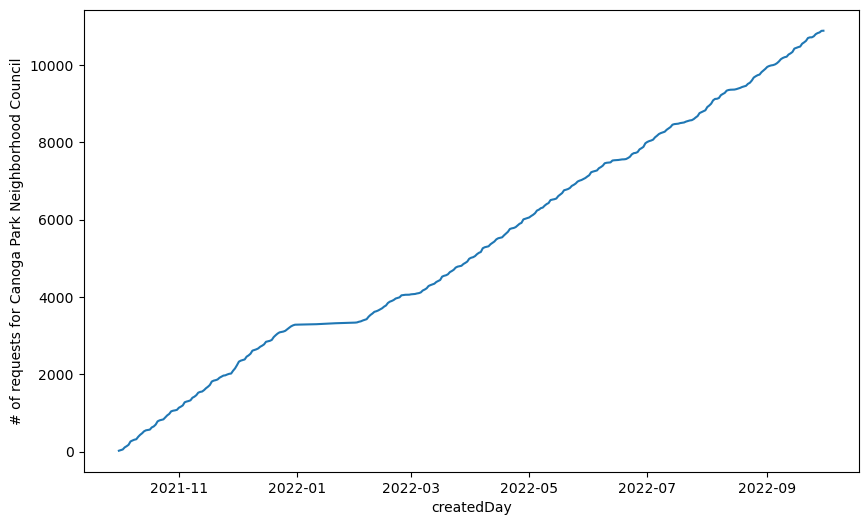

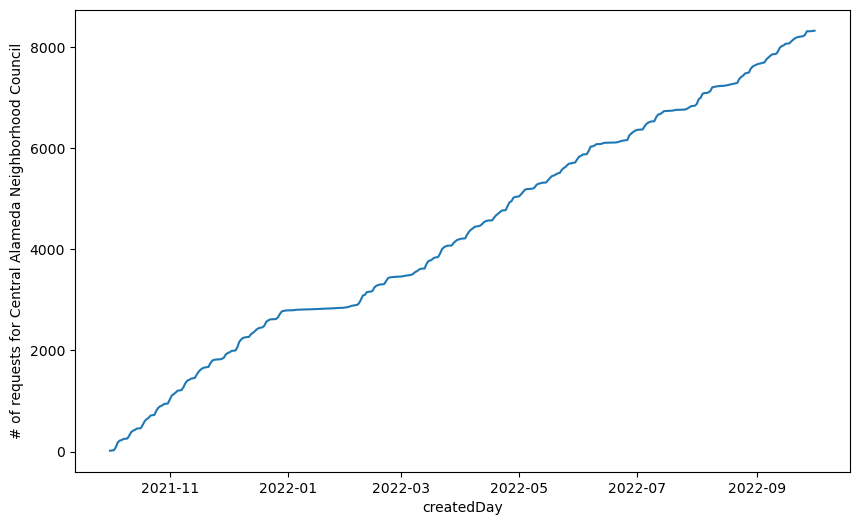

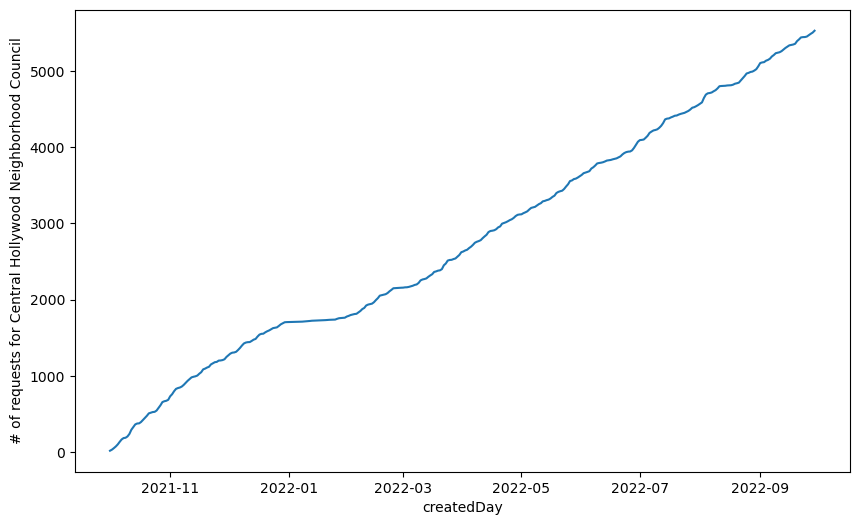

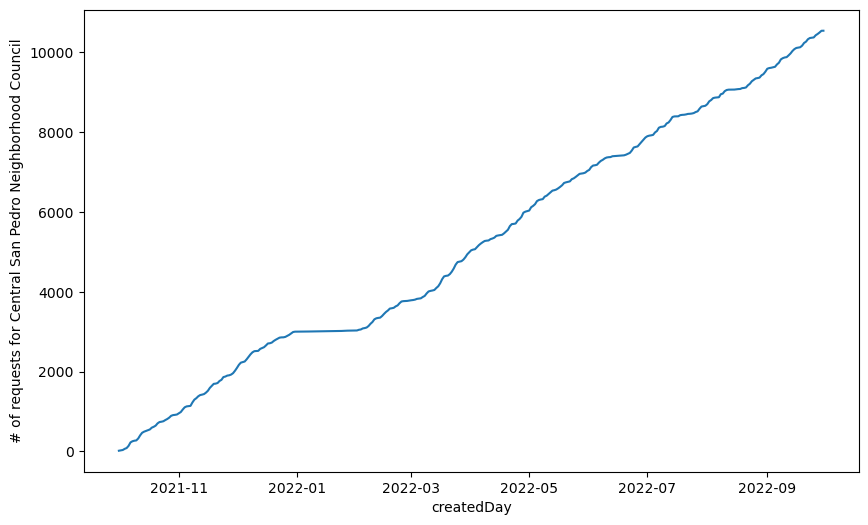

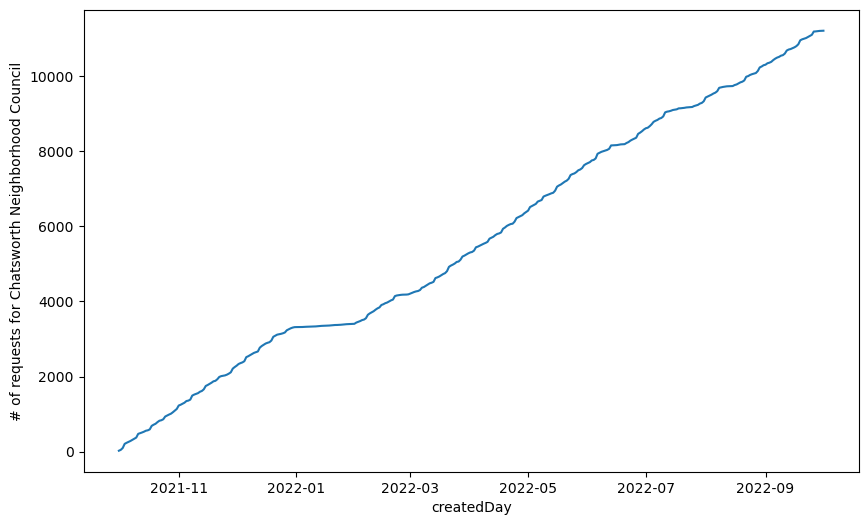

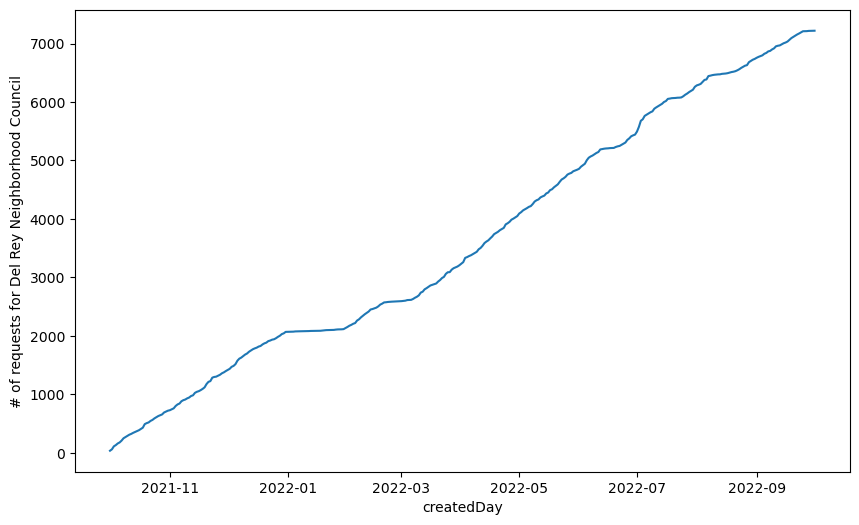

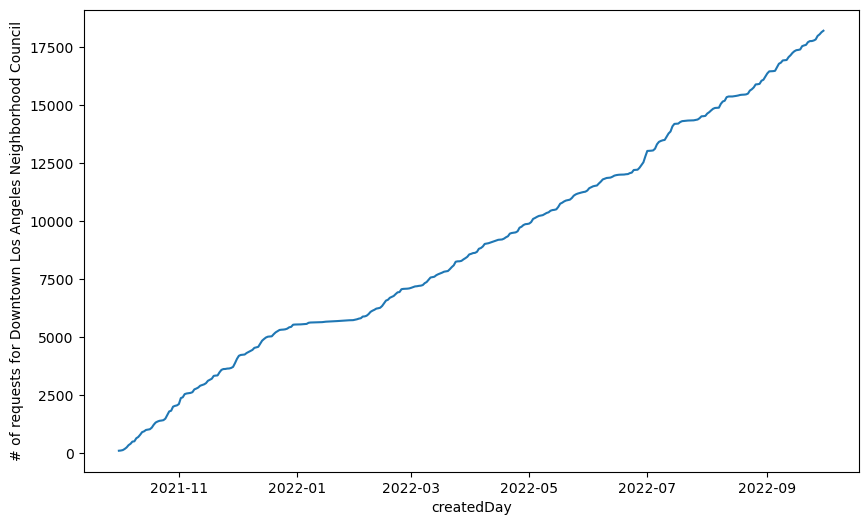

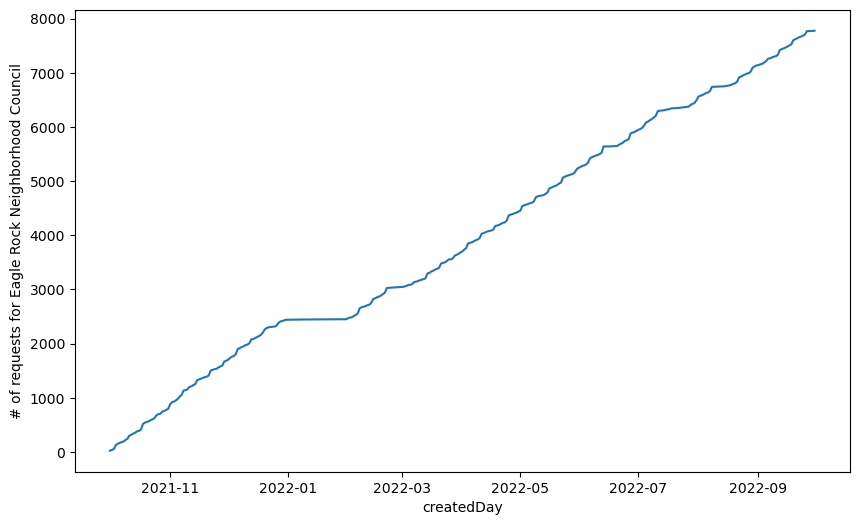

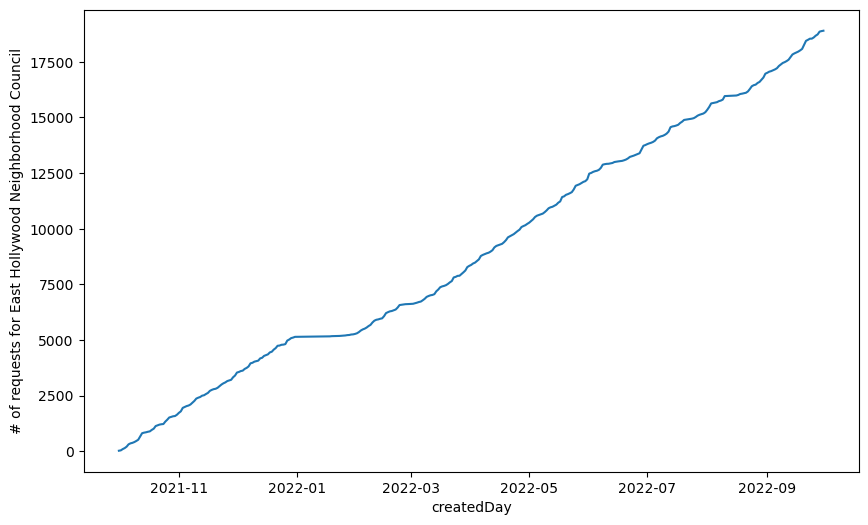

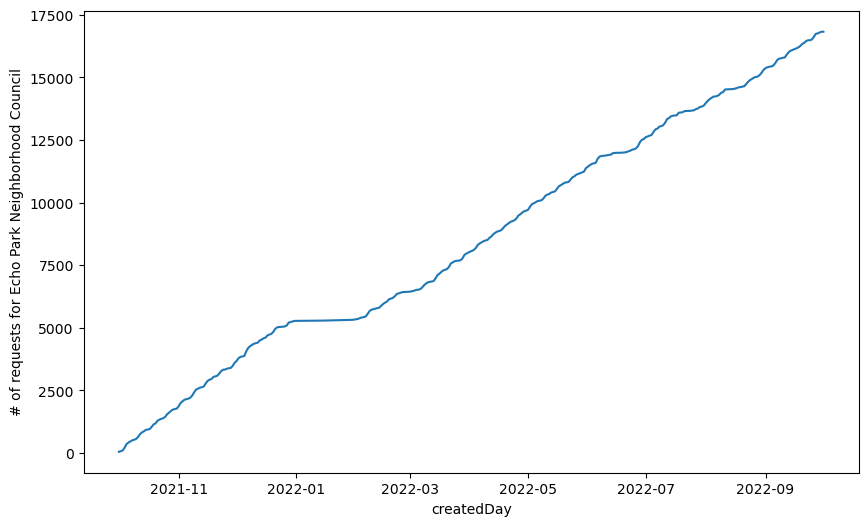

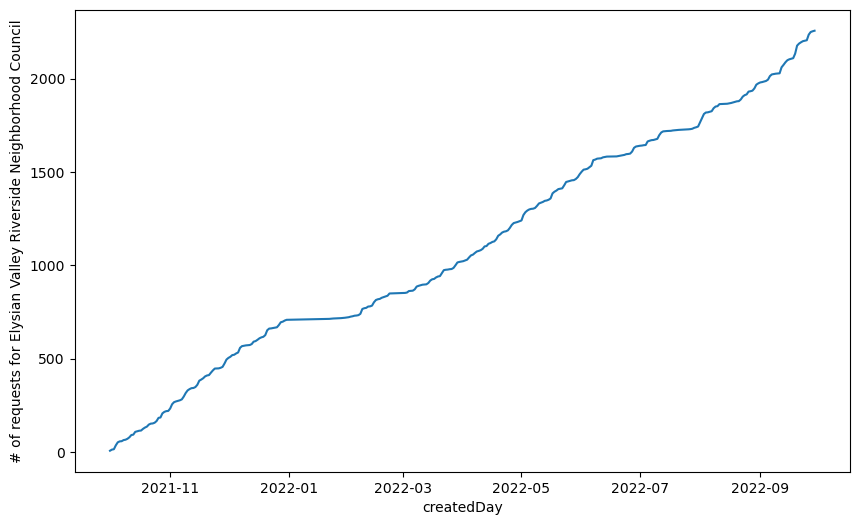

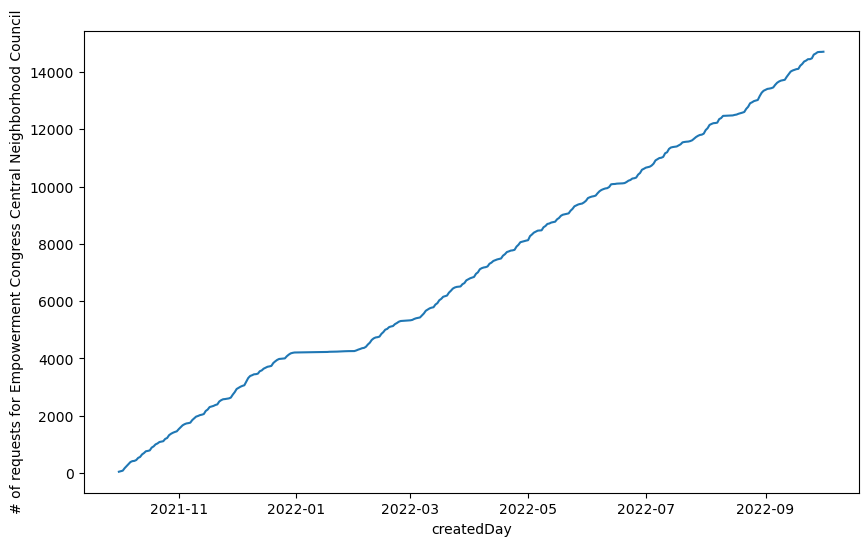

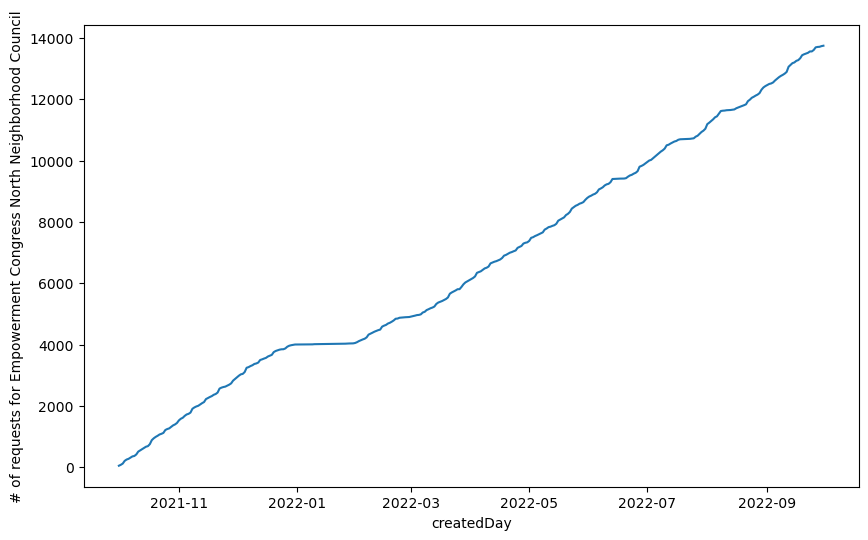

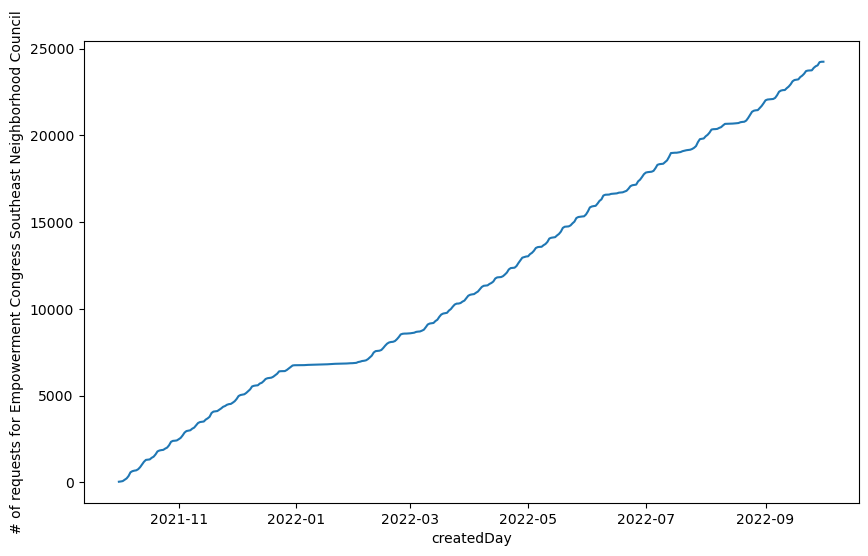

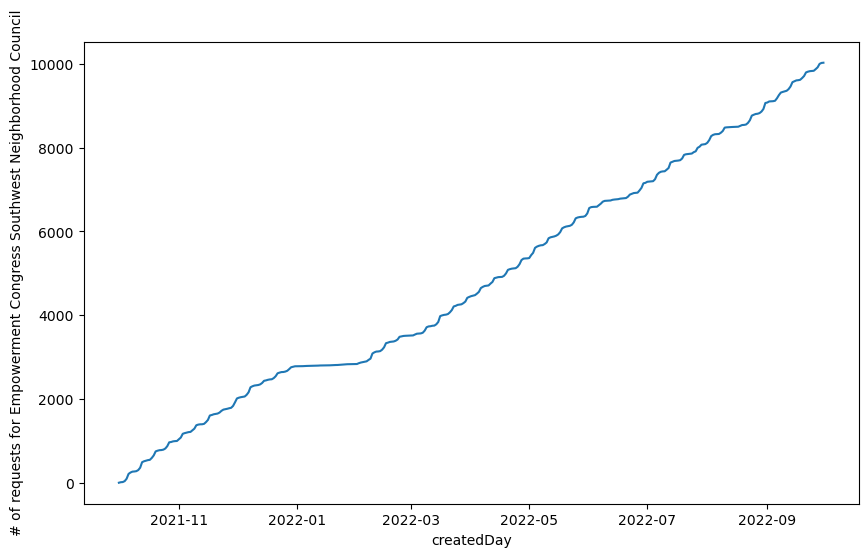

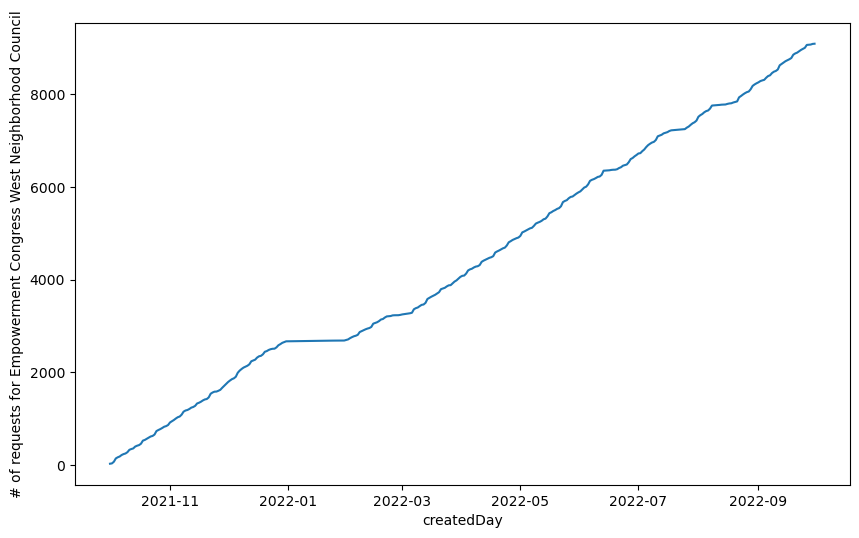

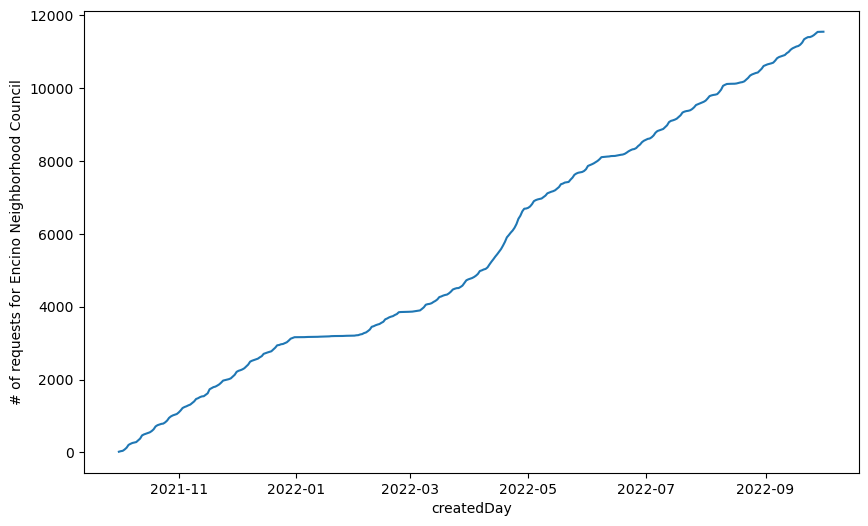

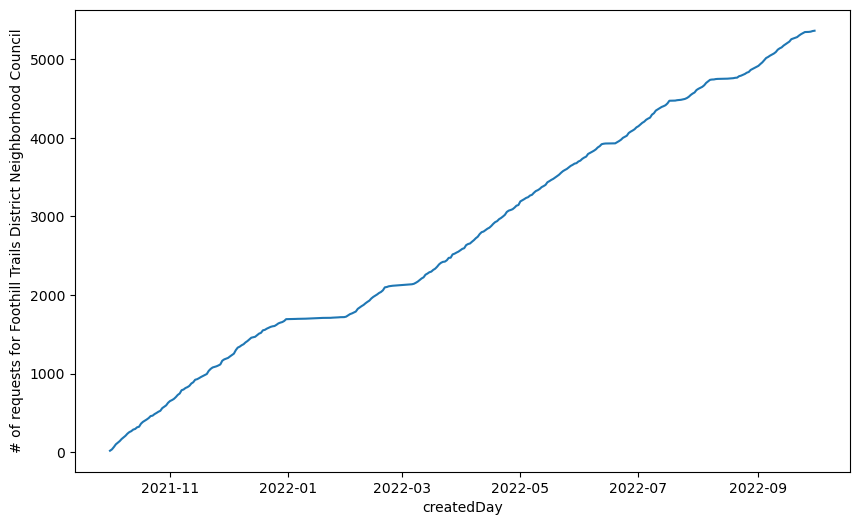

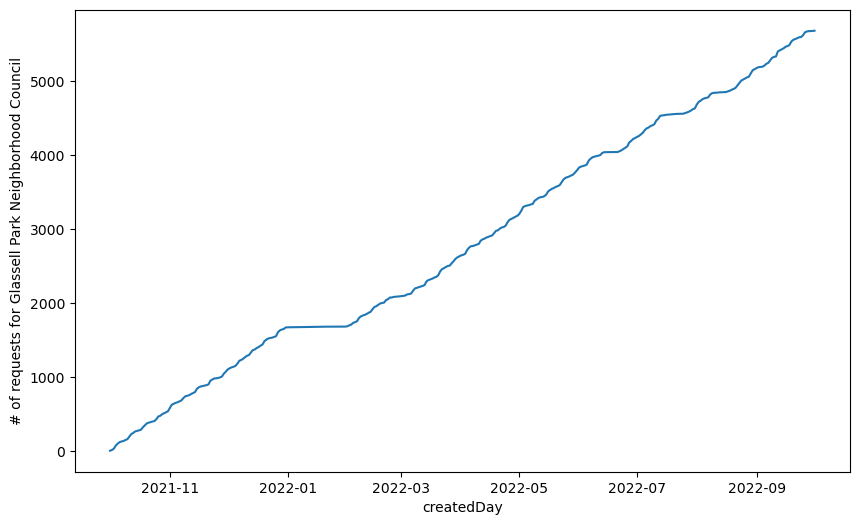

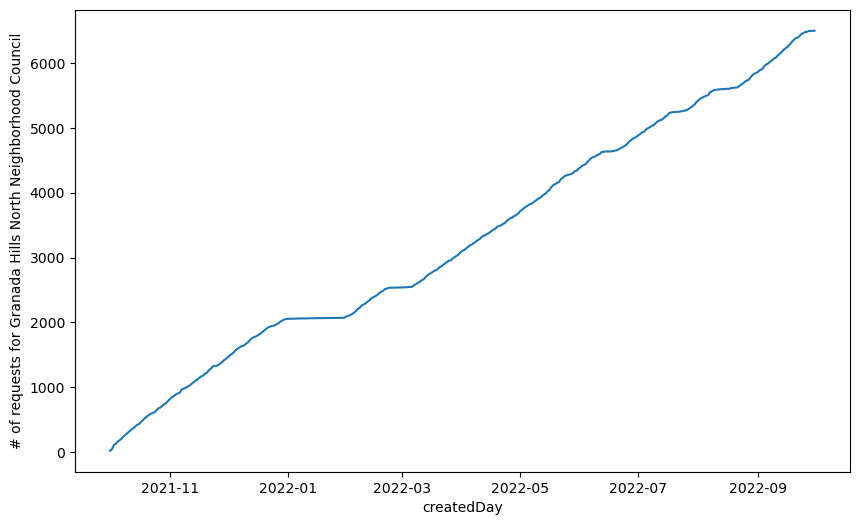

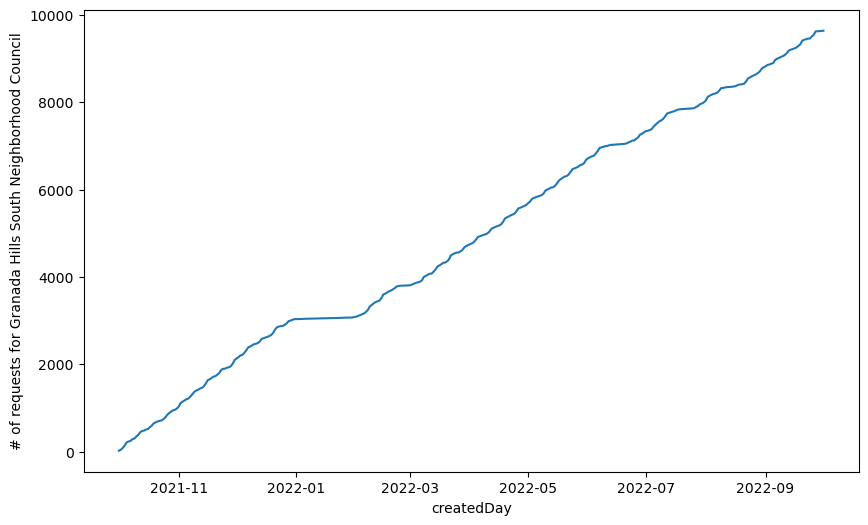

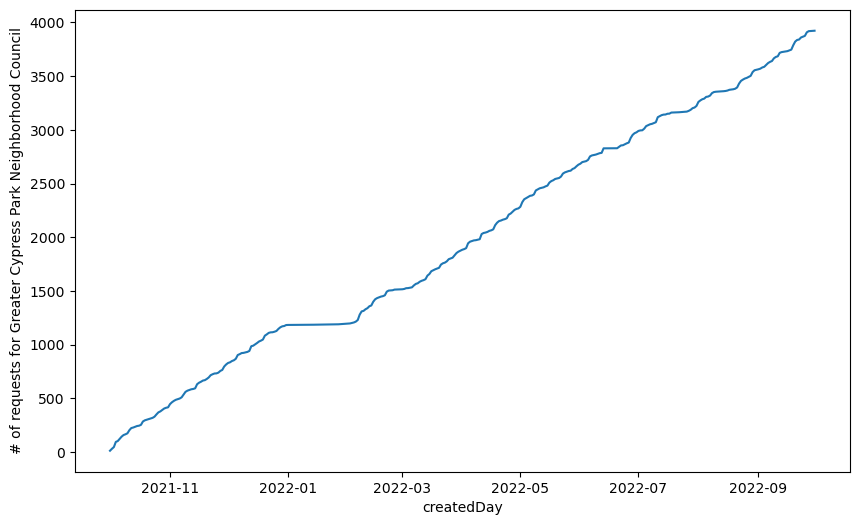

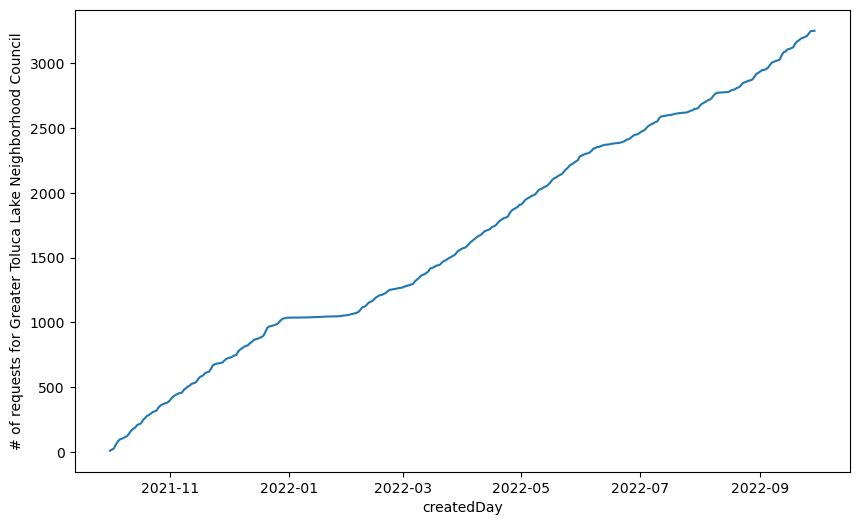

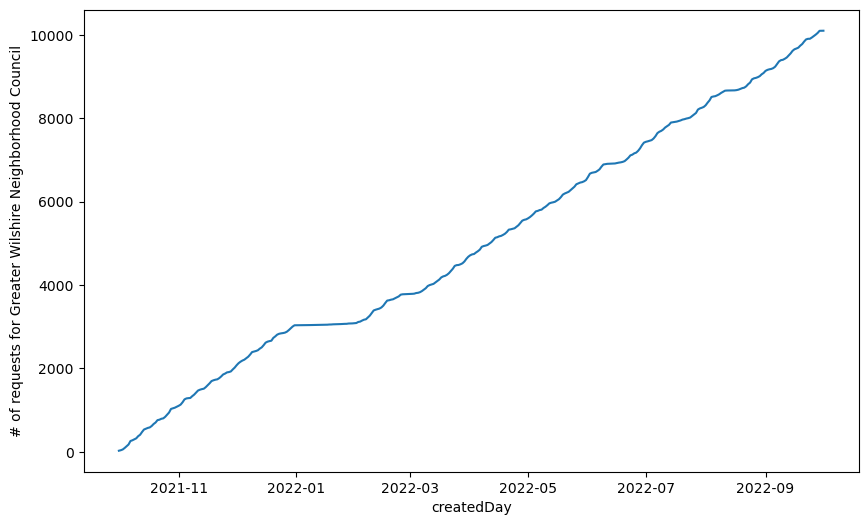

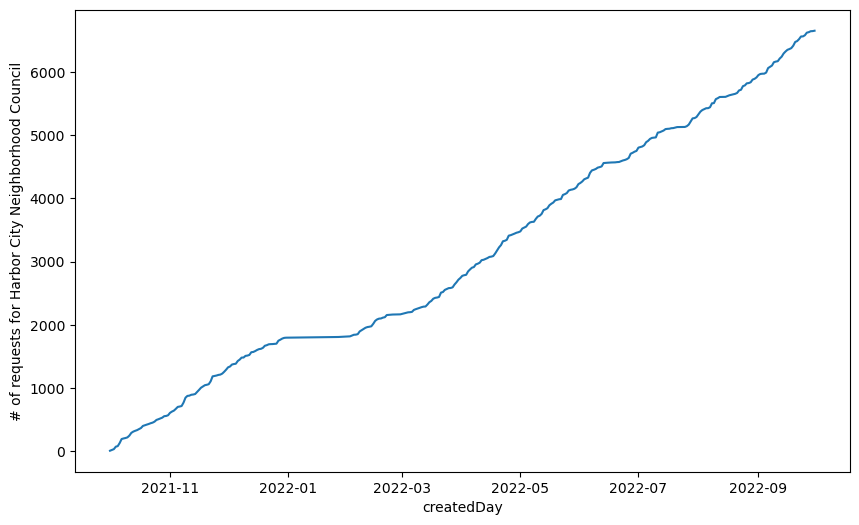

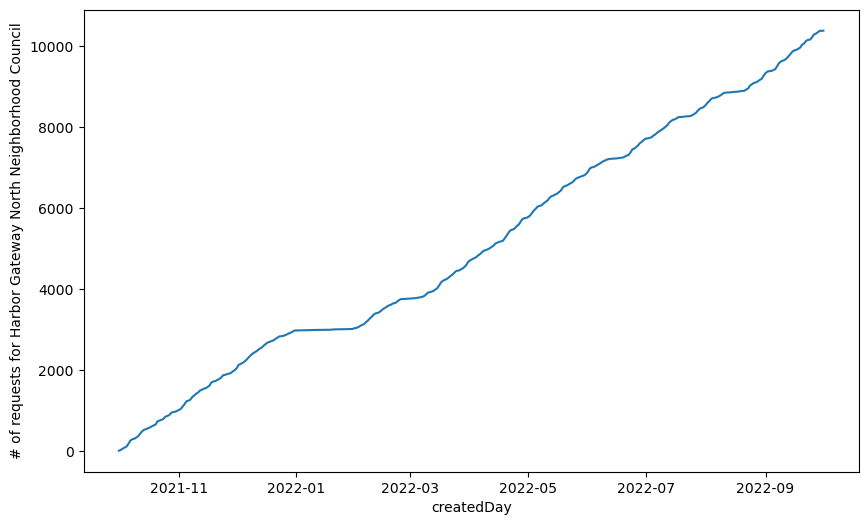

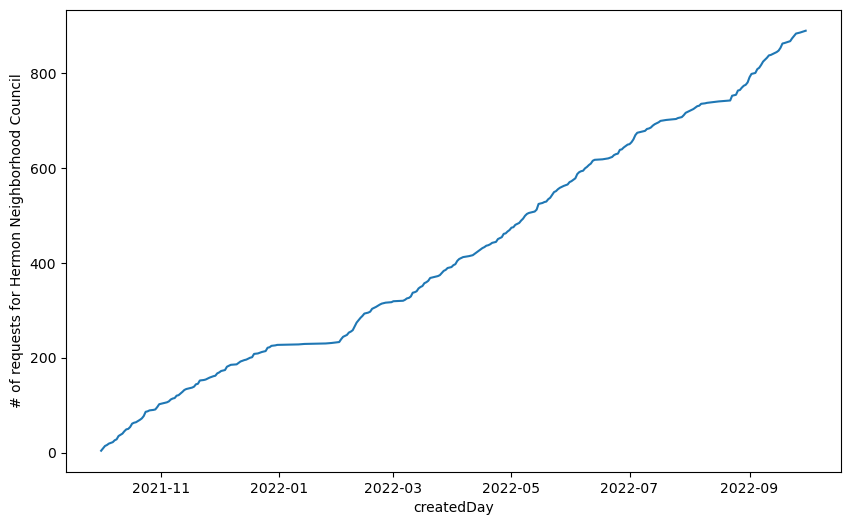

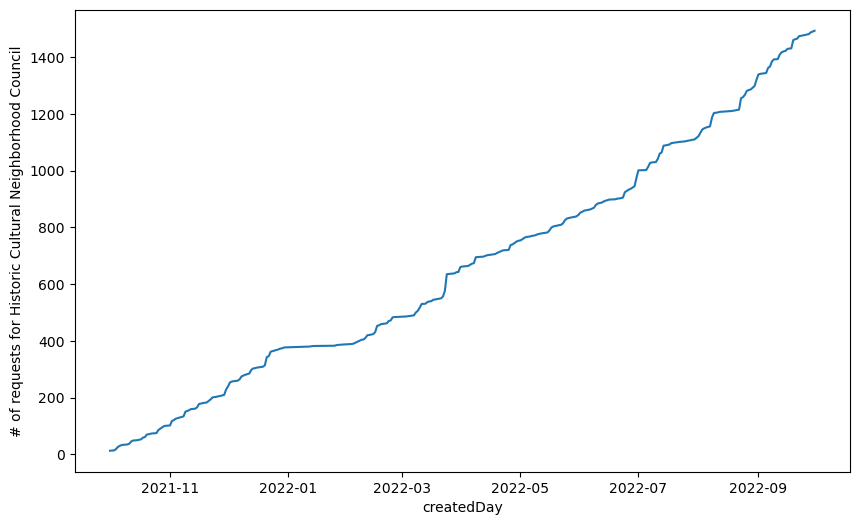

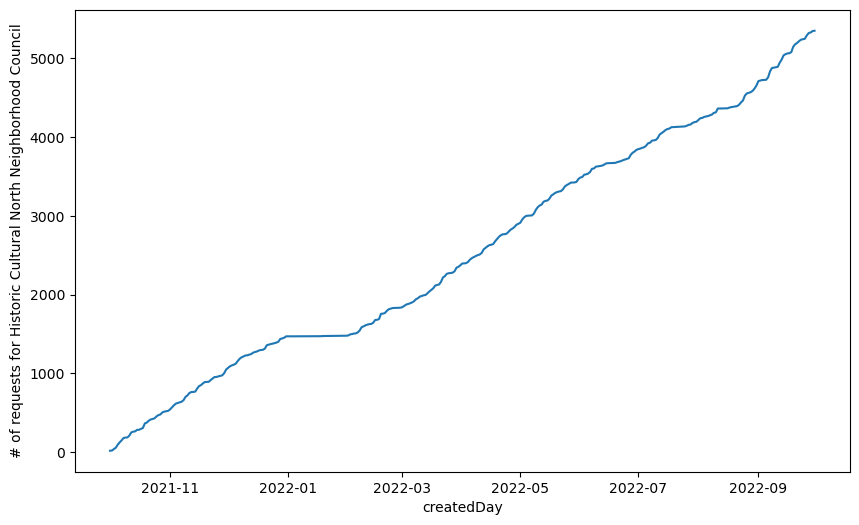

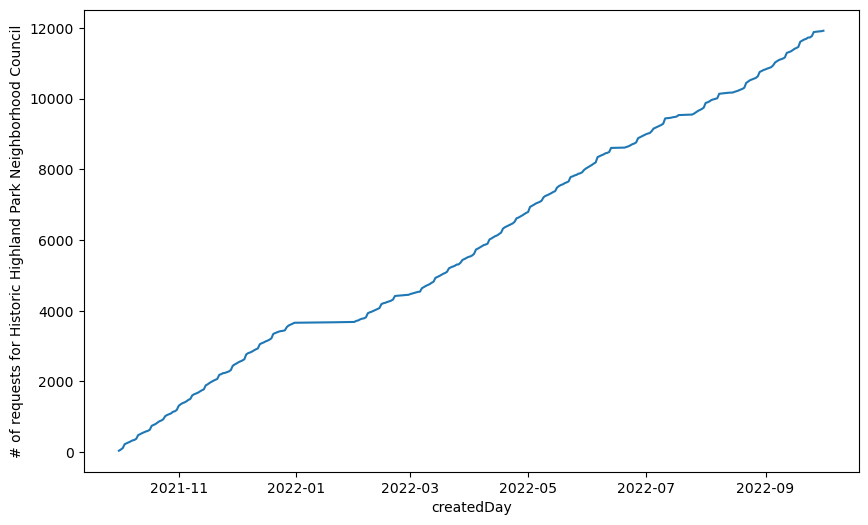

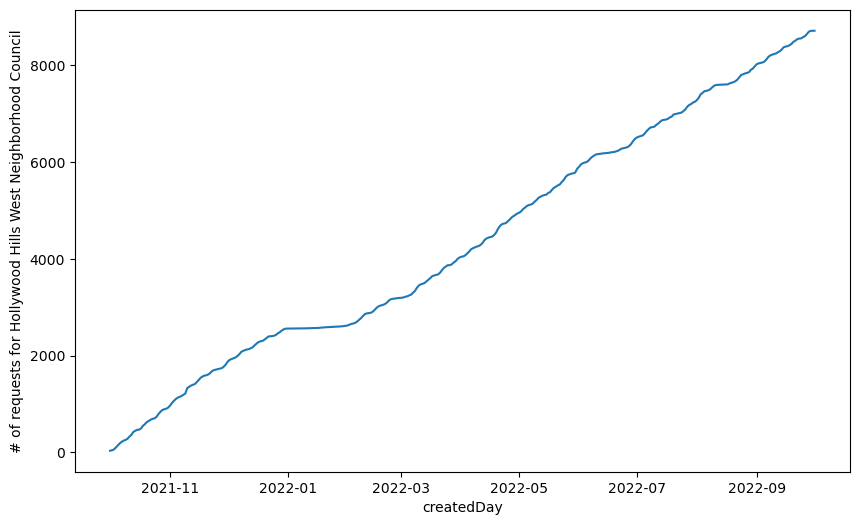

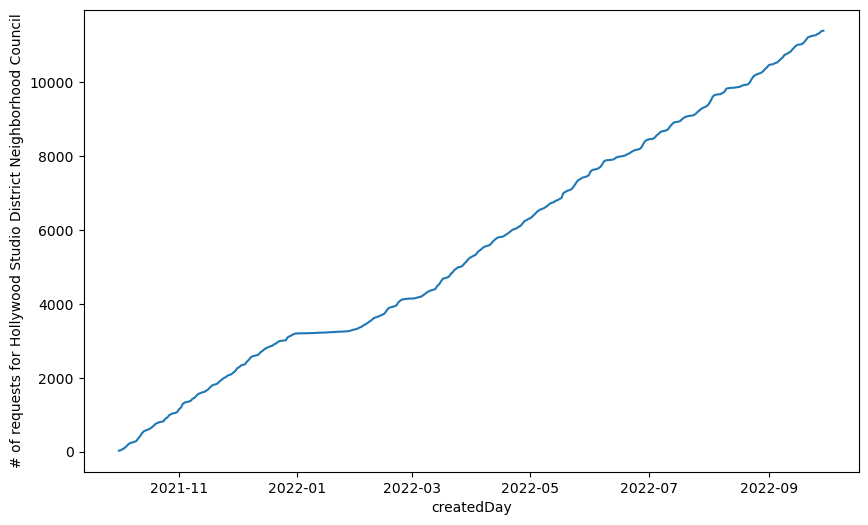

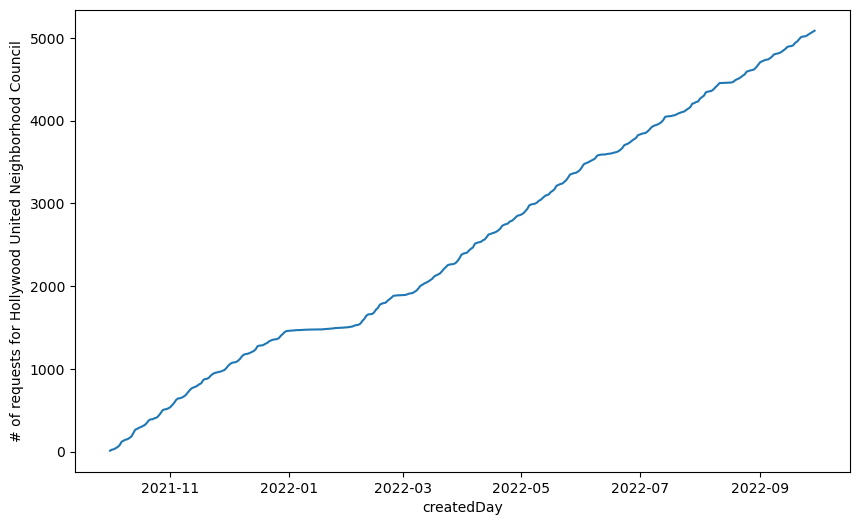

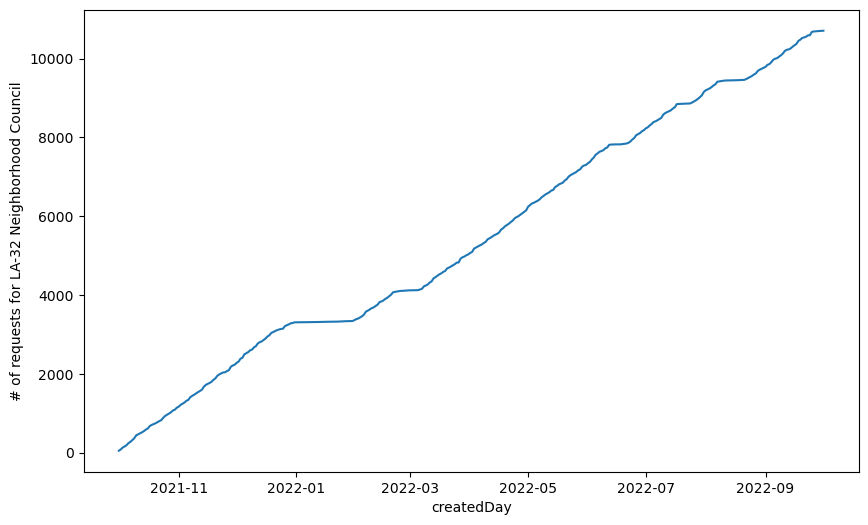

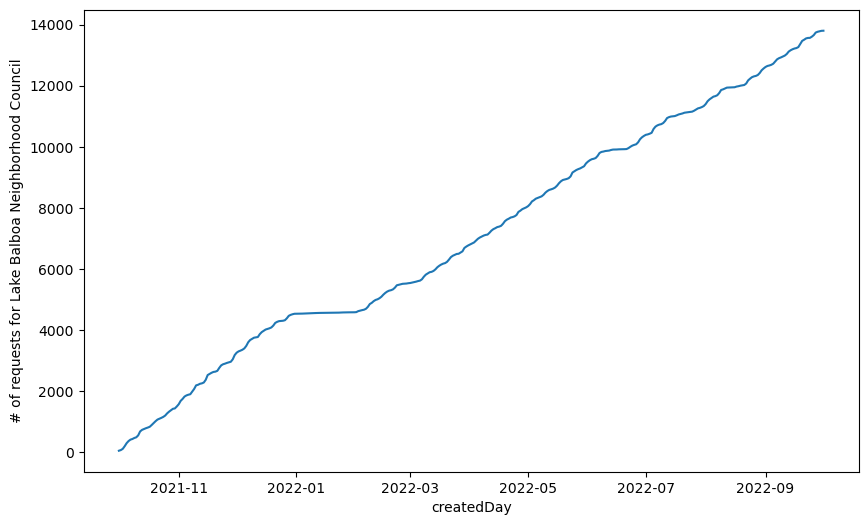

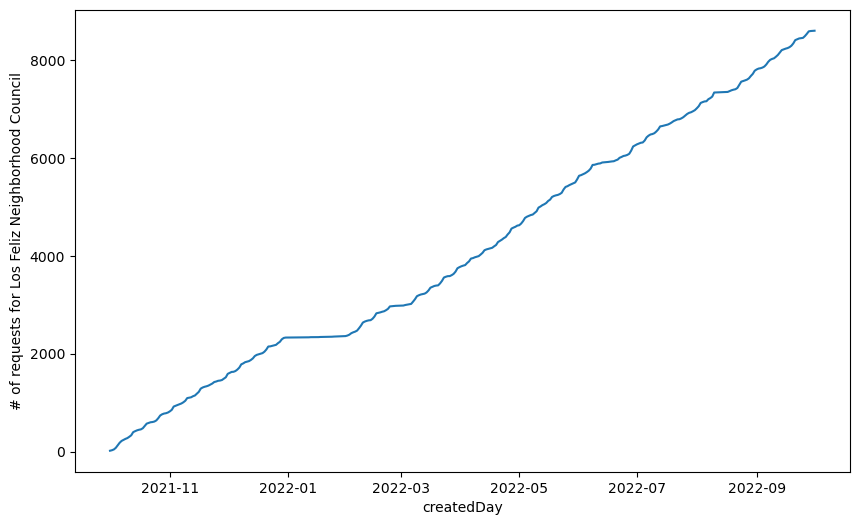

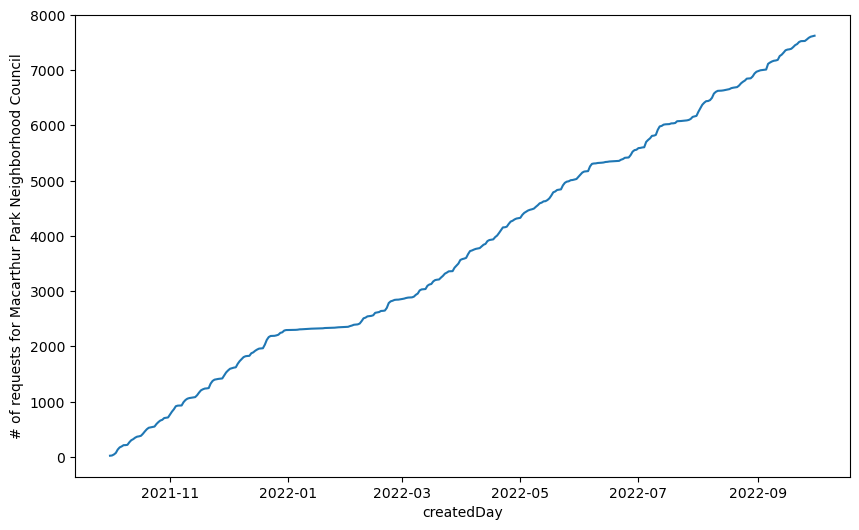

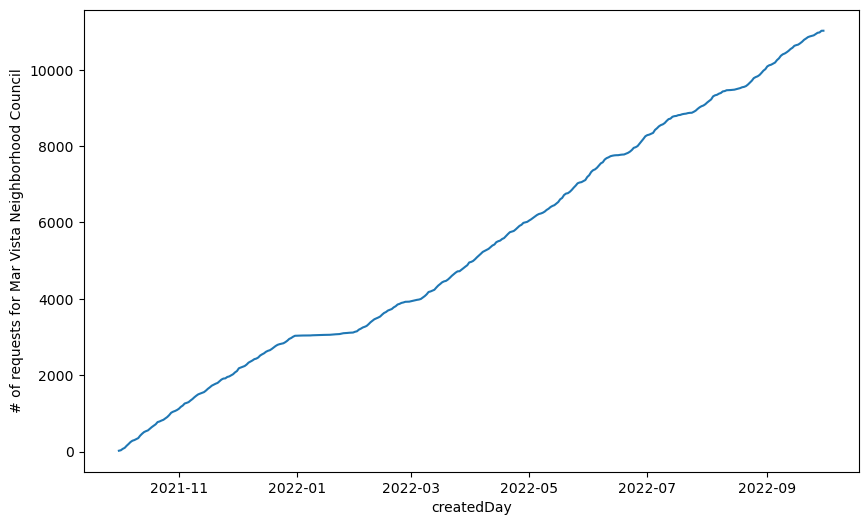

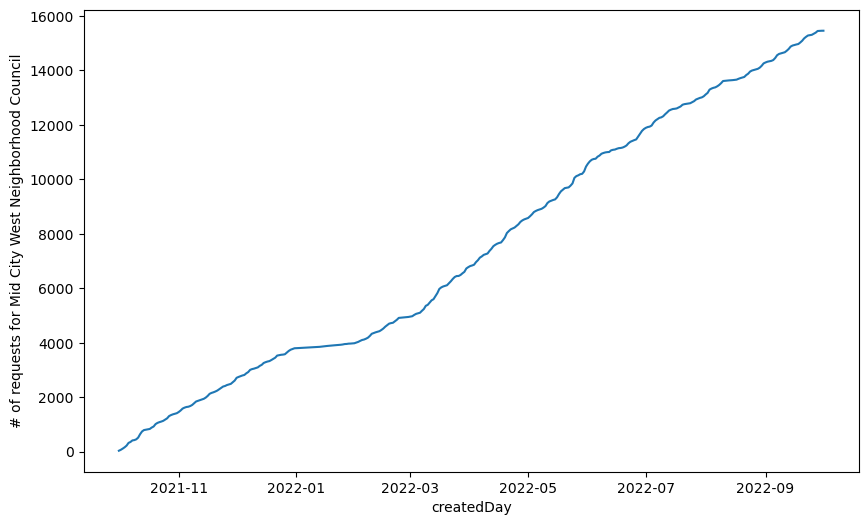

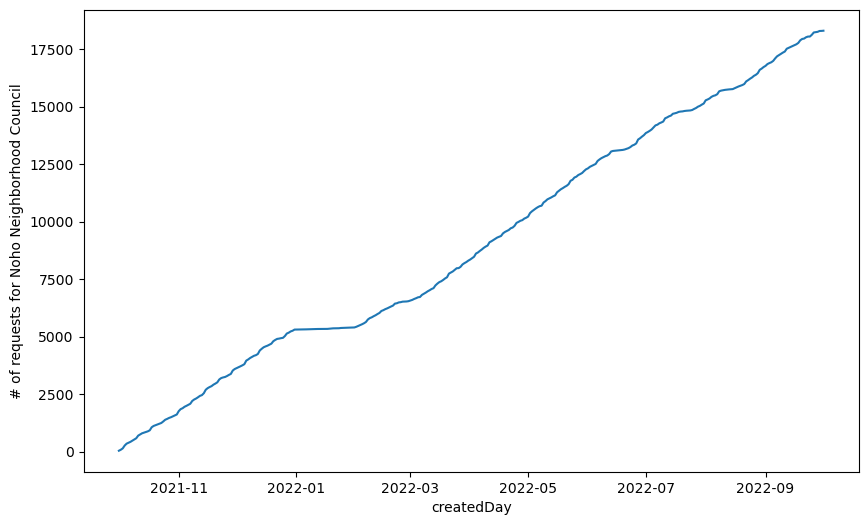

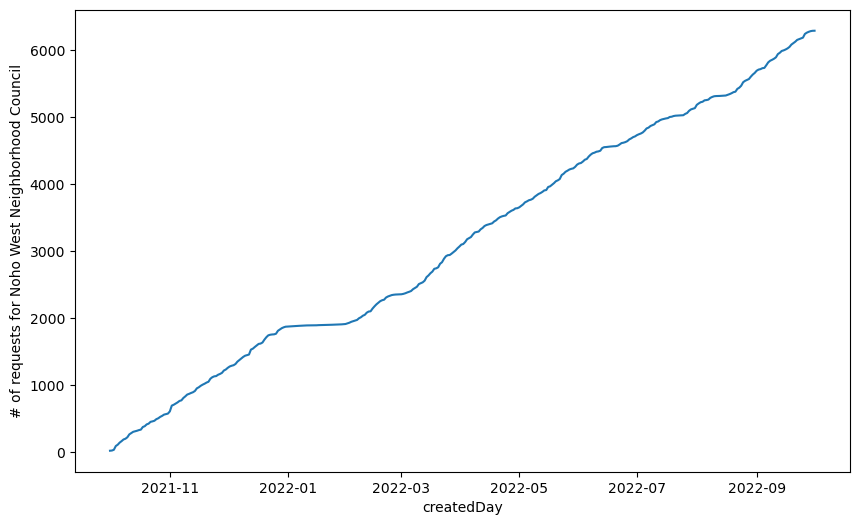

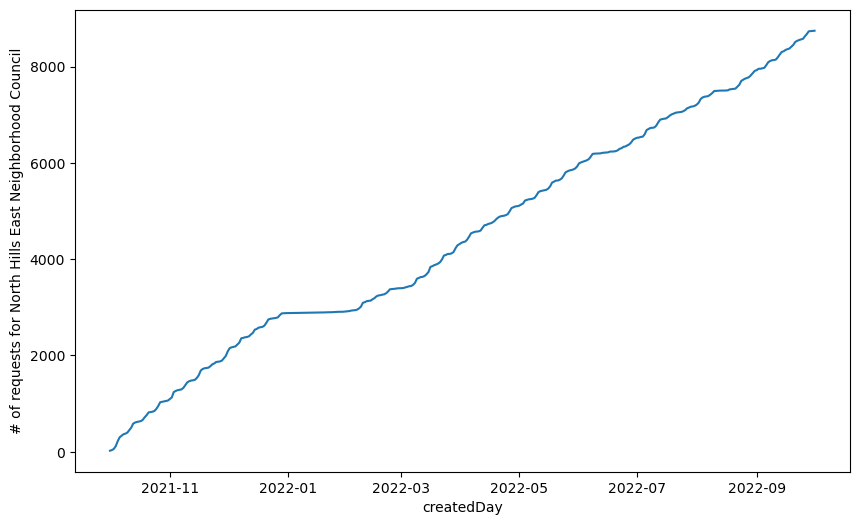

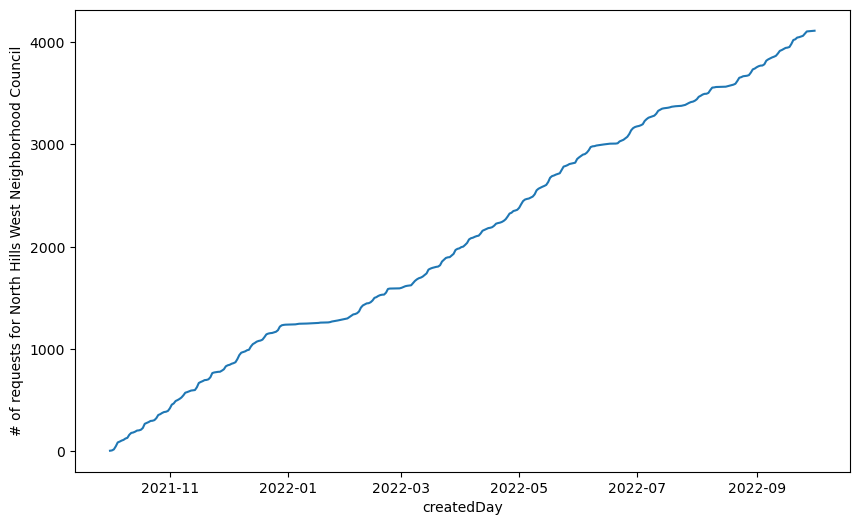

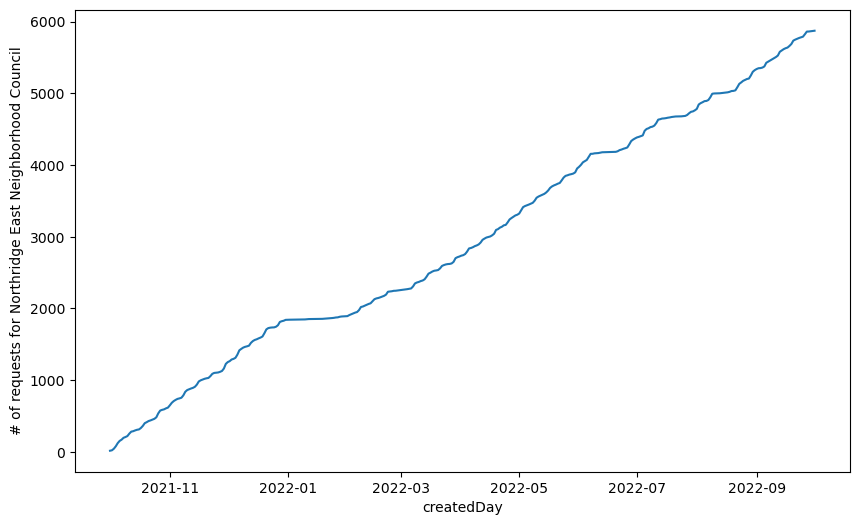

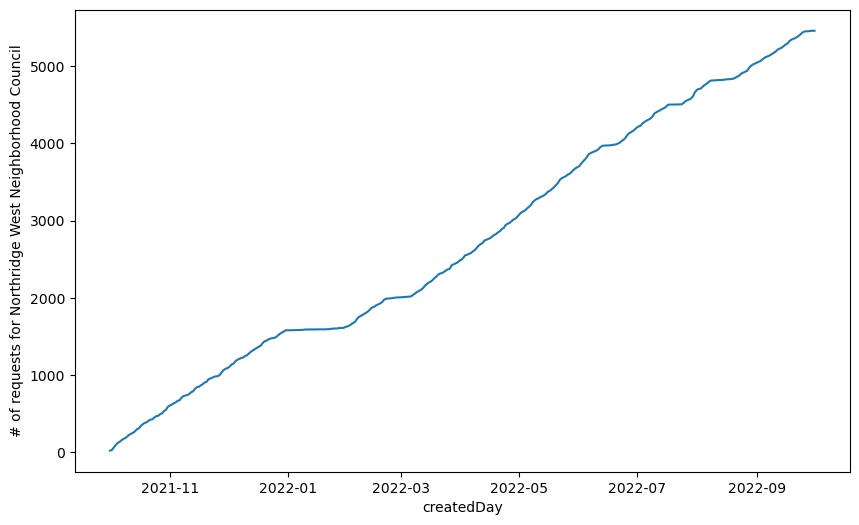

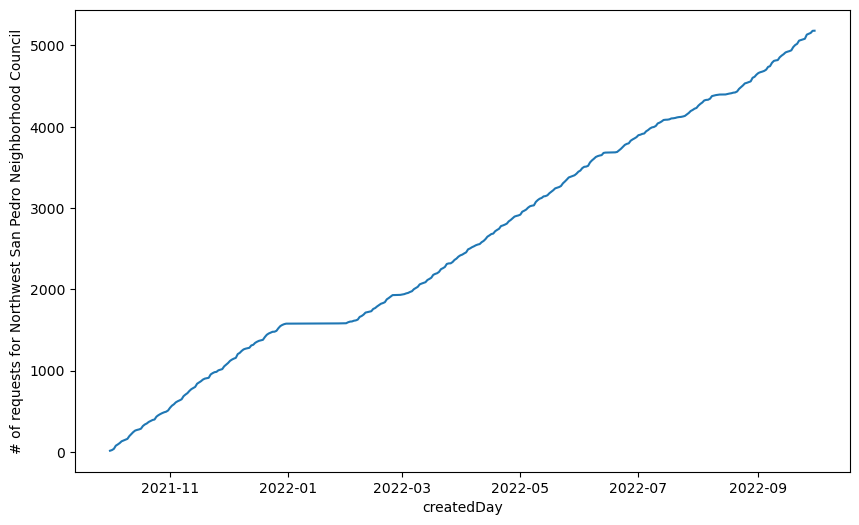

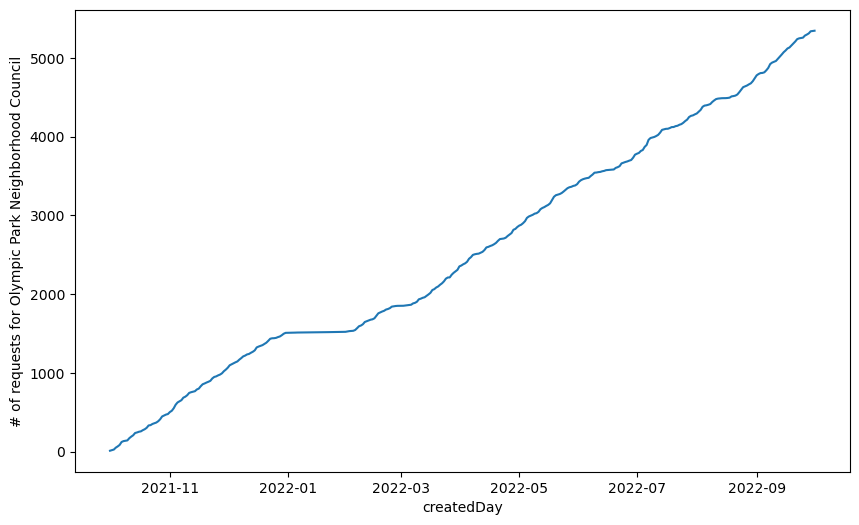

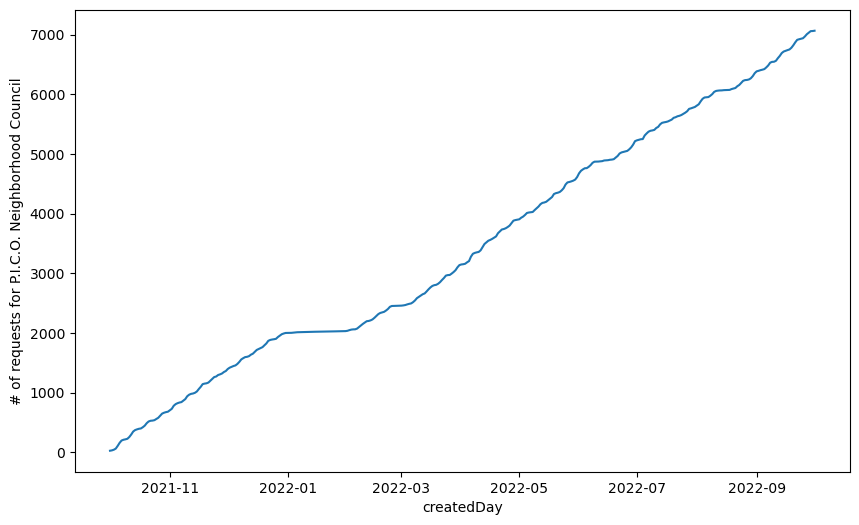

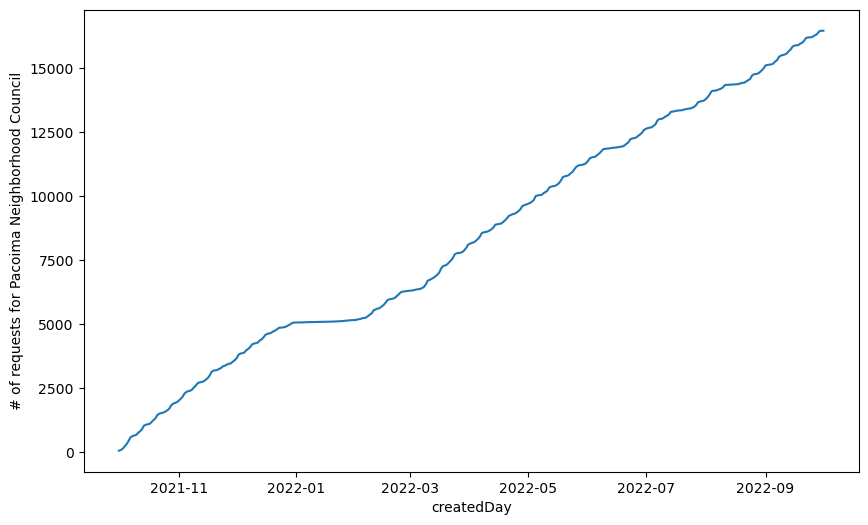

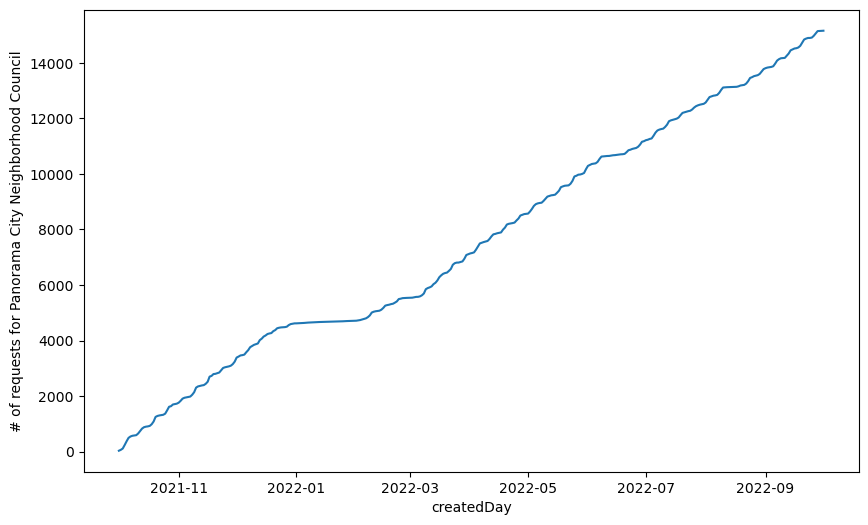

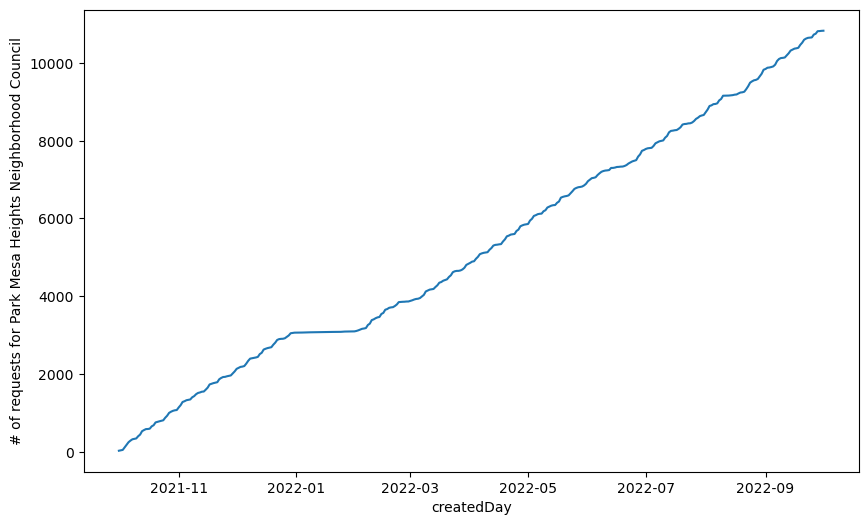

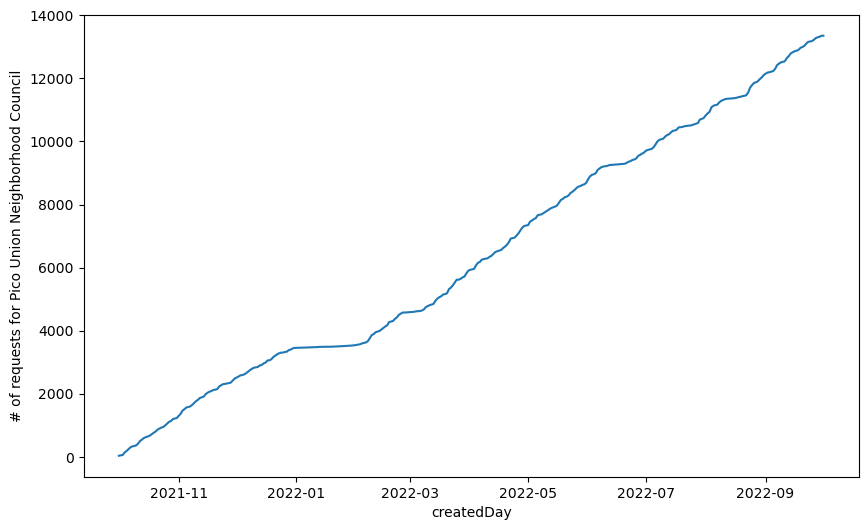

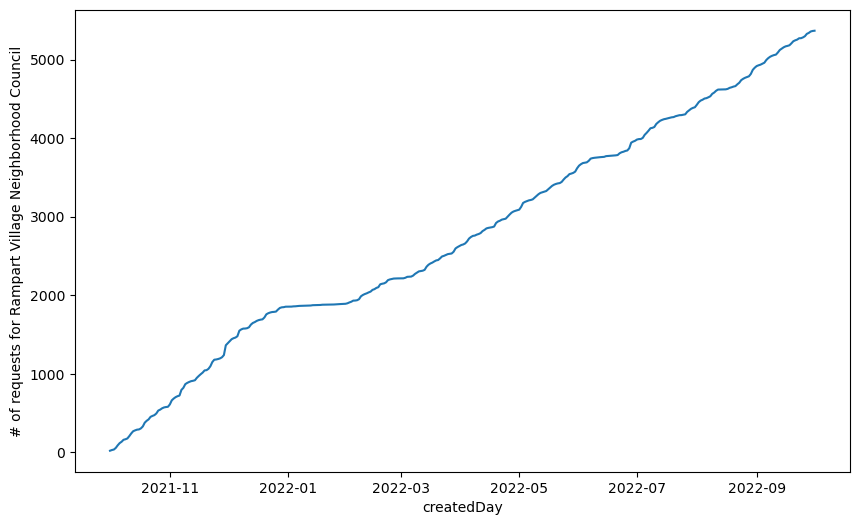

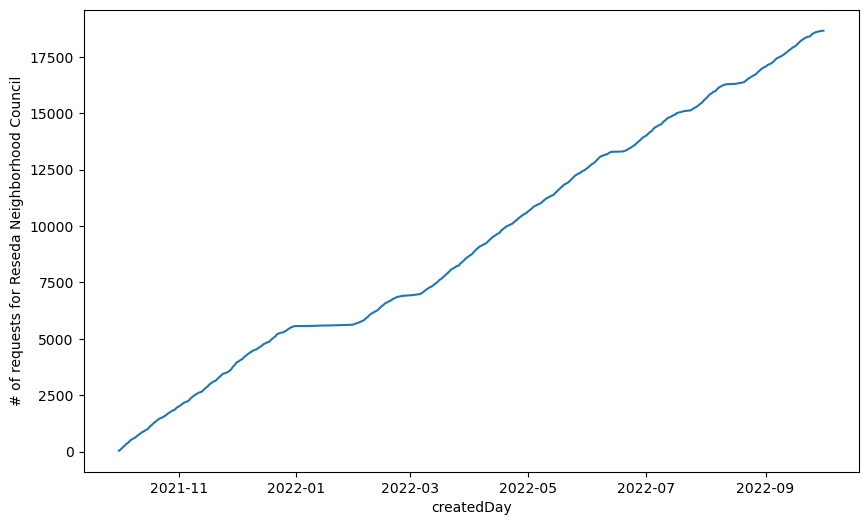

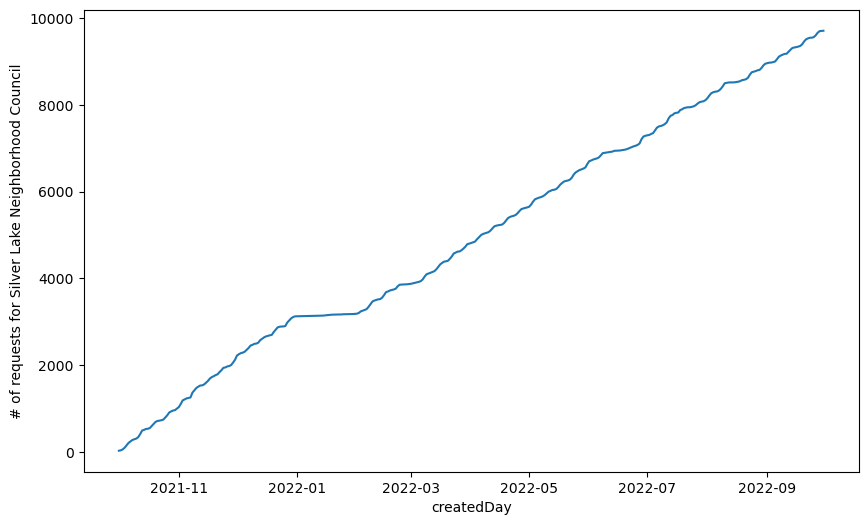

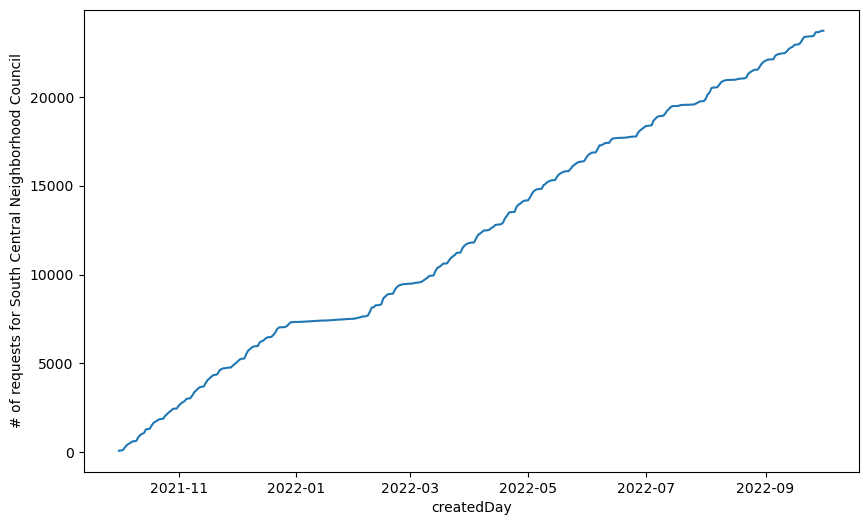

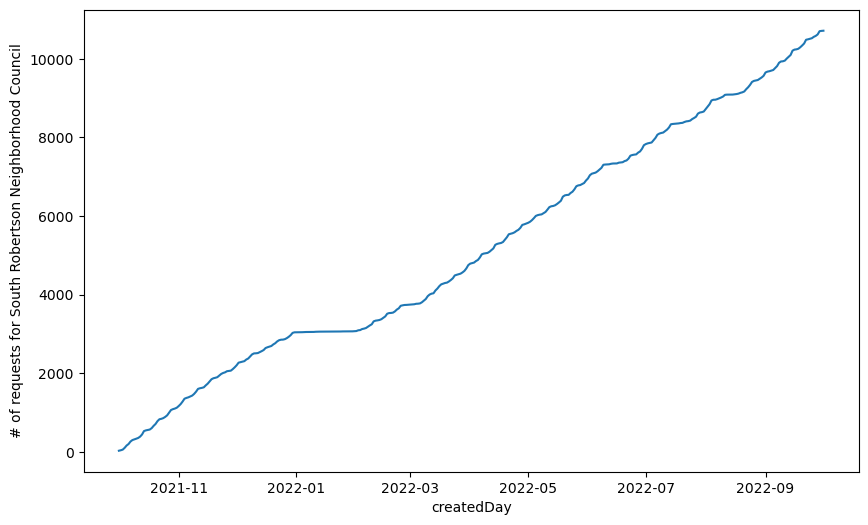

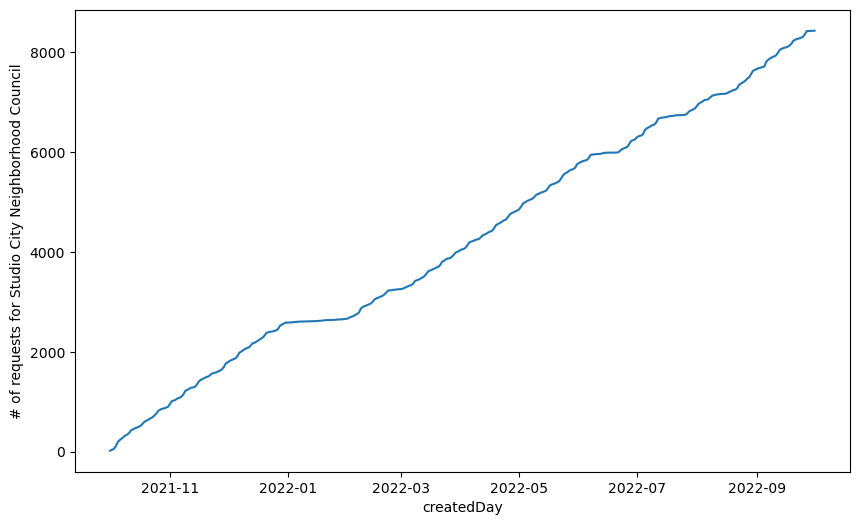

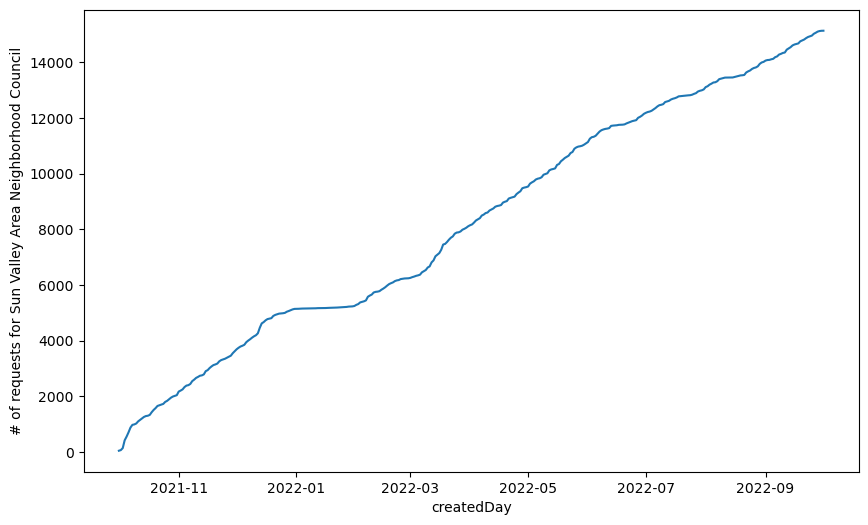

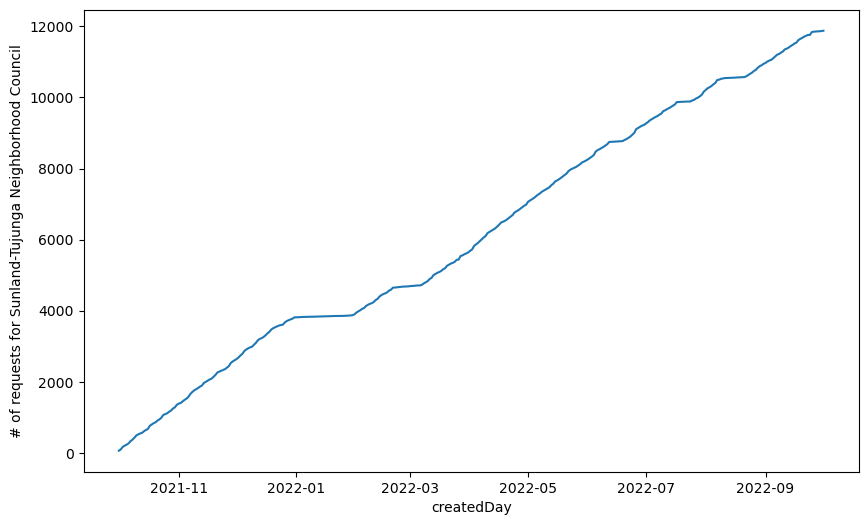

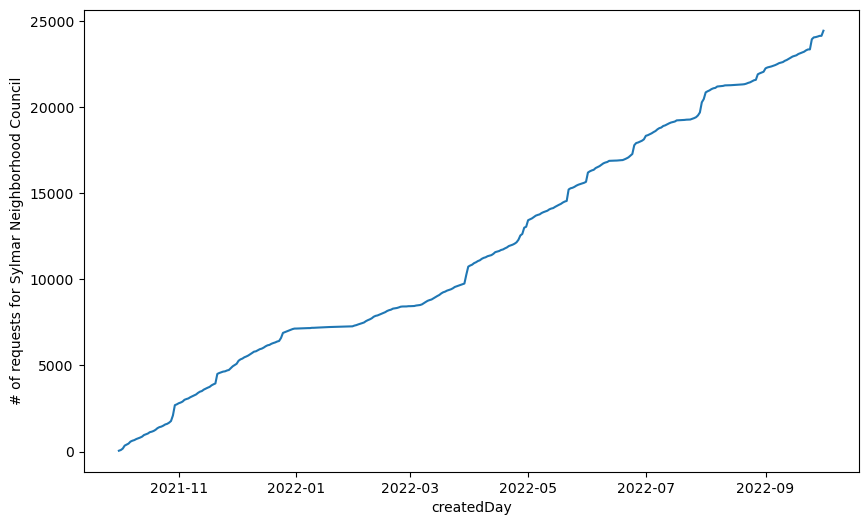

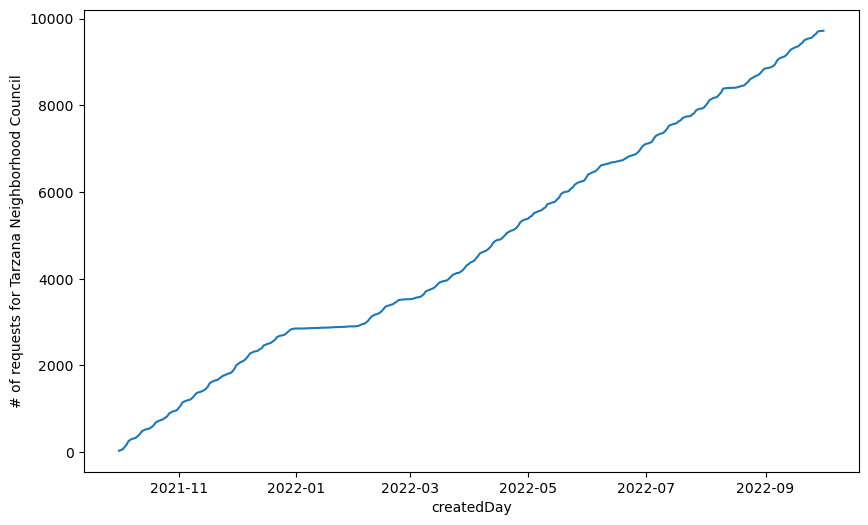

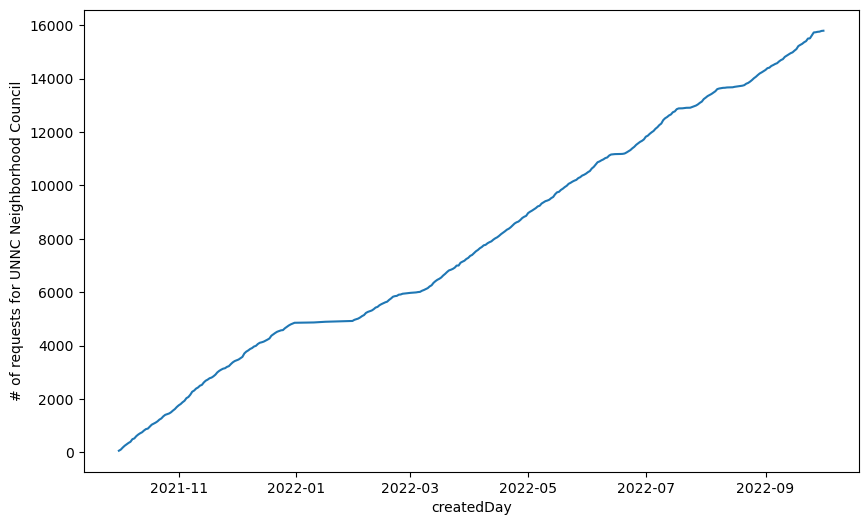

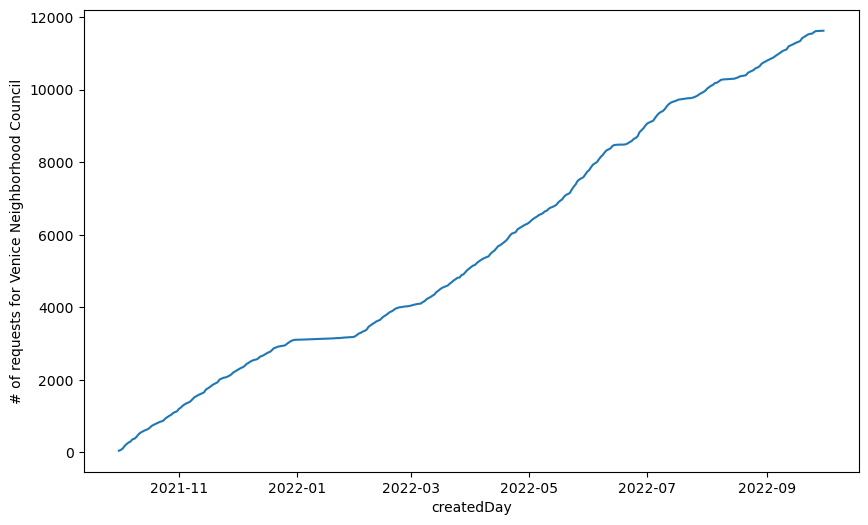

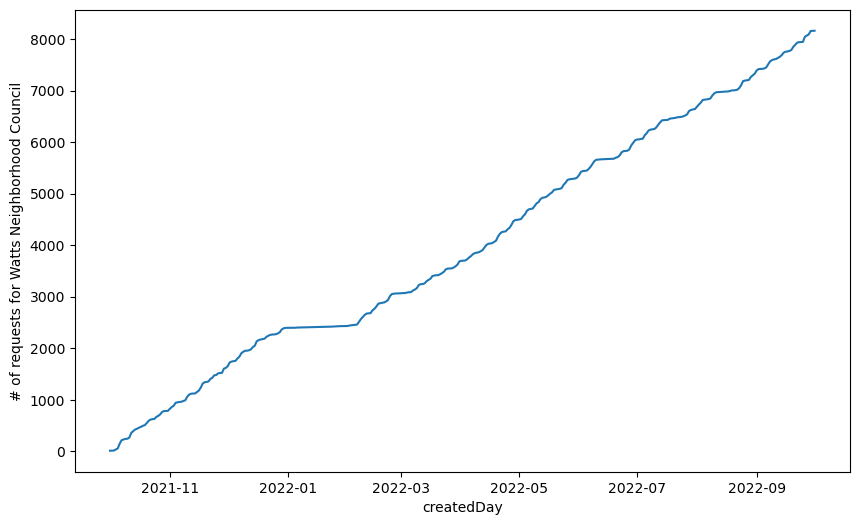

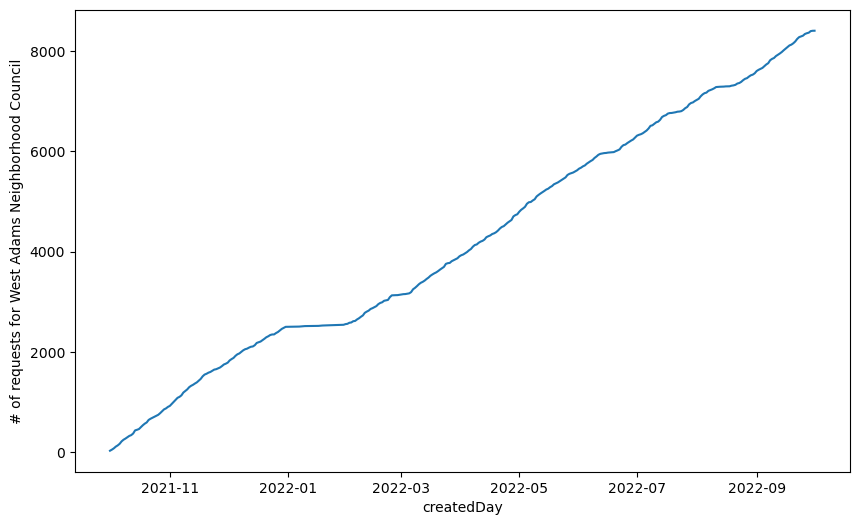

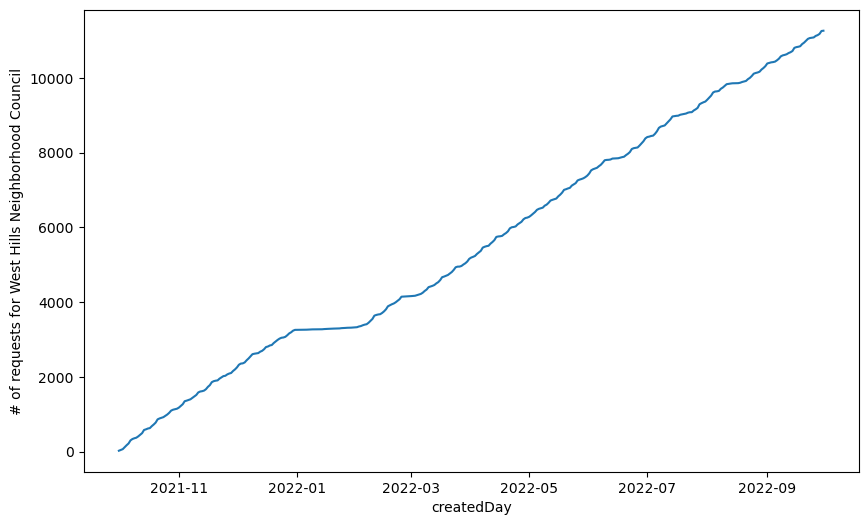

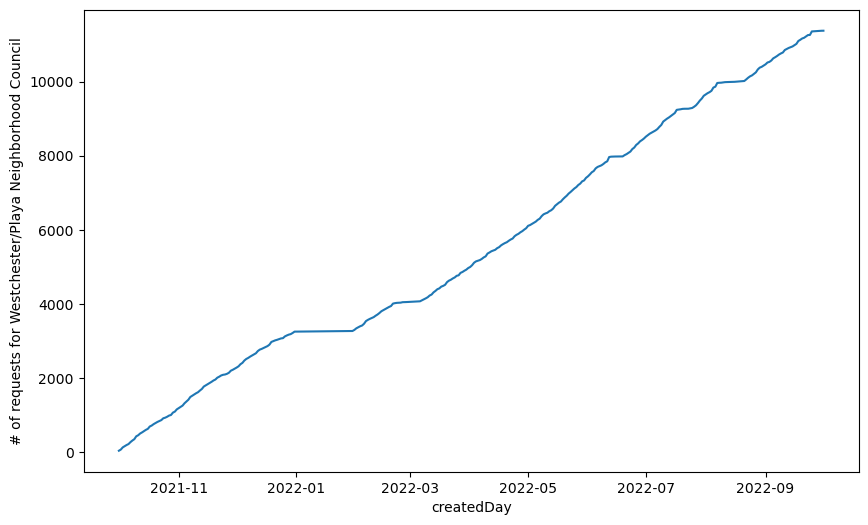

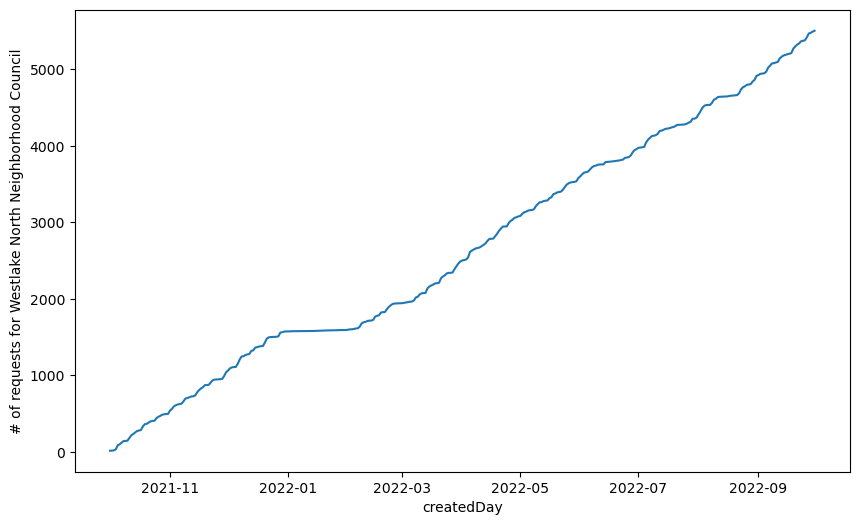

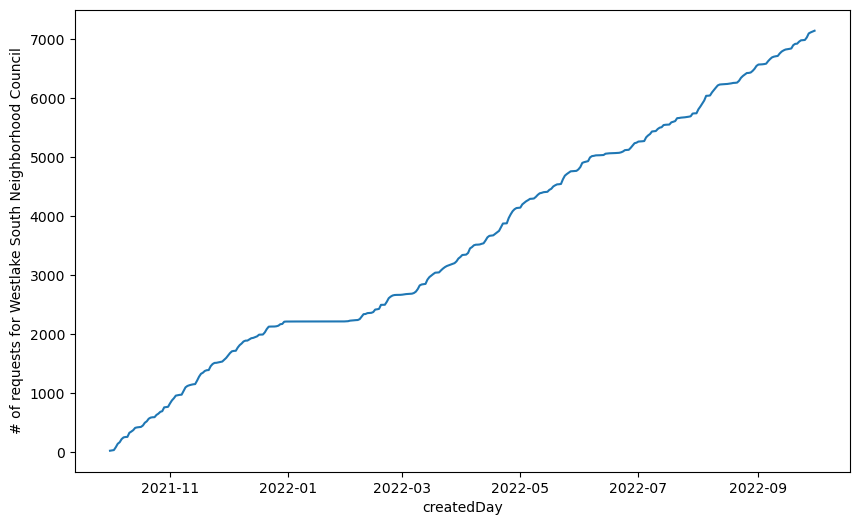

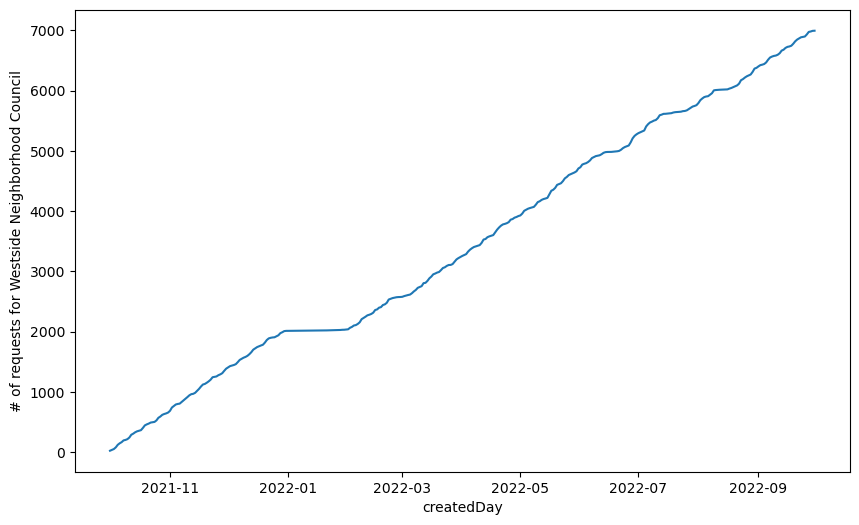

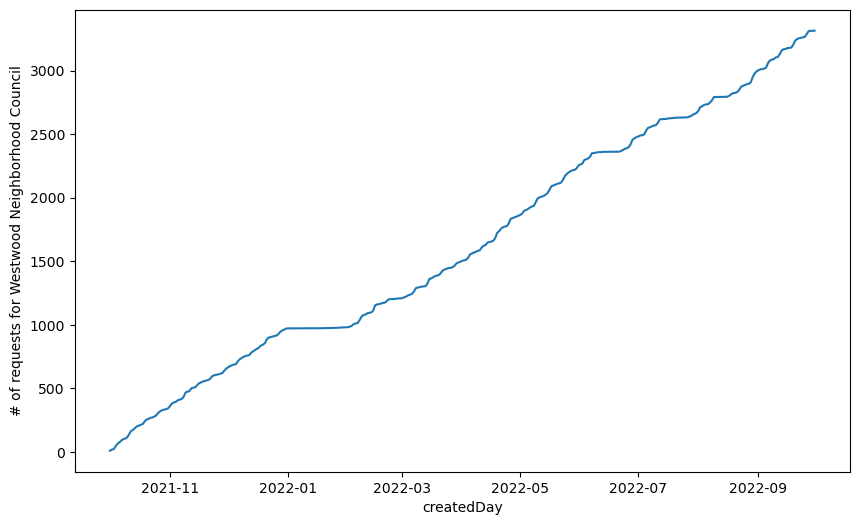

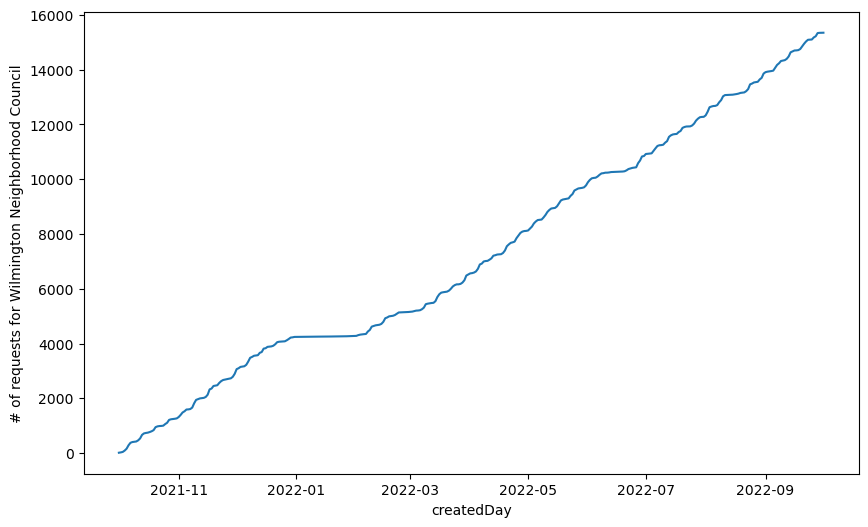

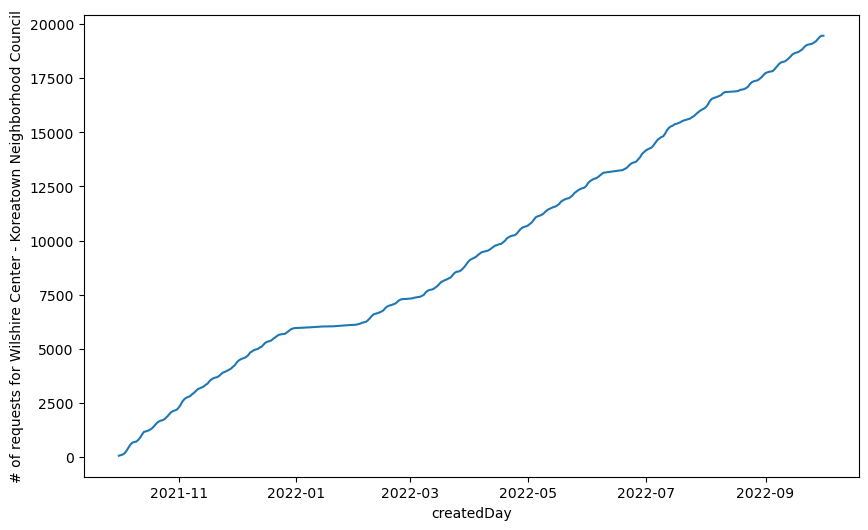

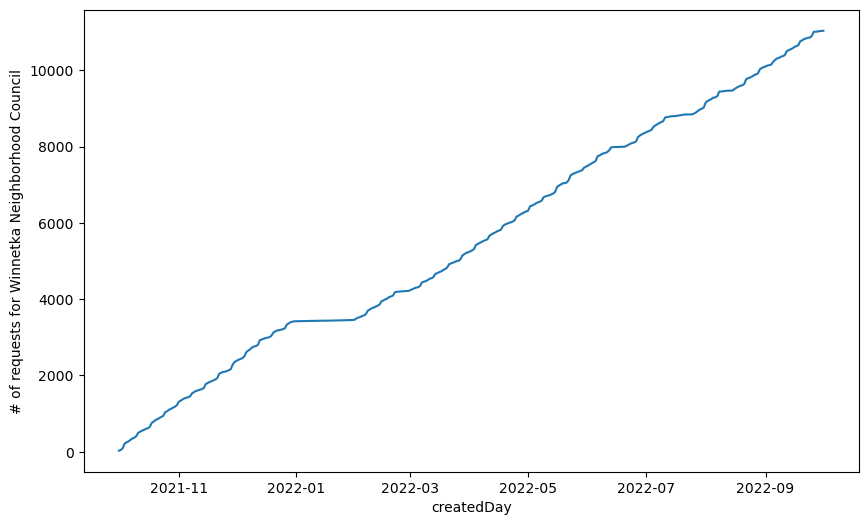

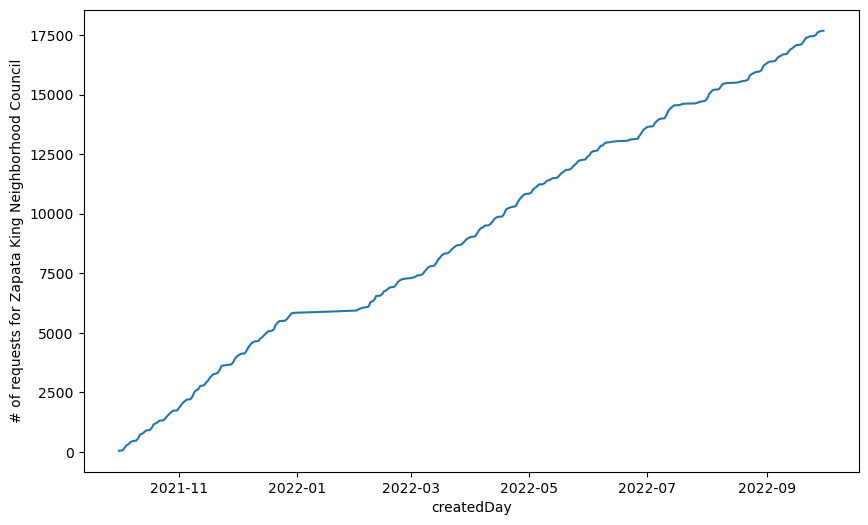

In [47]:
# by NC
for nc in df_nc_ct['councilName'].unique():
    plt.figure(figsize = (10,6))
    ts_plt = df_nc_ct[df_nc_ct['councilName'] == nc]
    ts_plt['nc_running_ct'].plot()
    plt.ylabel(f'# of requests for {nc} Neighborhood Council')
    plt.plot();

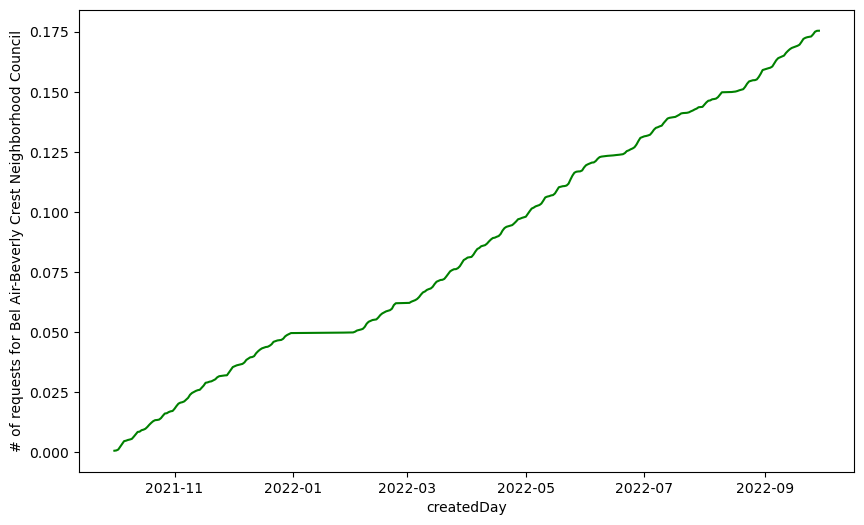

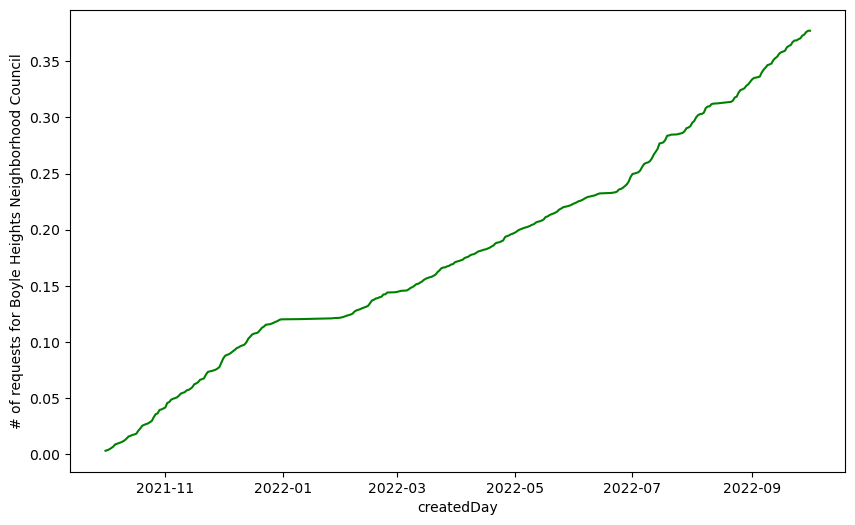

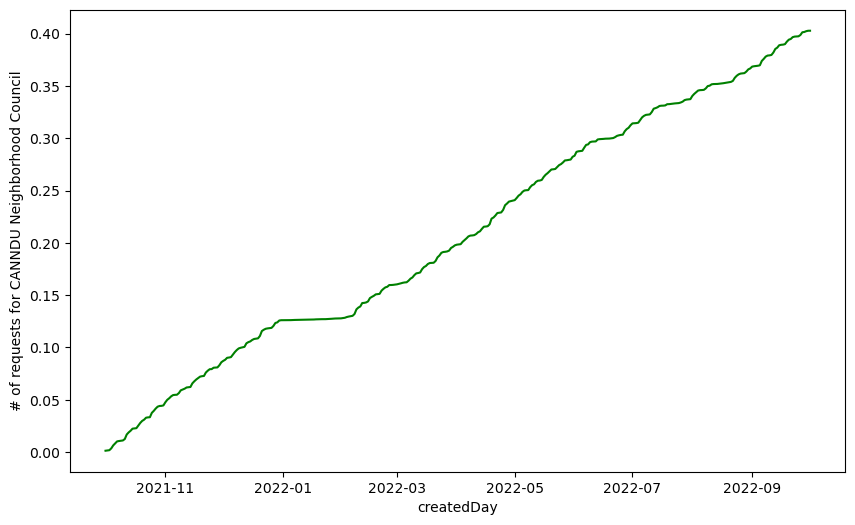

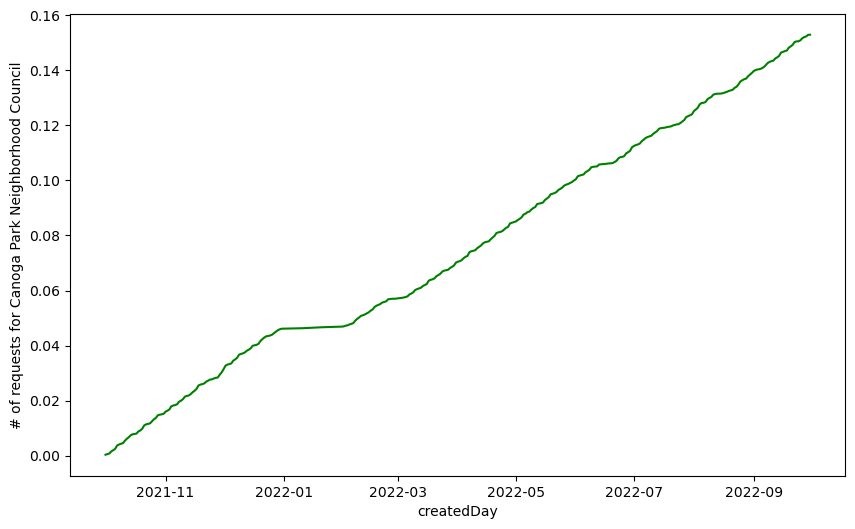

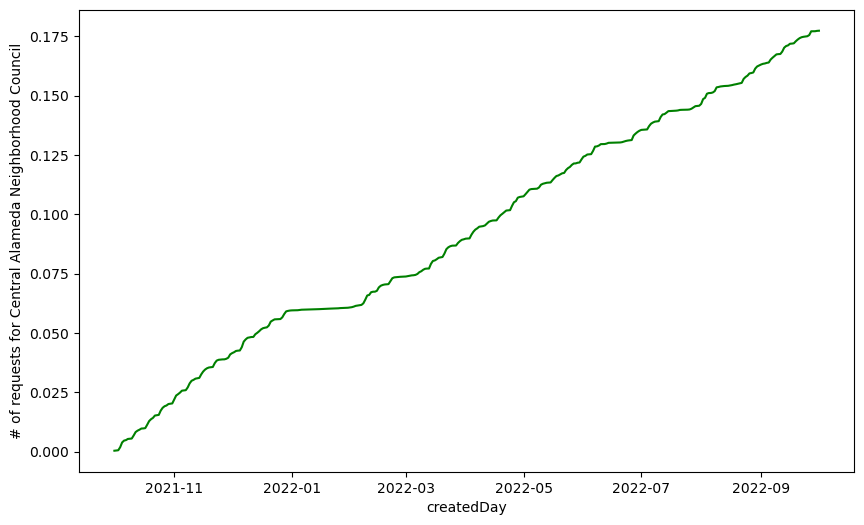

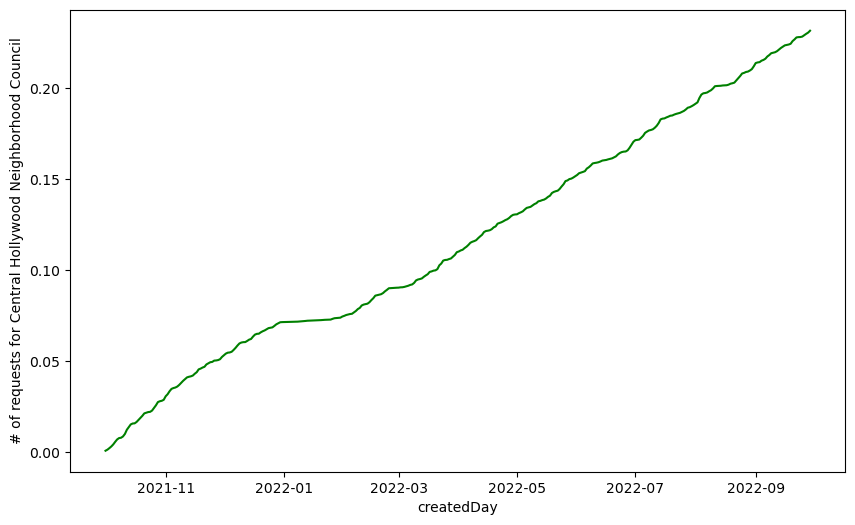

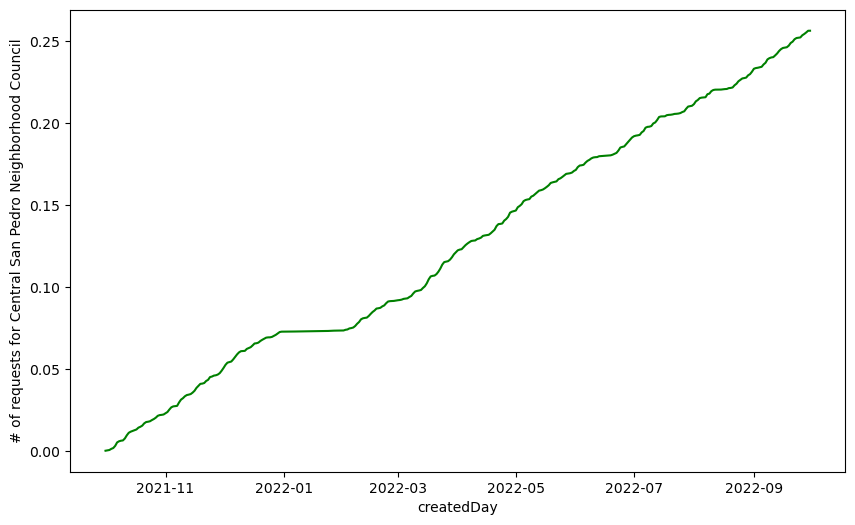

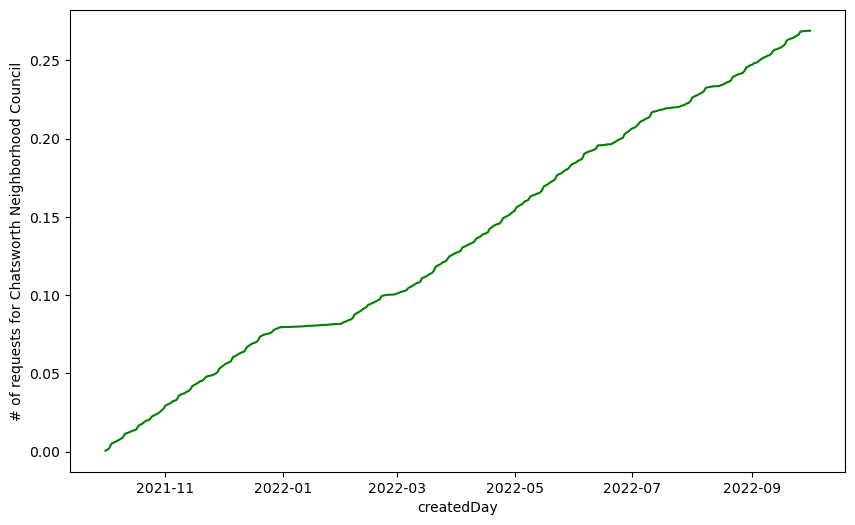

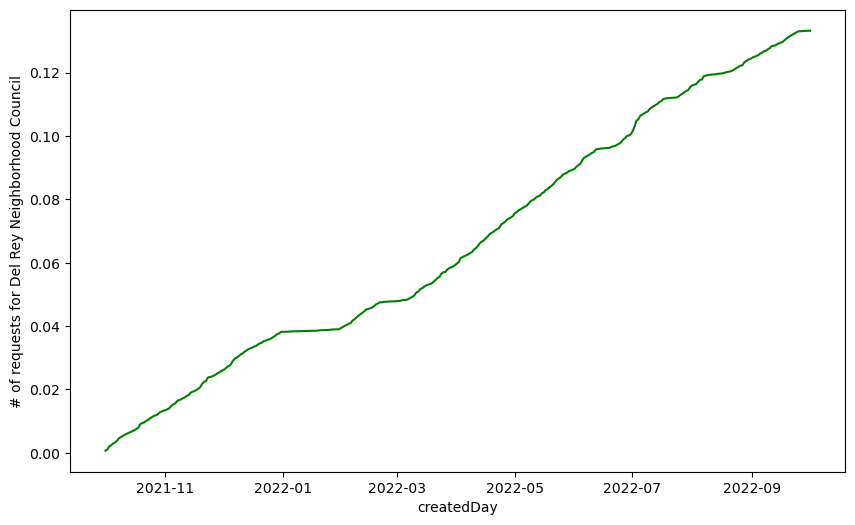

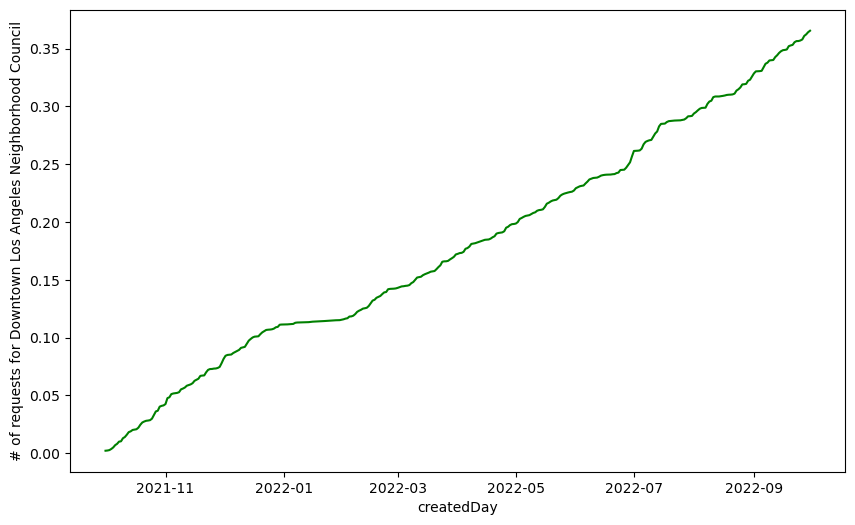

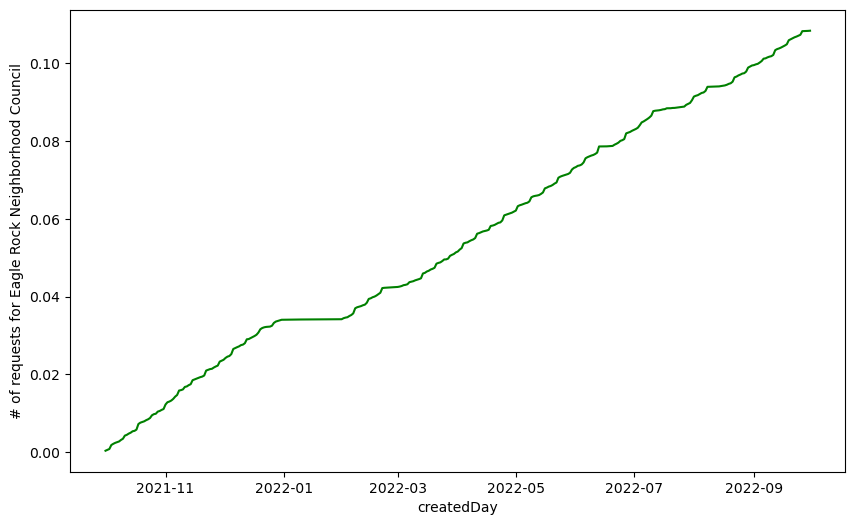

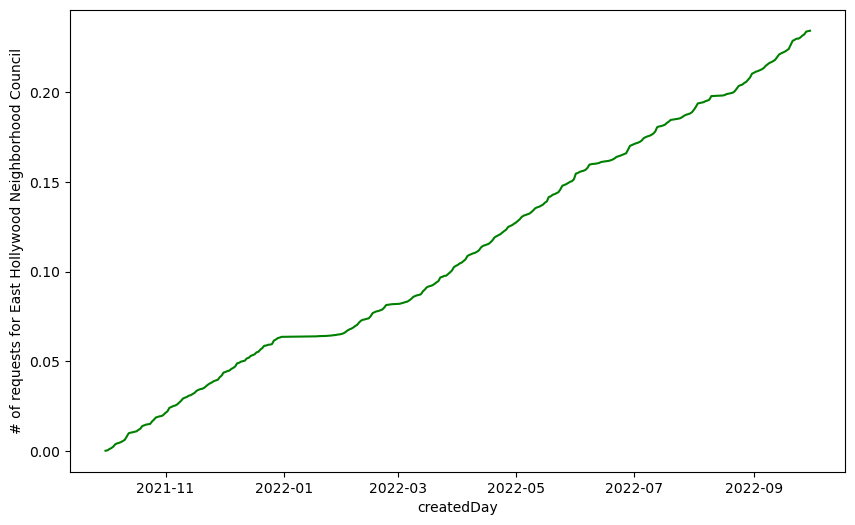

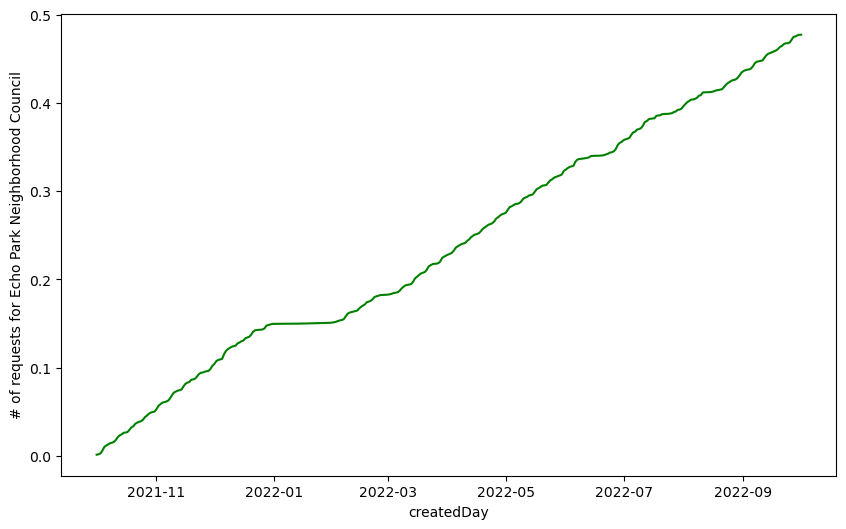

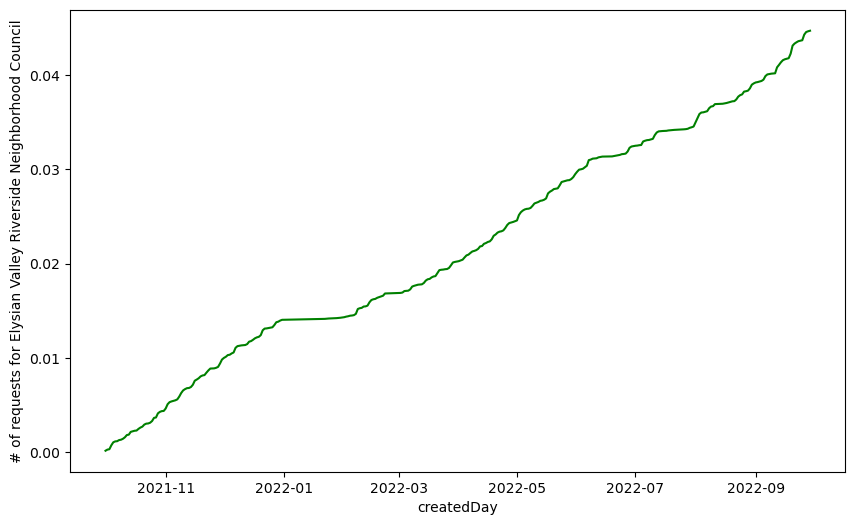

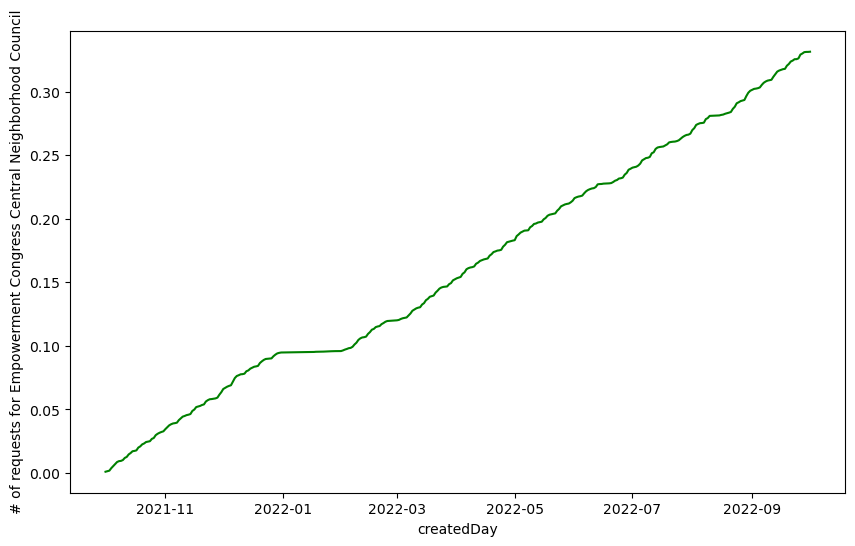

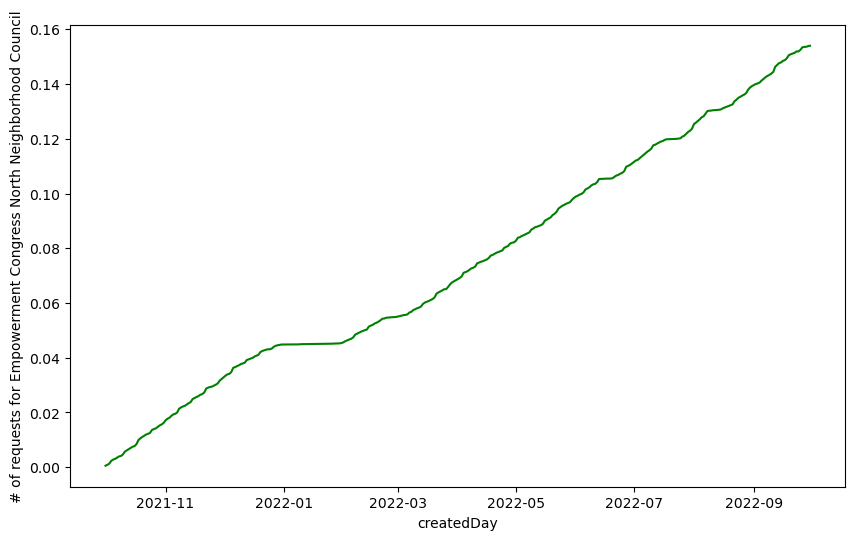

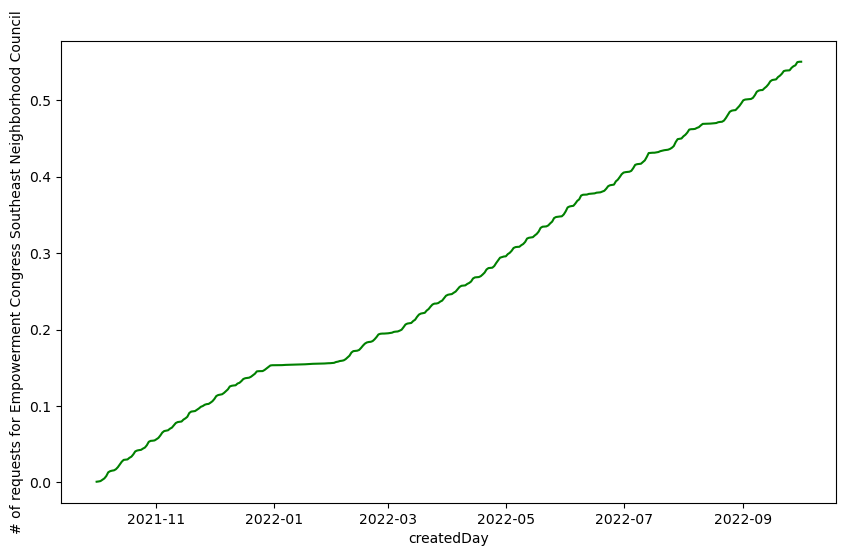

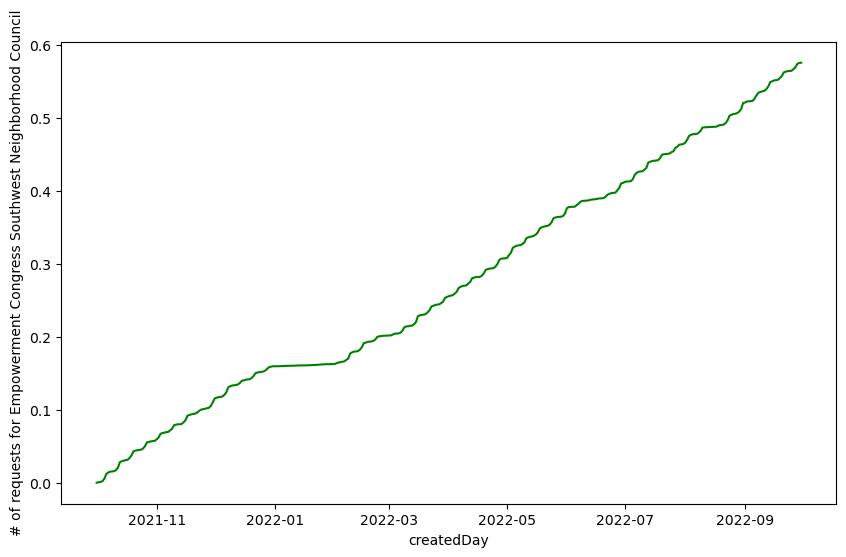

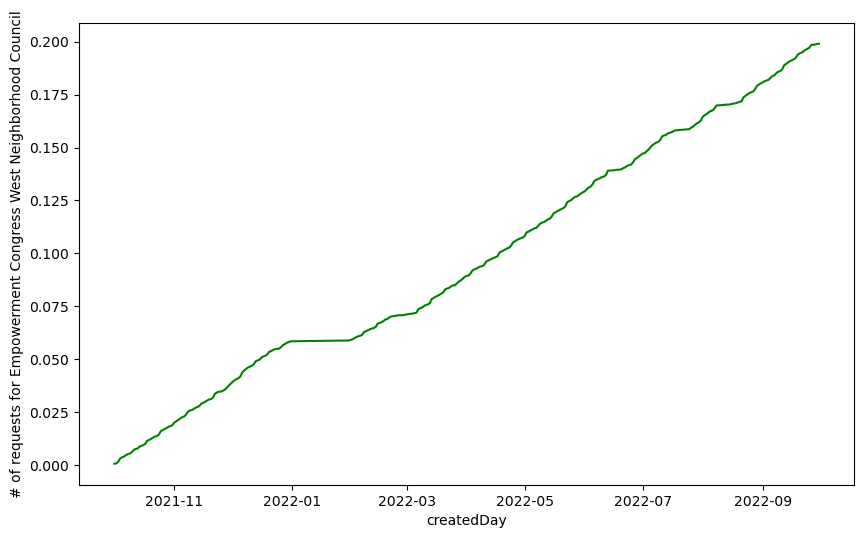

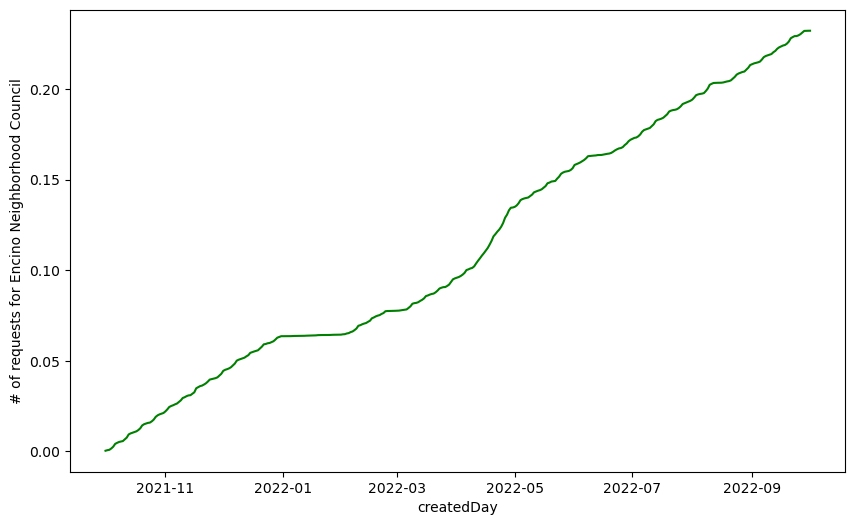

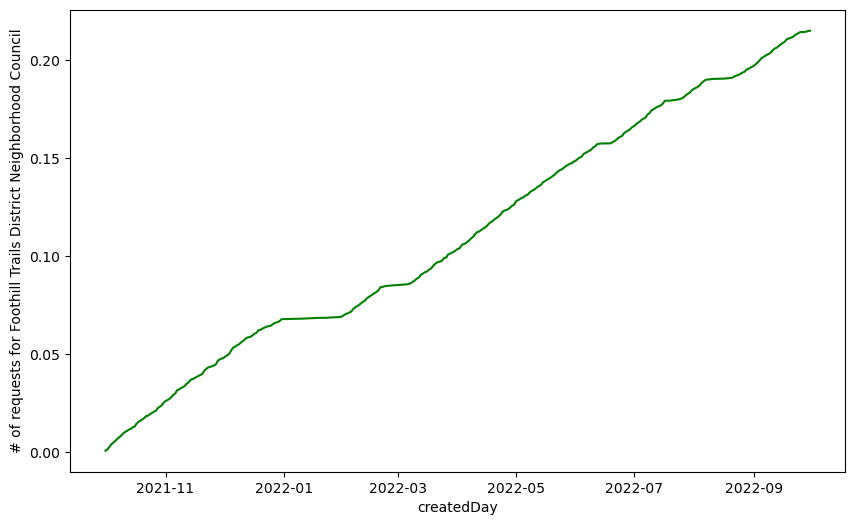

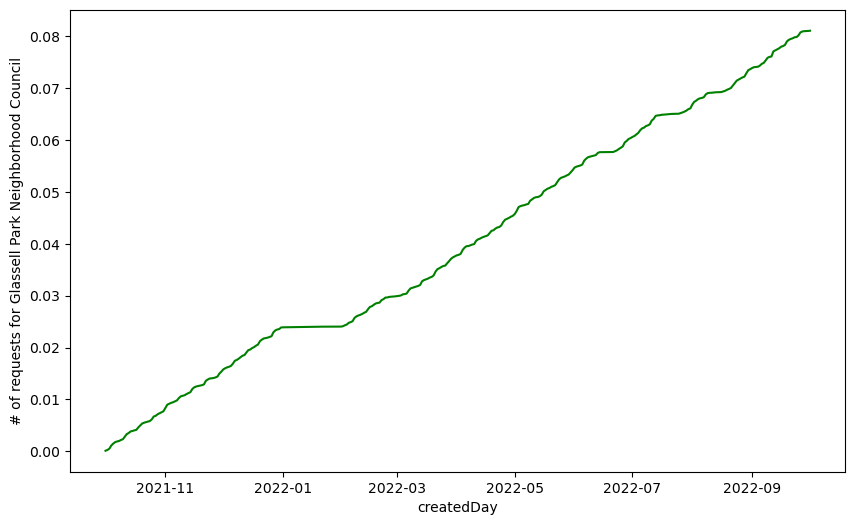

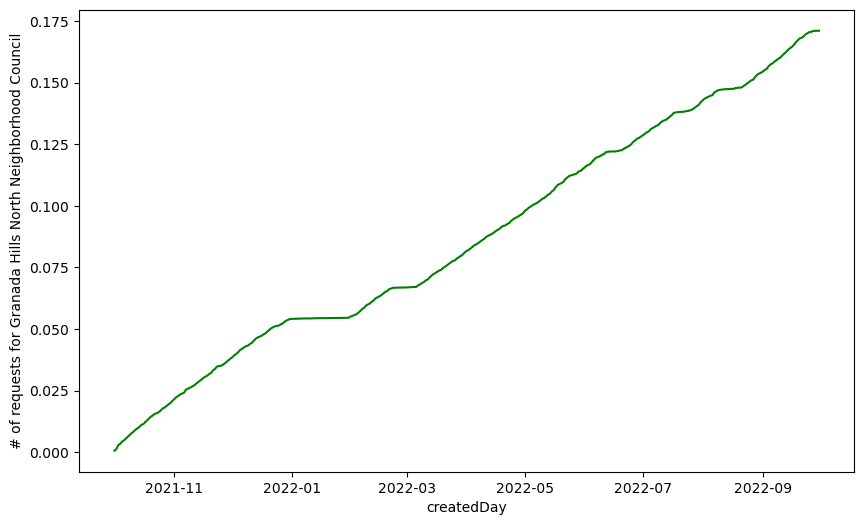

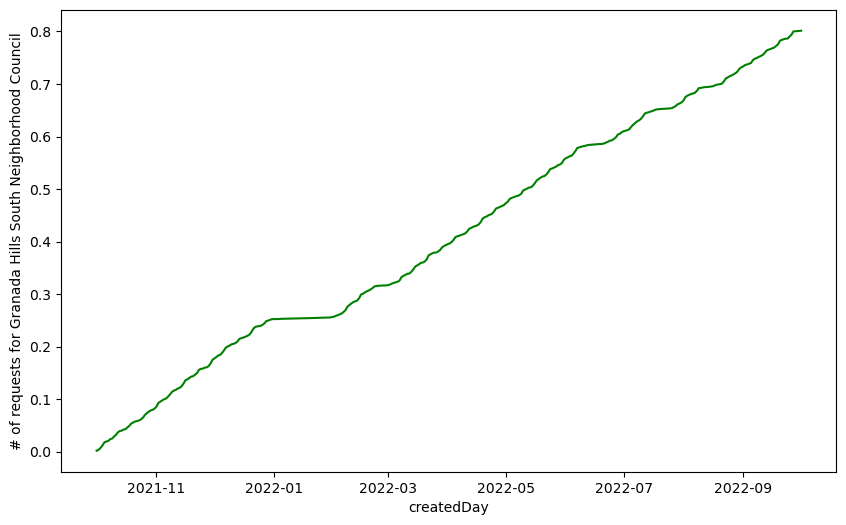

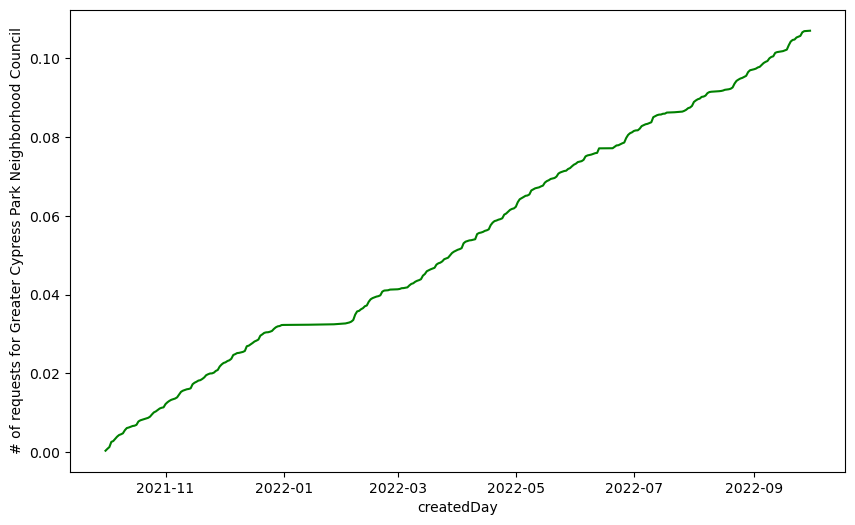

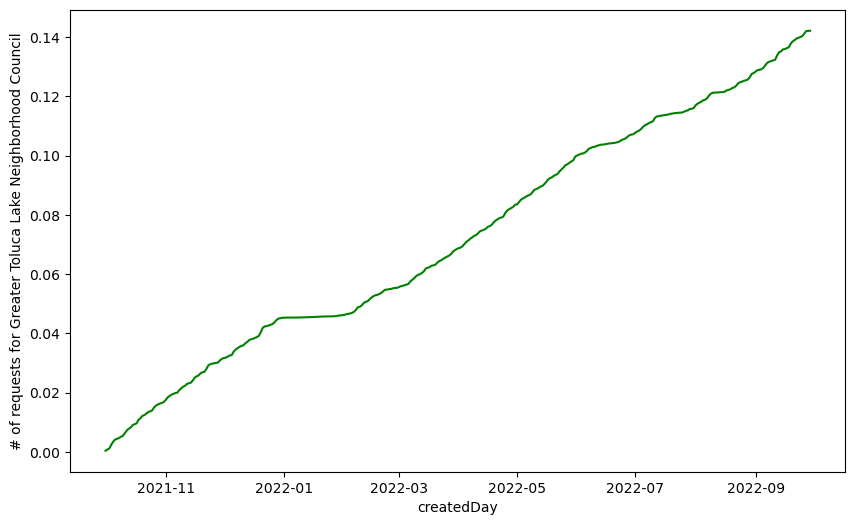

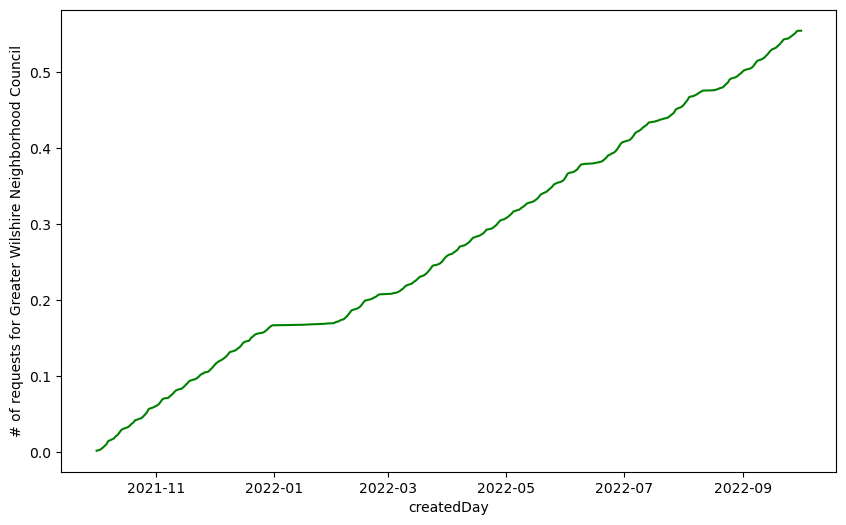

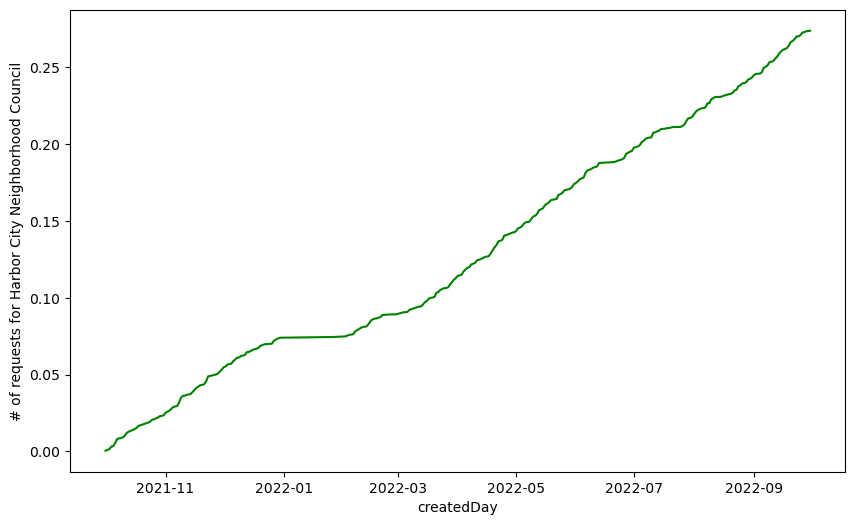

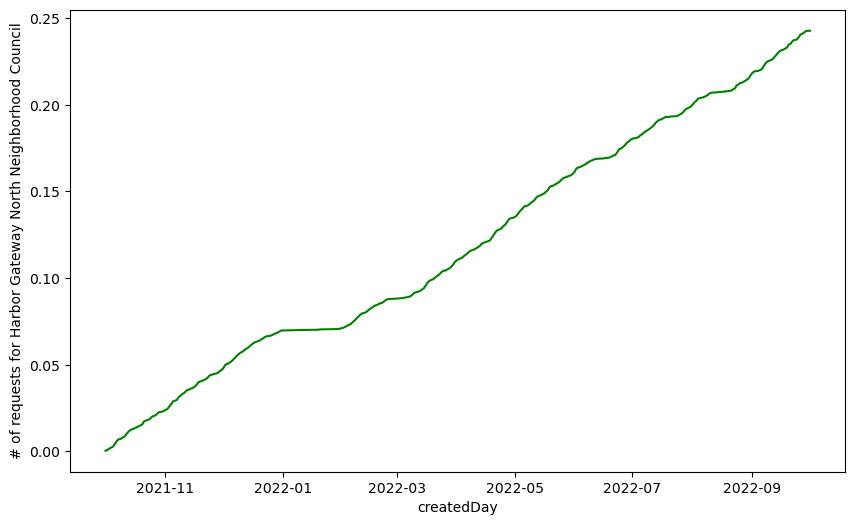

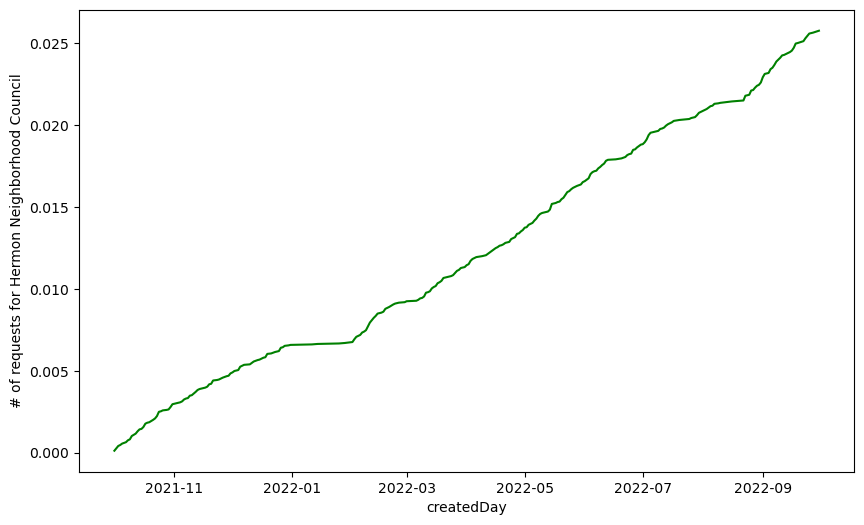

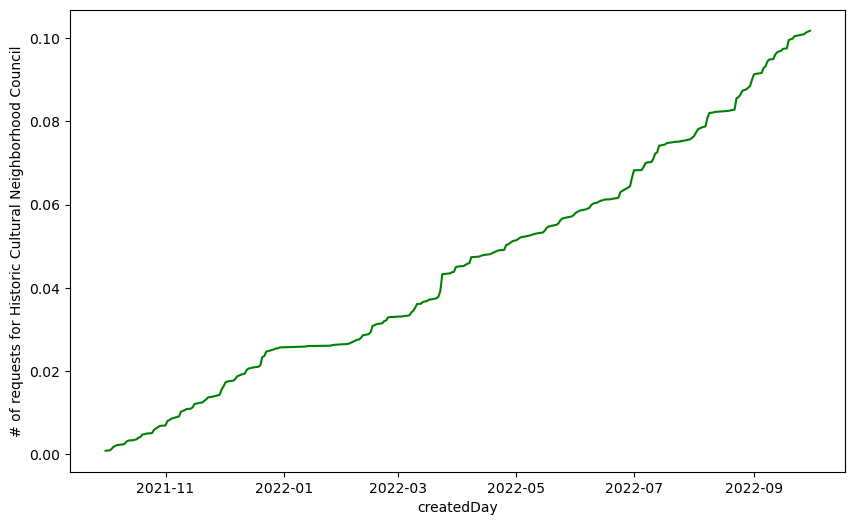

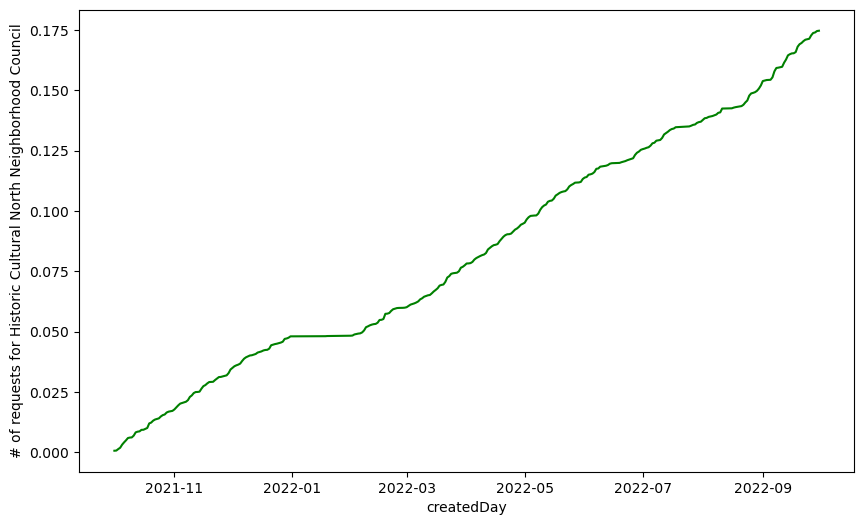

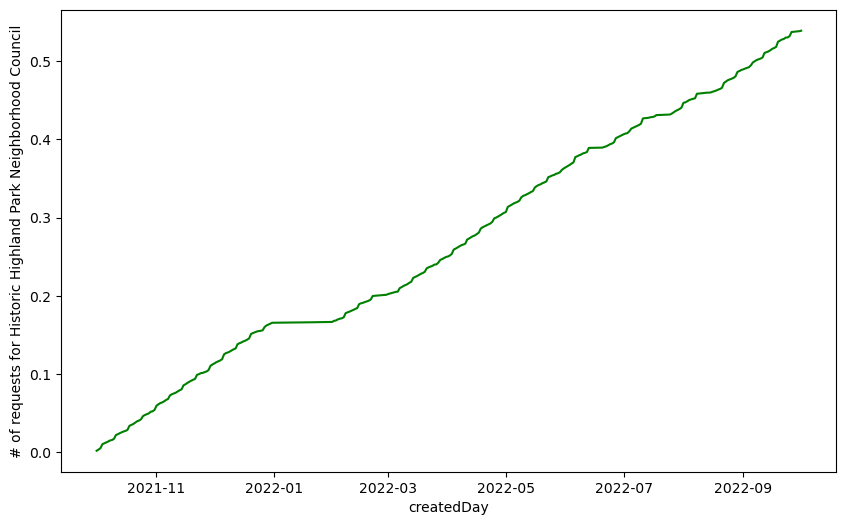

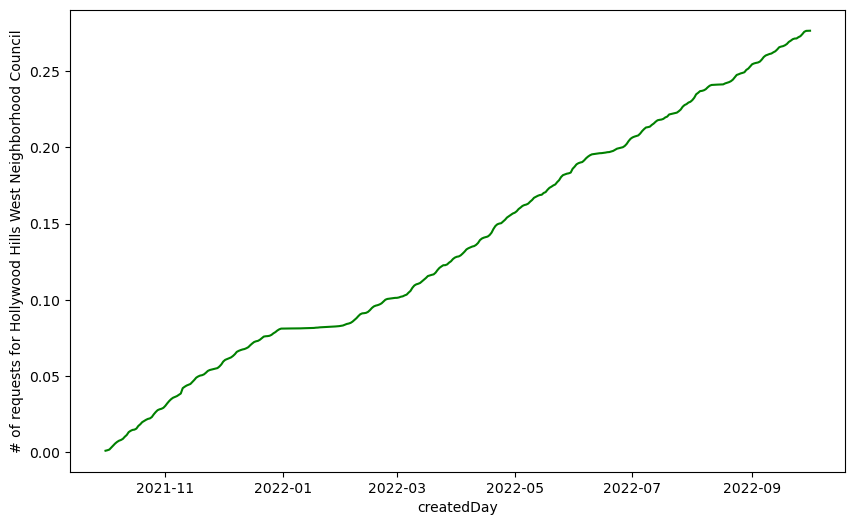

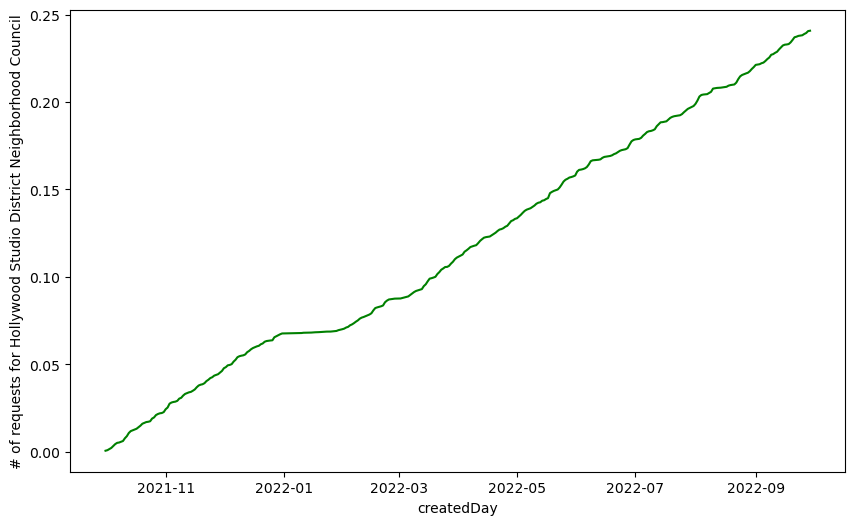

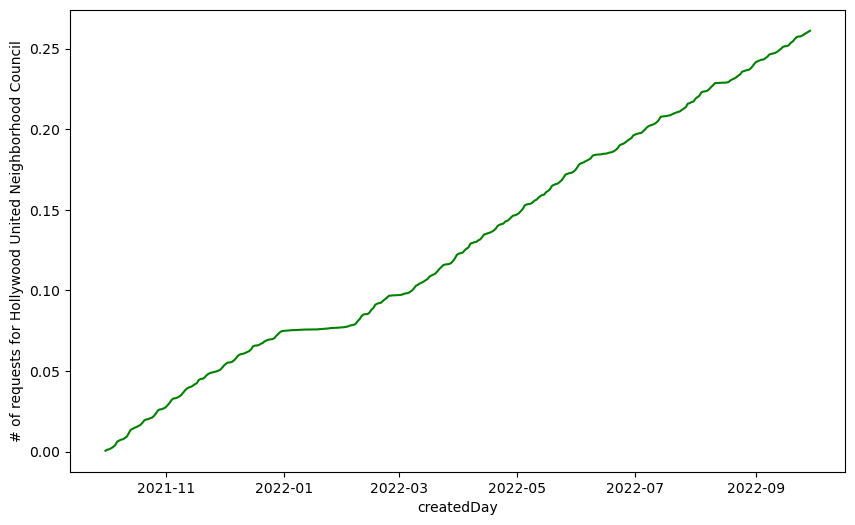

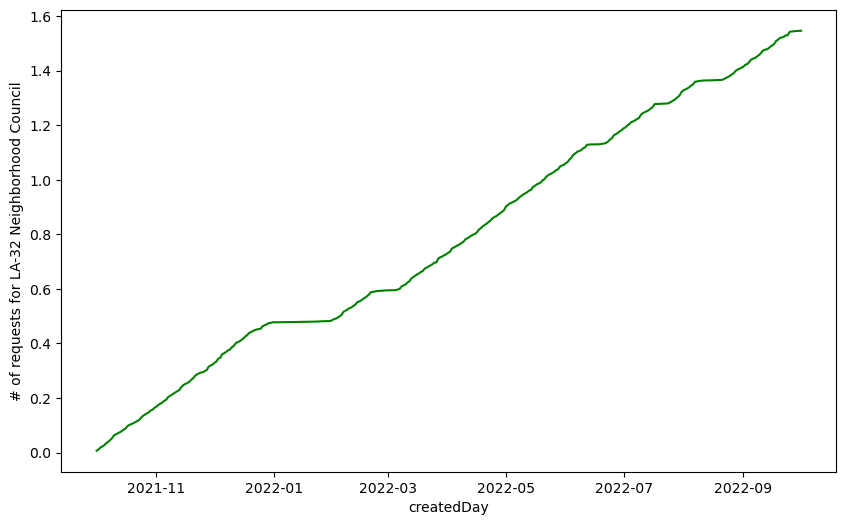

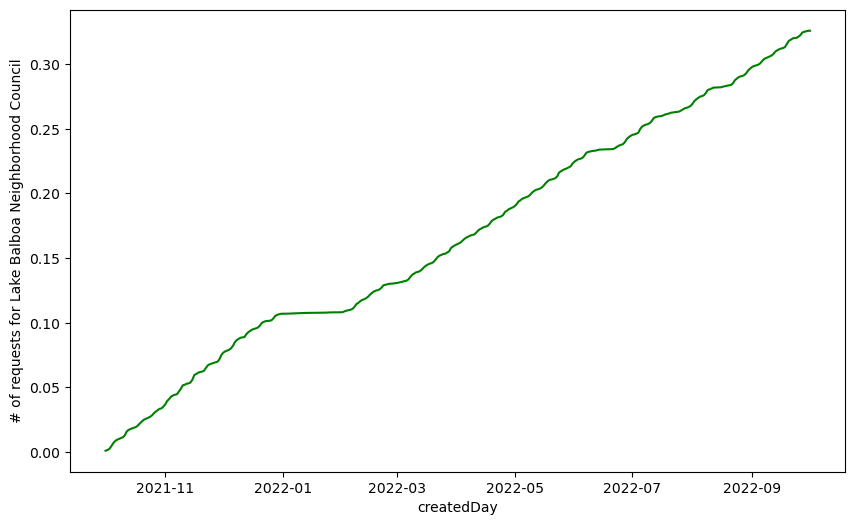

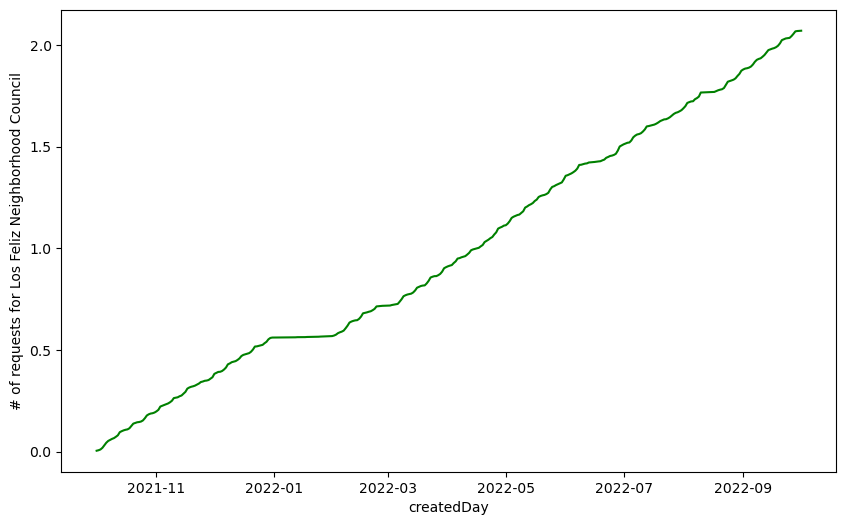

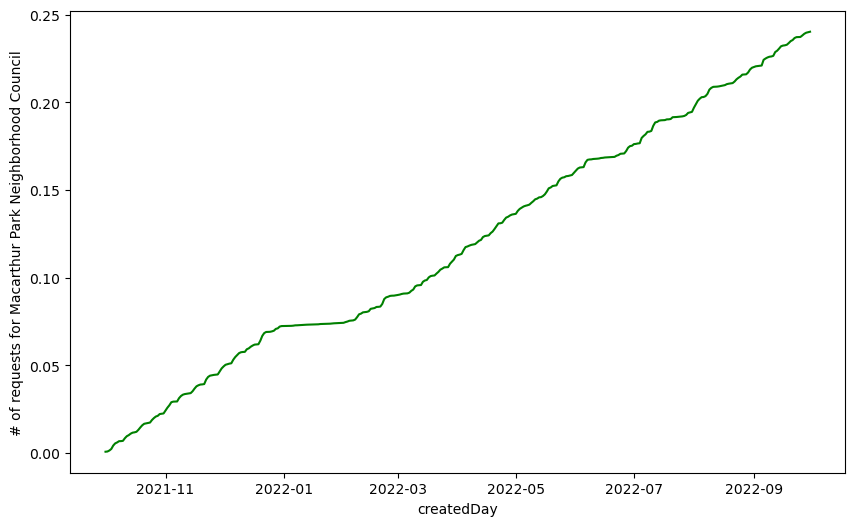

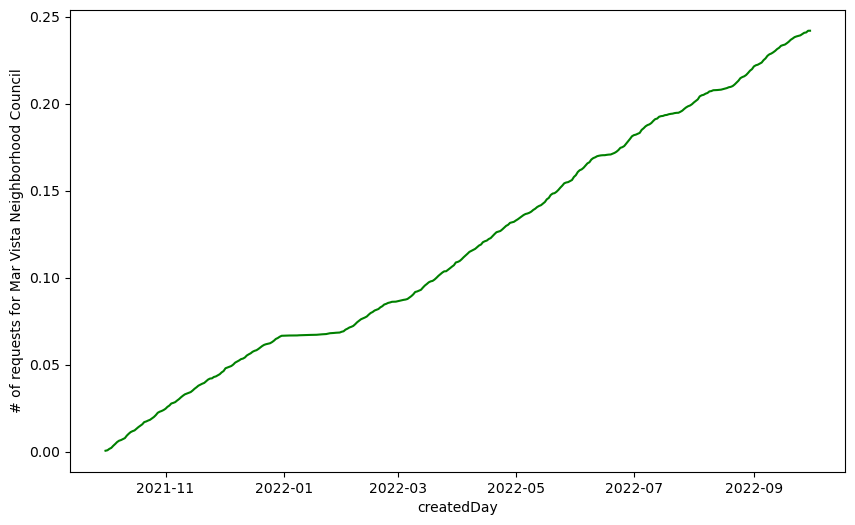

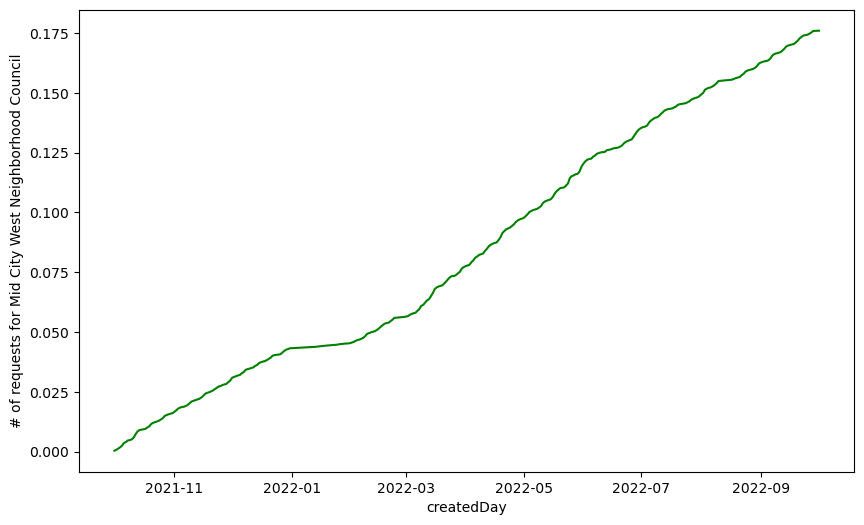

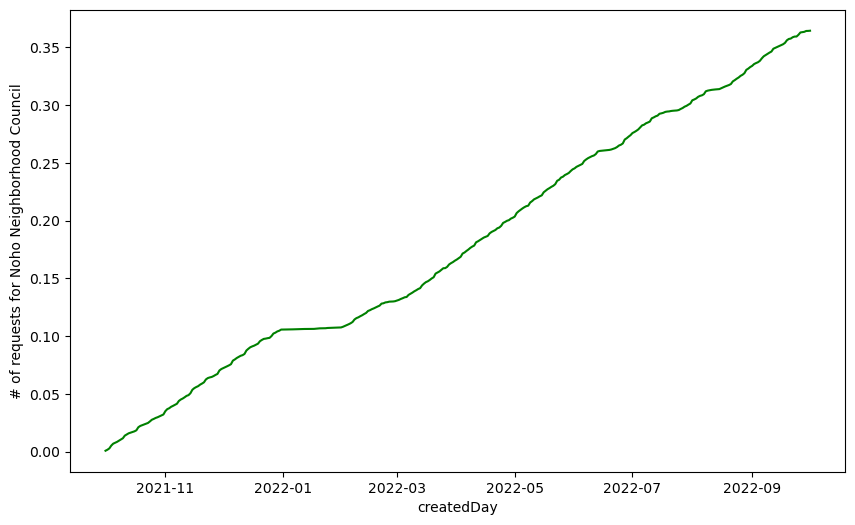

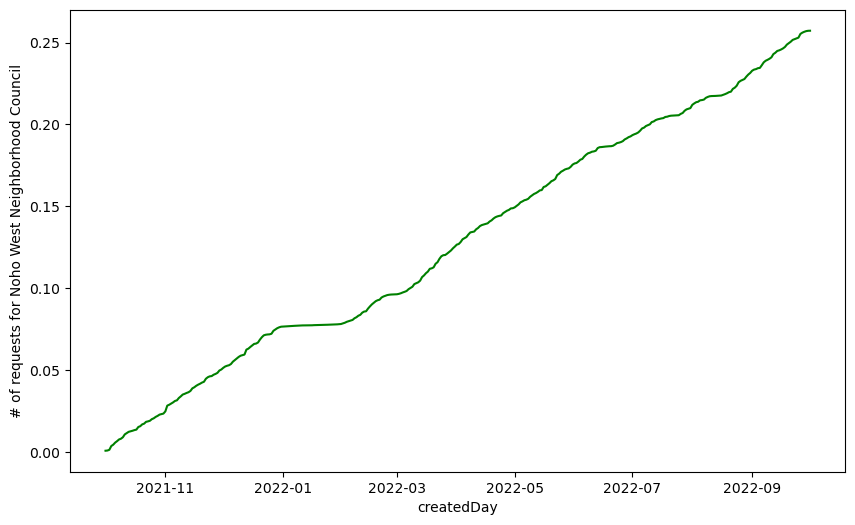

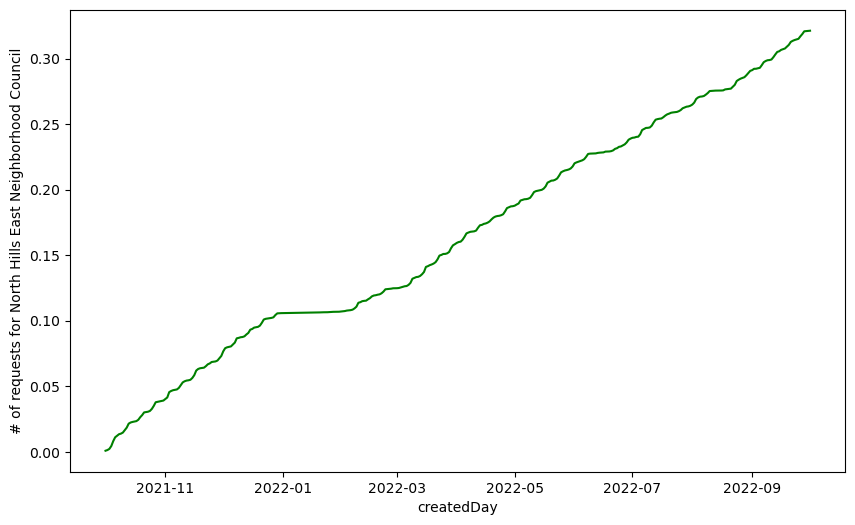

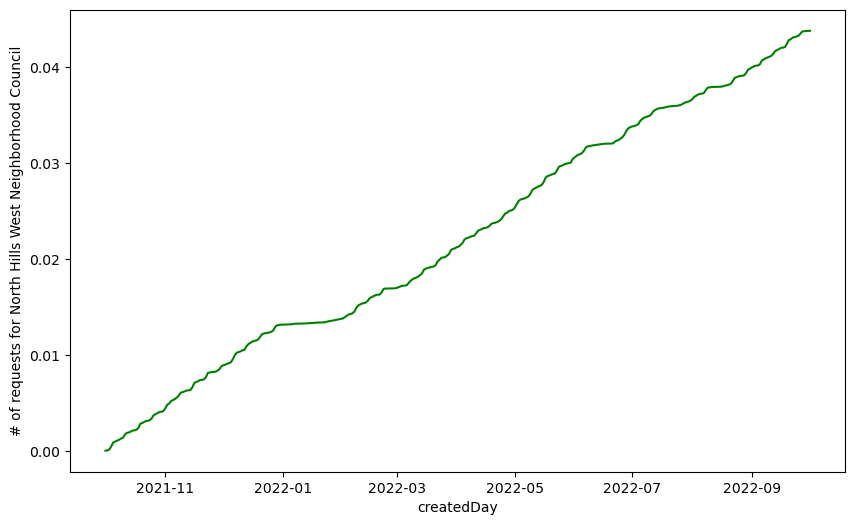

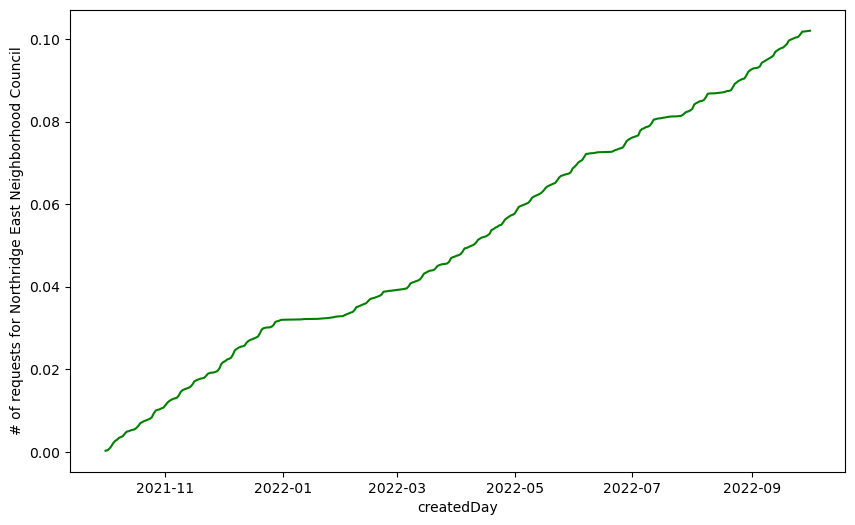

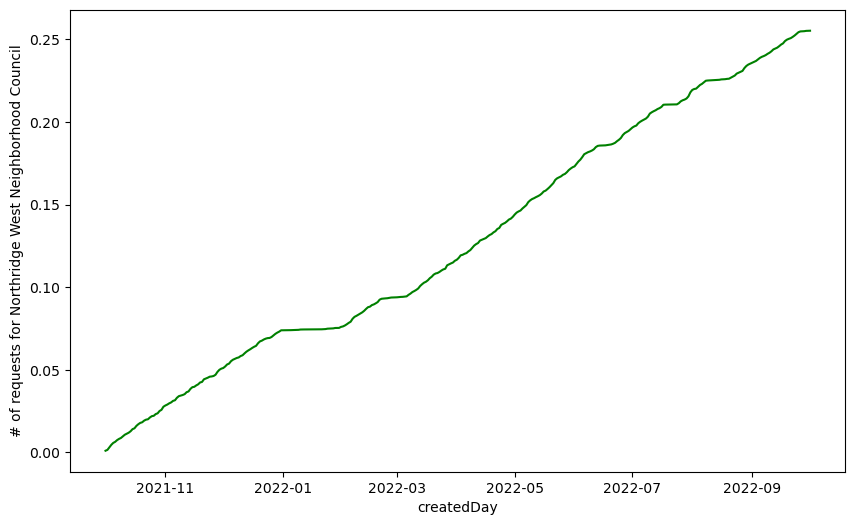

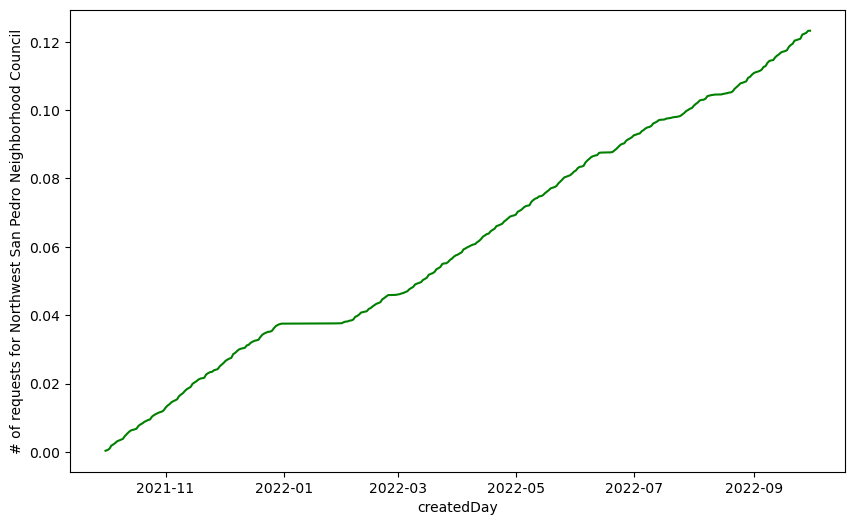

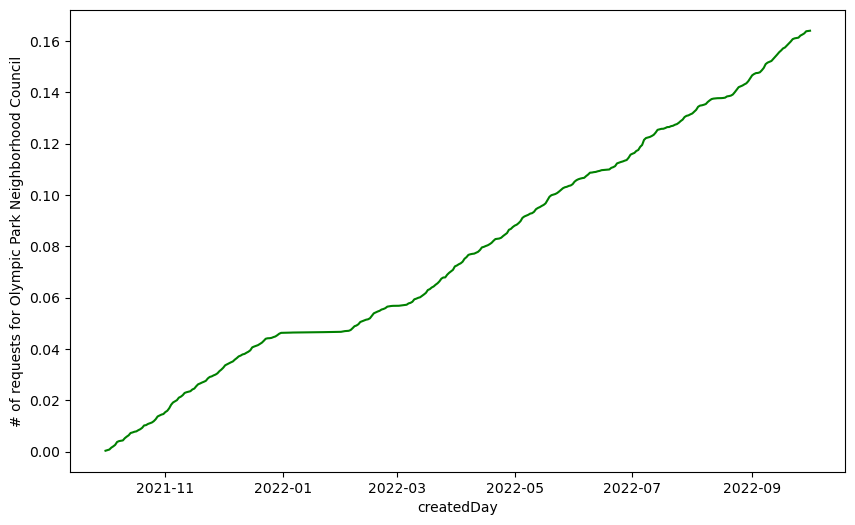

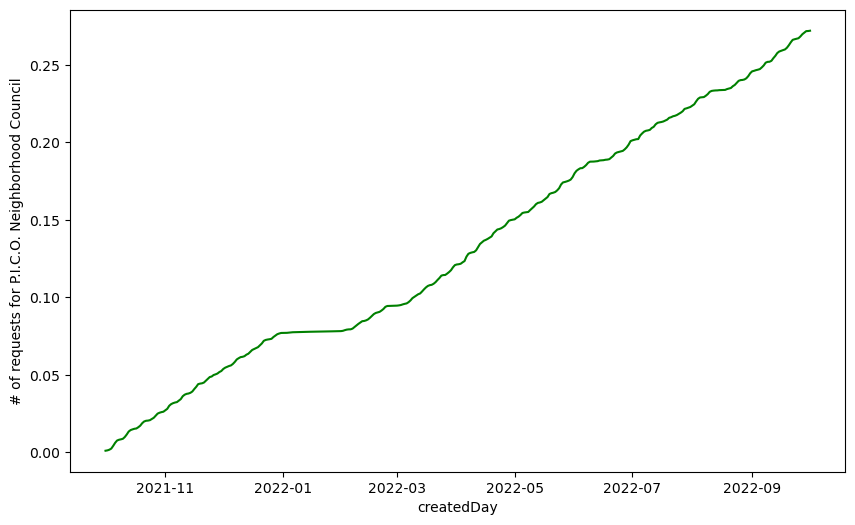

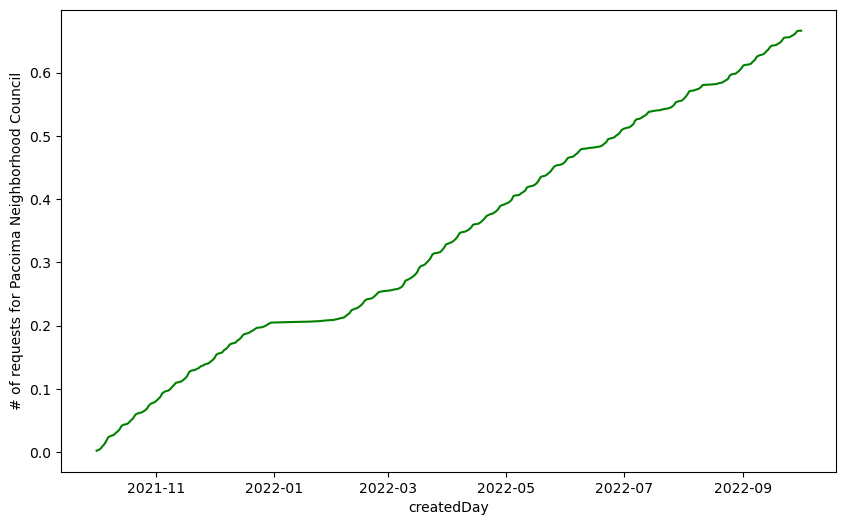

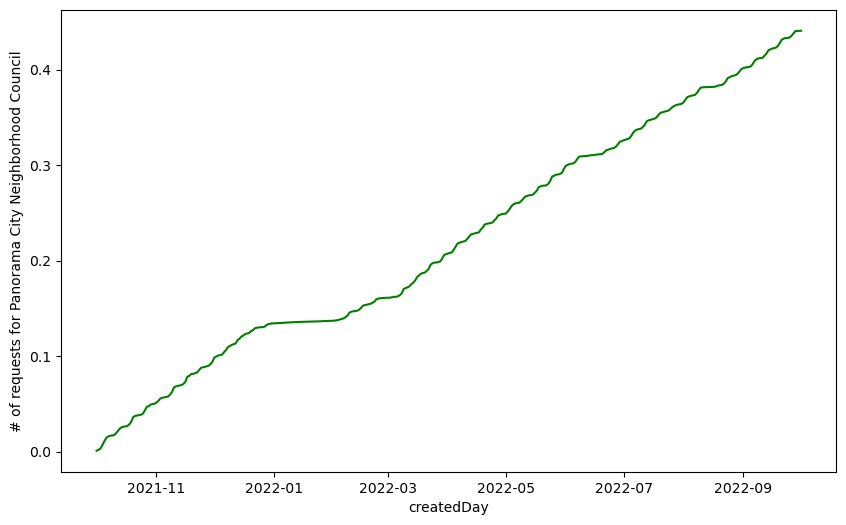

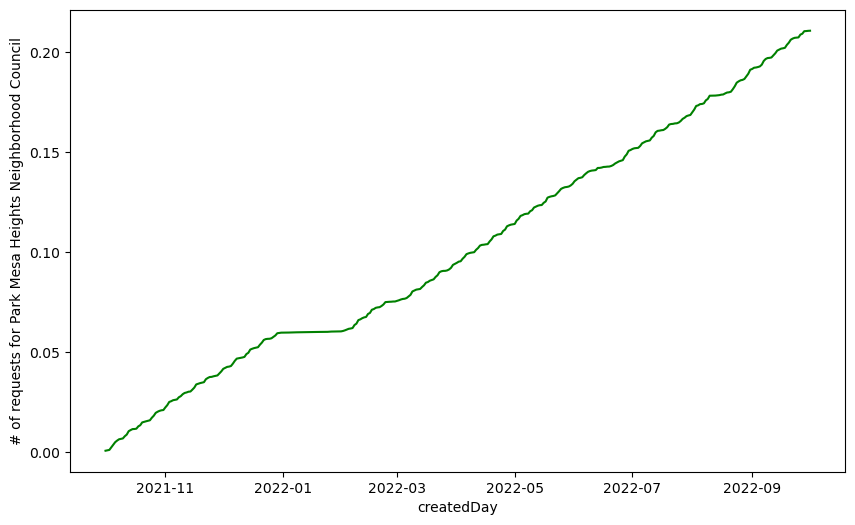

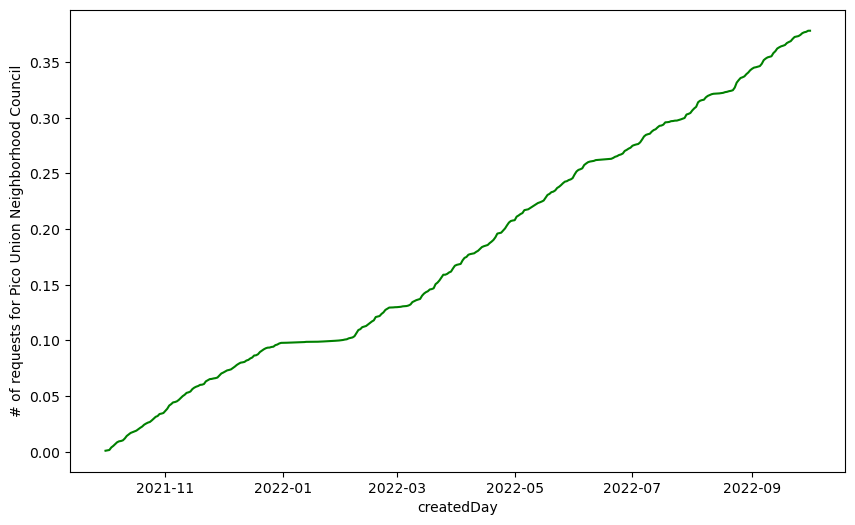

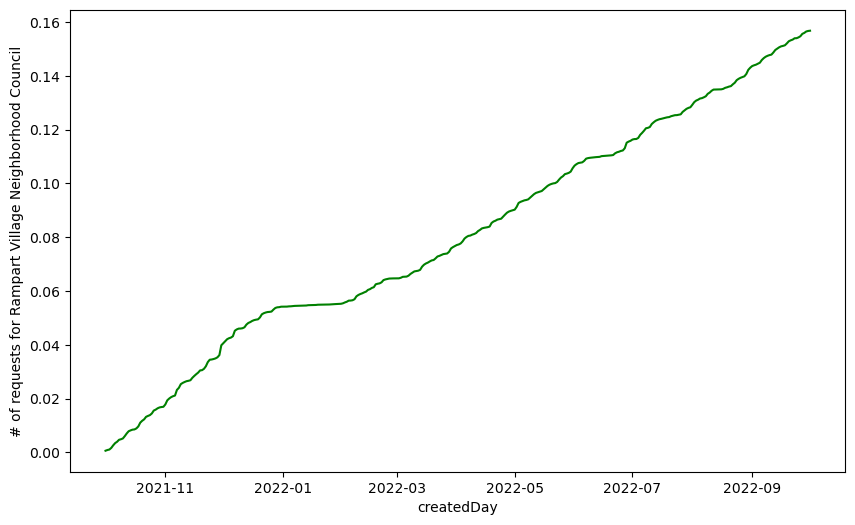

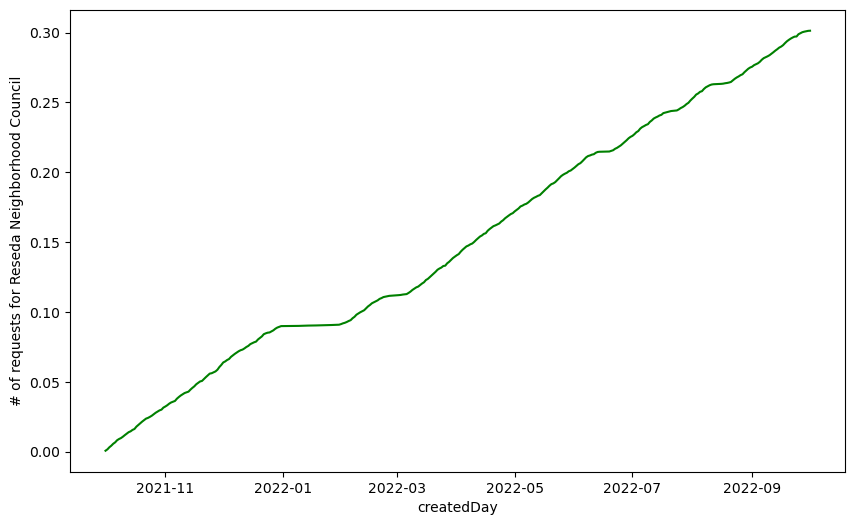

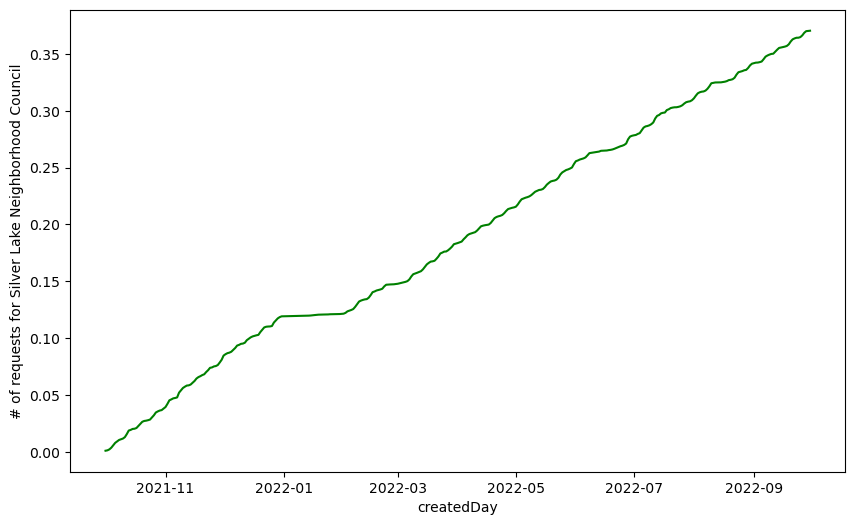

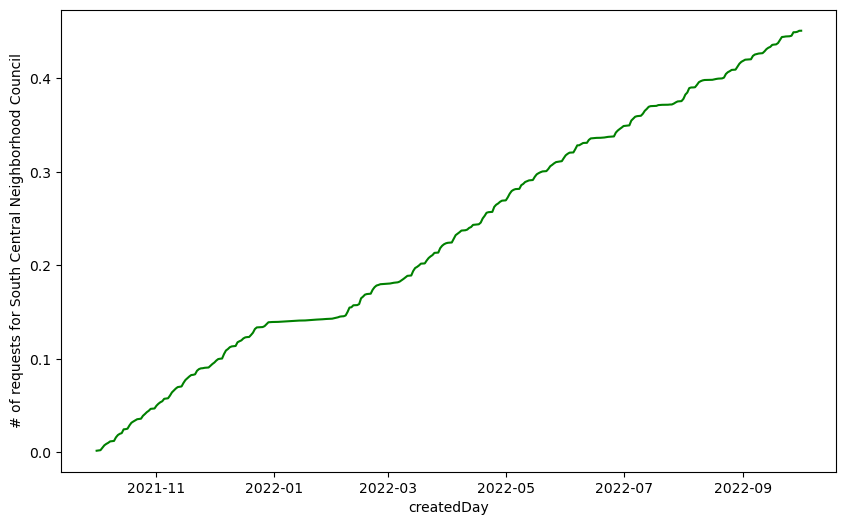

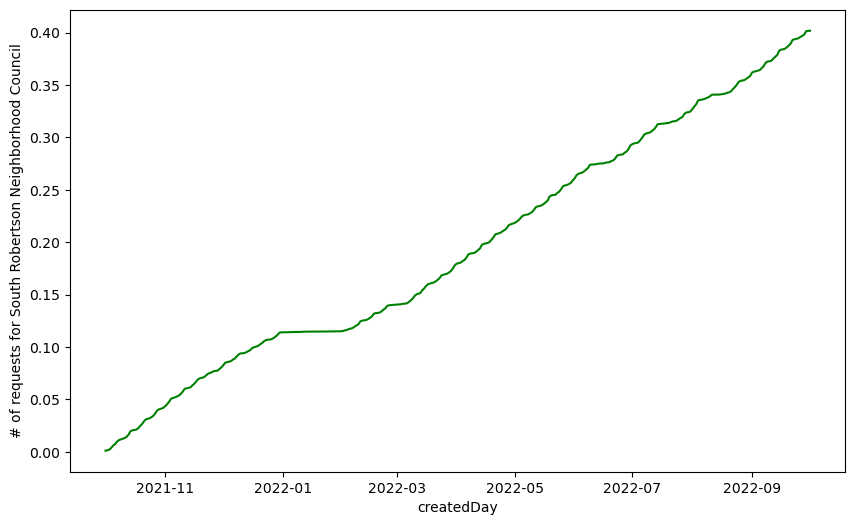

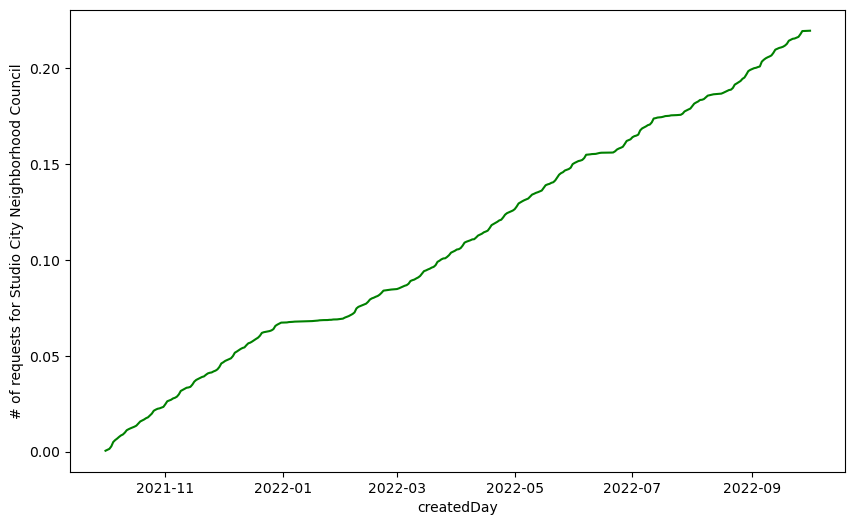

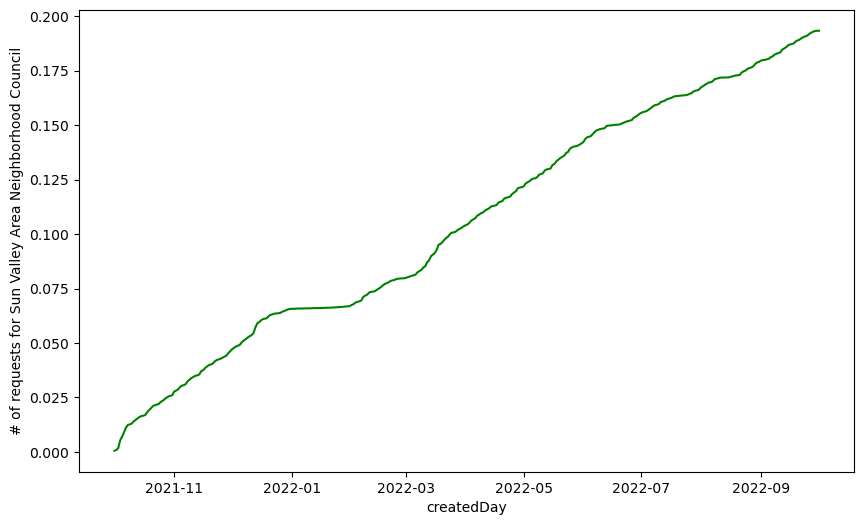

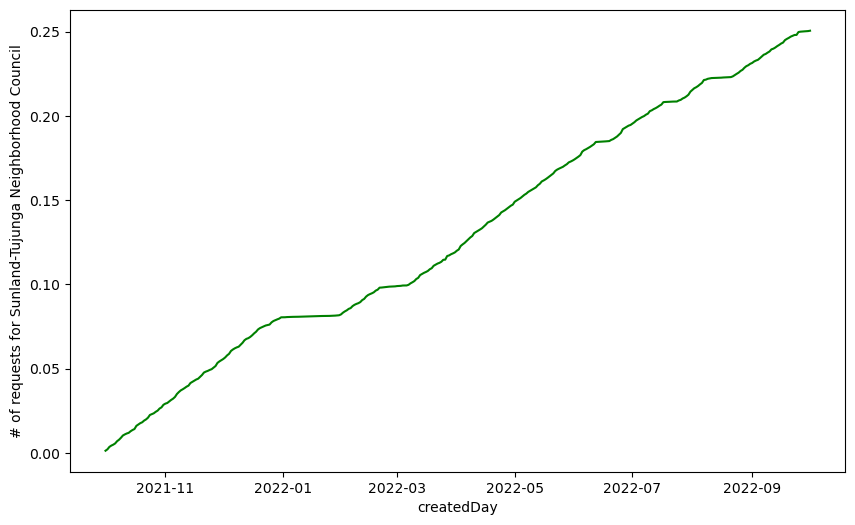

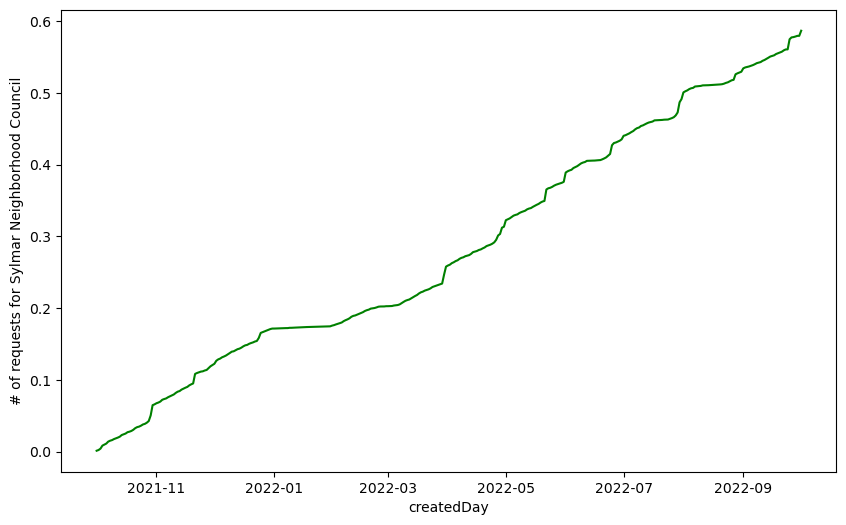

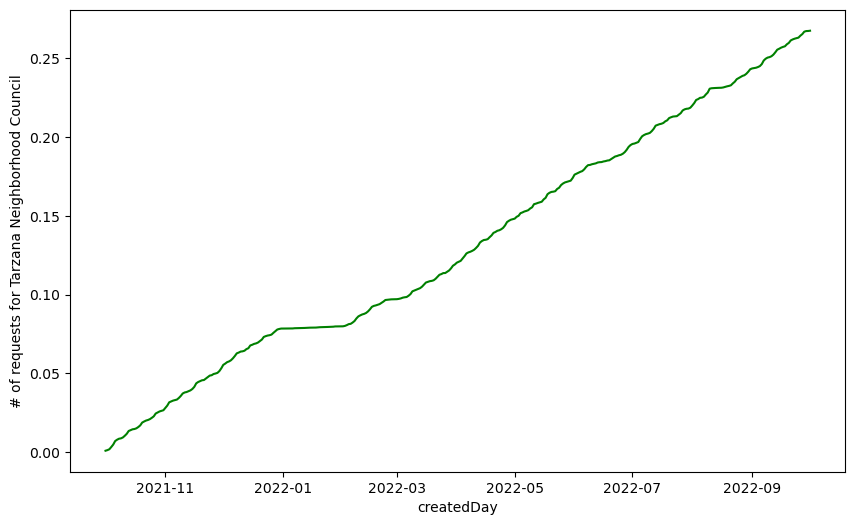

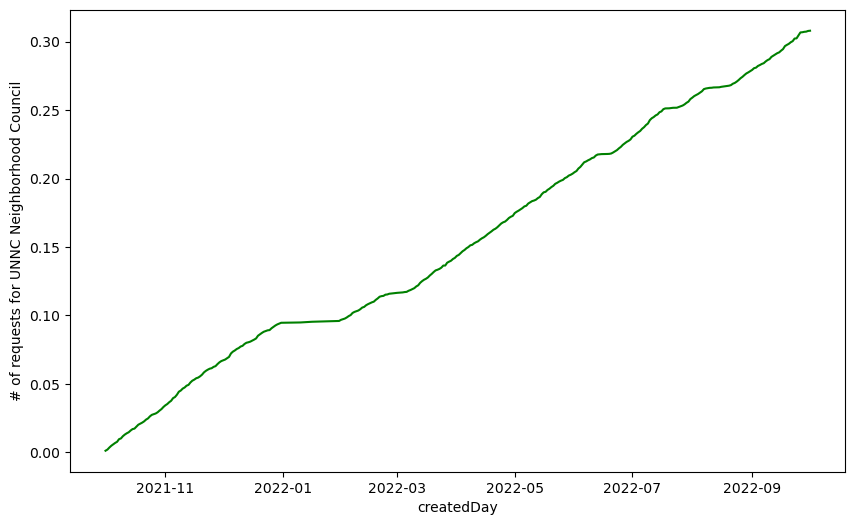

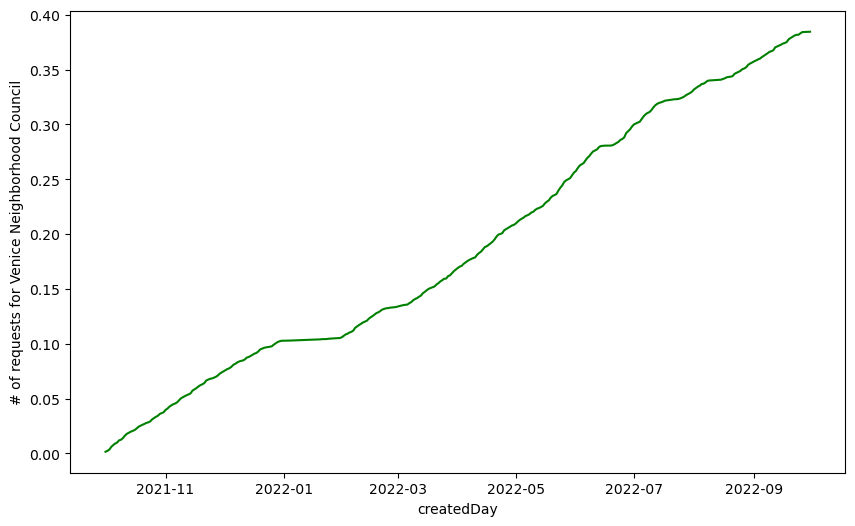

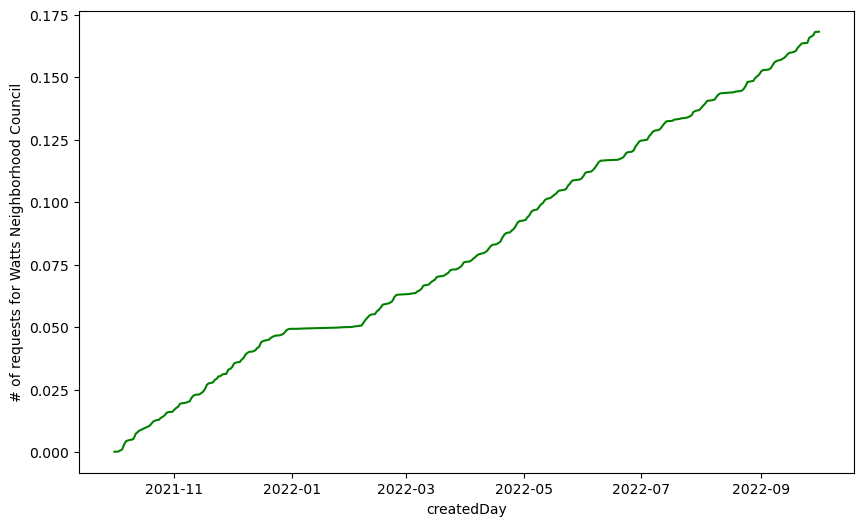

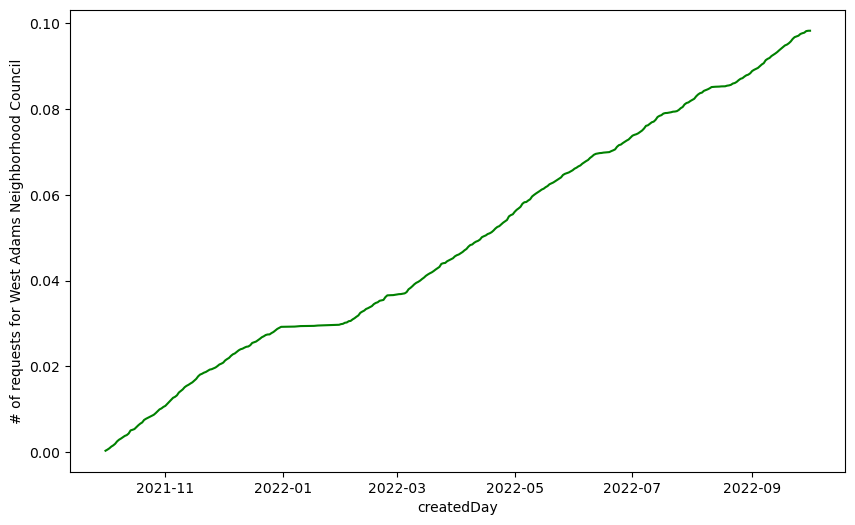

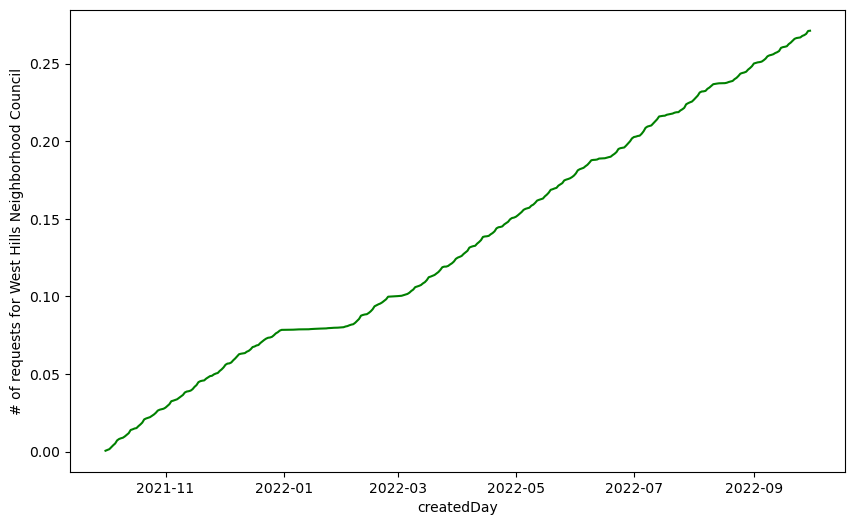

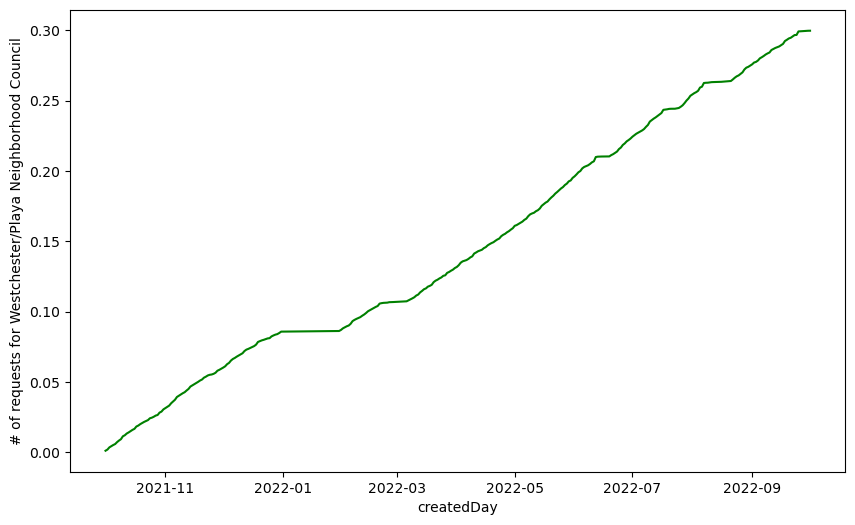

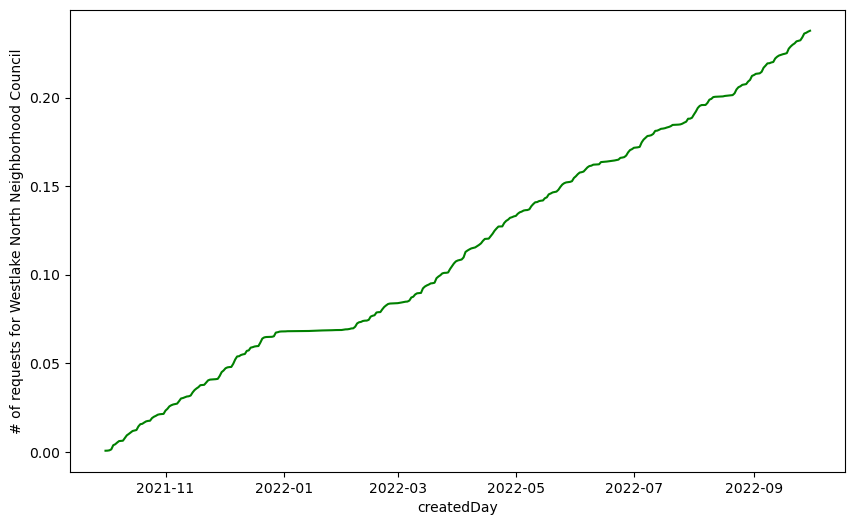

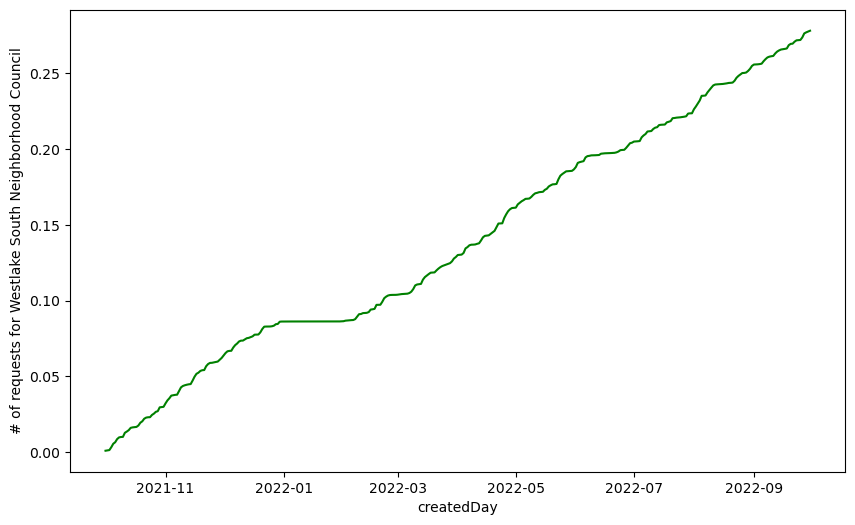

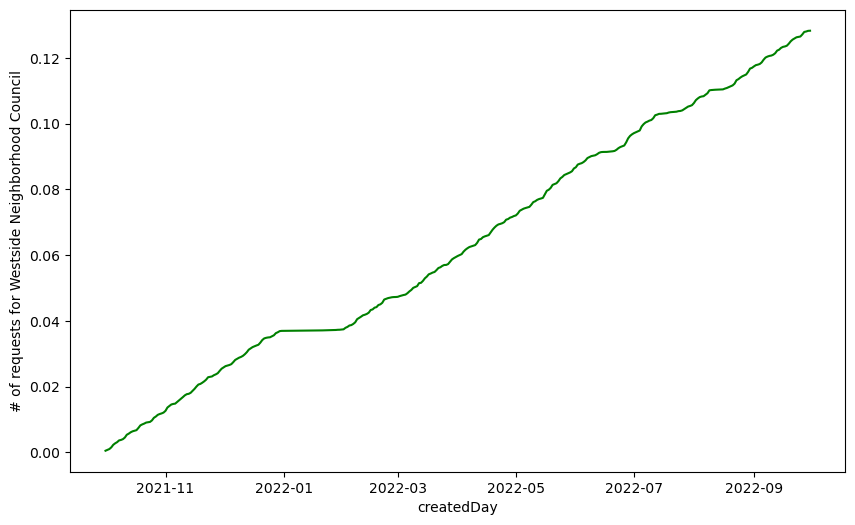

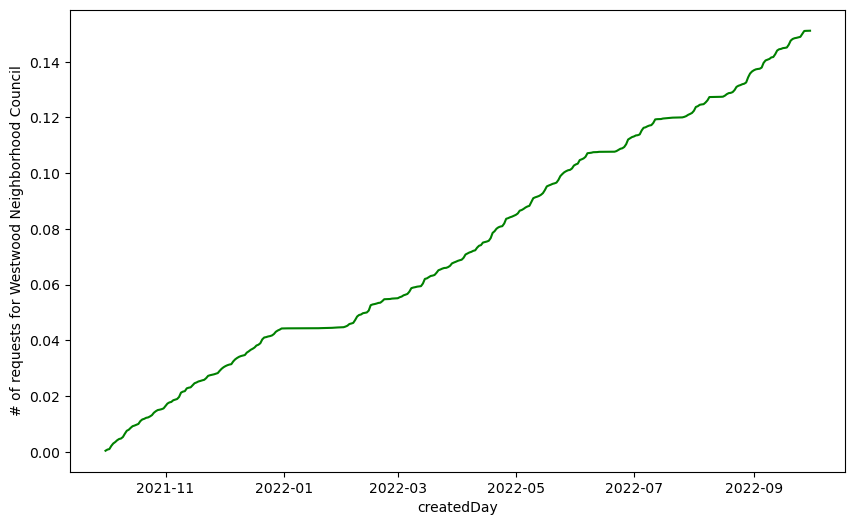

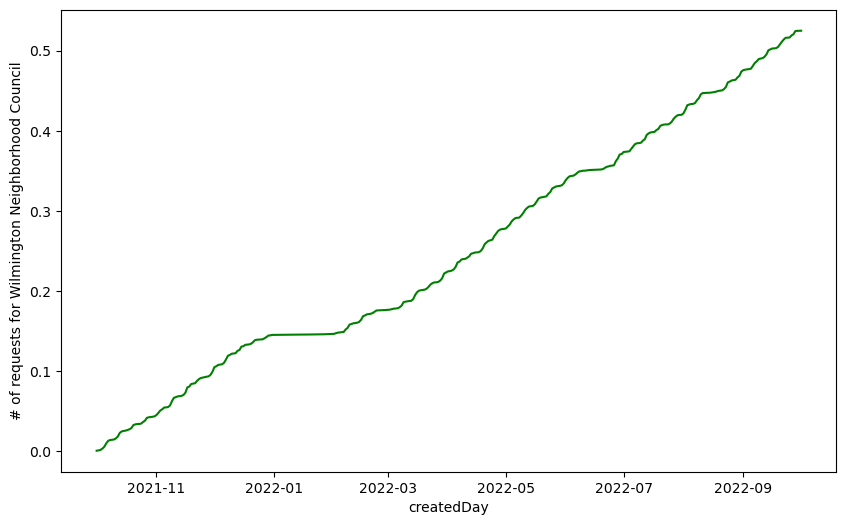

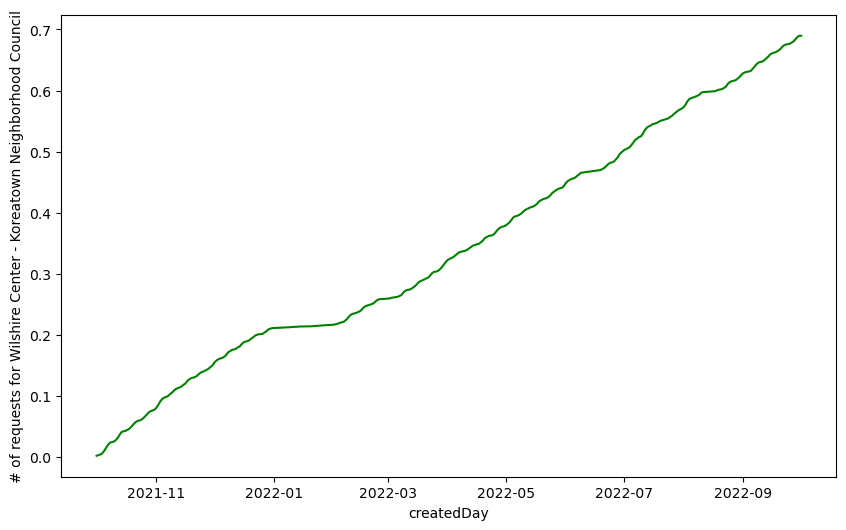

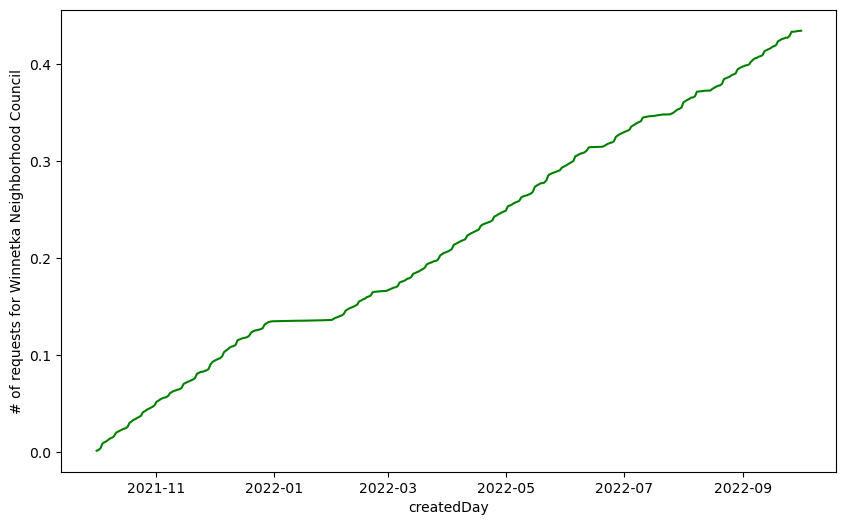

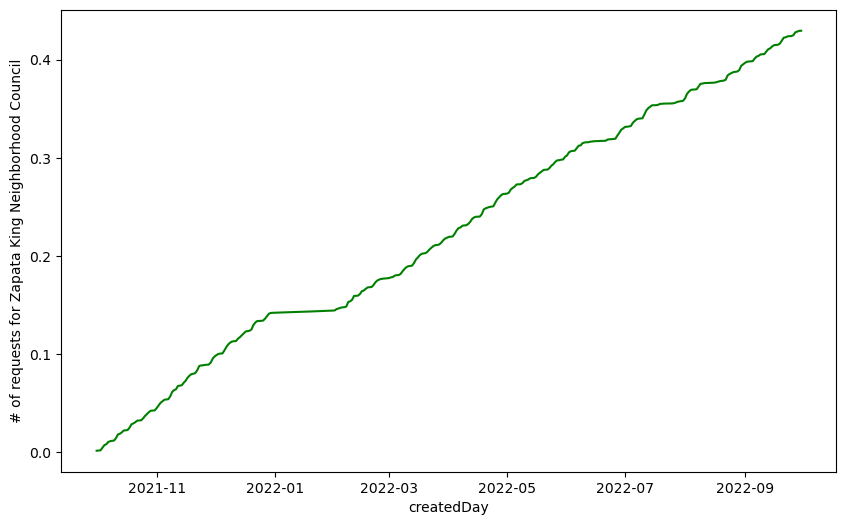

In [48]:
# by NC per capita
for nc in df_nc_ct['councilName'].unique():
    plt.figure(figsize = (10,6))
    ts_plt = df_nc_ct[df_nc_ct['councilName'] == nc]
    ts_plt['per_capita'].plot(color = 'green')
    plt.ylabel(f'# of requests for {nc} Neighborhood Council')
    plt.plot();